# **Statystyczna analiza danych treningowych użytkowników siłowni**

# 1. Charakterystyka danych źródłowych oraz określenie celu analizy.

Niniejszy projekt opiera się na zbiorze danych zawierającym **informacje o użytkownikach siłowni** – ich cechach demograficznych, parametrach fizjologicznych oraz nawykach treningowych. Dane obejmują 973 obserwacje, zawierające m.in. wiek, płeć, wagę, wzrost, poziom doświadczenia, częstotliwość i typ treningów, a także takie wskaźniki wydolności jak tętno, spalone kalorie czy czas trwania sesji, zgodnie z poniższa tabela.

| Nazwa pola                  | Opis                                                                 |
|----------------------------|----------------------------------------------------------------------|
| Wiek                       | Wiek użytkownika siłowni                                             |
| Płeć                       | Płeć użytkownika siłowni (mężczyzna lub kobieta)                     |
| Waga (kg)                  | Waga członka w kilogramach                                           |
| Wzrost (m)                 | Wzrost użytkownika w metrach                                         |
| Max_BPM                    | Maksymalne tętno (uderzenia na minutę) podczas sesji treningowych   |
| Avg_BPM                    | Średnie tętno podczas sesji treningowych                            |
| Resting_BPM                | Tętno w spoczynku przed treningiem                                  |
| Session_Duration (hours)   | Czas trwania każdej sesji treningowej w godzinach                   |
| Calories_Burned            | Całkowita liczba kalorii spalonych podczas każdej sesji             |
| Workout_Type               | Rodzaj wykonanego treningu (np. kardio, siłowy, joga, HIIT)         |
| Fat_Percentage             | Procent tkanki tłuszczowej użytkownika                              |
| Water_Intake (liters)      | Dzienne spożycie wody podczas treningu                              |
| Workout_Frequency (days/week) | Liczba sesji treningowych w tygodniu                           |
| Experience_Level           | Poziom doświadczenia, od początkującego (1) do eksperta (3)         |
| BMI                        | Wskaźnik masy ciała, obliczany na podstawie wzrostu i wagi          |

**Celem analizy** jest **identyfikacja wzorców zachowań i zależności** pomiędzy cechami fizycznymi, demograficznymi oraz parametrami treningowymi użytkowników siłowni. W szczególności analiza ma na celu odpowiedź na następujące pytania:
- Czy bardziej doświadczeni użytkownicy mają niższe tętno spoczynkowe?
- Co najbardziej wpływa na liczbę spalanych kalorii i jaki jest najbardziej efektywny trening? 
- Jakie ćwiczenia częściej wybierają kobiety a jakie mężczyźni?
- Czy dłuższy i częstszy trening wiąze sie z spożyciem większej ilości wody?
- Jakie są typowe profile użytkowników siłowni – i czym się różnią?


# 2. Przegląd danych

## 2.1 Wczystanie oraz zapoznanie się z danymi

In [244]:
# Importowanie bibliotek

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt

In [245]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [246]:
# wczytanie danych
df = pd.read_csv('silownia_new.csv')
df.head()


Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   NaN    Male         88.3        1.71      180      157           60   
1  46.0  Female         74.9        1.53      179      151           66   
2  32.0  Female         68.1        1.66      167      122           54   
3  25.0    Male         53.2        1.70      190      164           56   
4  38.0    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69             1313         Yoga            12.6   
1                      1.30              883          NaN            33.9   
2                      1.11              677       Cardio            33.4   
3                      0.59              532     Strength            28.8   
4                      0.64              556     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0    NaN  
1  32.00  
2    NaN  
3  18.41  
4  14.39

In [247]:
# kształt DataFrame
df.shape

(973, 15)

In [248]:
# typy danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [249]:
# sprawdzanie duplikatów
df.duplicated().any()

np.False_

In [250]:
# sprawdzenie brakujcych wartości w każdej kolumnie
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

Zbiór danych składa się z 973 obserwacji oraz 15 zmiennych, obejmujących zarówno **cechy ilościowe** (float64, int64), jak i **jakościowe** (object). Zmienne kategoryczne to Gender (płeć) oraz Workout_Type (rodzaj treningu), Experience_Level. Większość zmiennych nie zawiera braków, z wyjątkiem Age, Workout_Type, BMI. Pozostałe kolumny są kompletne

## 2.2 Sprawdzenie spójności danych

In [251]:
def check_rules(df):
    rules = {
        # Ogólne reguły
        "Age > 0": df["Age"].fillna(0) > 0,
        "Weight (kg) > 30": df["Weight (kg)"] > 30,
        "Height (m) between 1.3 and 2.3": df["Height (m)"].between(1.3, 2.3),
        "BMI between 10 and 60": df["BMI"].between(10, 60),
        "Calories_Burned > 0": df["Calories_Burned"] > 0,
        "Calories_Burned < 2000": df["Calories_Burned"] < 2000,
        "Workout_Frequency <= 7": df["Workout_Frequency (days/week)"] <= 7,
        "Water_Intake < 10L": df["Water_Intake (liters)"] < 10,
        "Experience_Level in [1, 2, 3]": df["Experience_Level"].isin([1, 2, 3]),
        "Workout_Type is not null": df["Workout_Type"].notna(),
        "Session_Duration between 0.2 and 5h": df["Session_Duration (hours)"].between(0.2, 5),

        # Reguły dot. tętna
        "Resting_BPM between 30 and 100": df["Resting_BPM"].between(30, 100),
        "Avg_BPM > Resting_BPM": df["Avg_BPM"] >= df["Resting_BPM"],
        "Max_BPM >= Avg_BPM": df["Max_BPM"] >= df["Avg_BPM"],
        "Max_BPM <= 220": df["Max_BPM"] <= 220,

        # Reguła BMI zgodności ze wzorem (z tolerancją ±0.2)
        "BMI == Weight / Height^2 (~0.2 margin)": (
            abs(df["BMI"] - (df["Weight (kg)"] / (df["Height (m)"] ** 2))) < 0.2
        ),

        # Reguły zależne od płci
        "Fat_Percentage (Male: 5–40)": df.loc[df["Gender"] == "Male", "Fat_Percentage"].between(5, 40).reindex(df.index, fill_value=True),
        "Fat_Percentage (Female: 10–50)": df.loc[df["Gender"] == "Female", "Fat_Percentage"].between(10, 50).reindex(df.index, fill_value=True),
    }
    return rules

rules = check_rules(df)

for rule, result in rules.items():
    status = " OK" if result.all() else f" {(~result).sum()} błędnych"
    print(f"{rule}: {status}")

Age > 0:  100 błędnych
Weight (kg) > 30:  OK
Height (m) between 1.3 and 2.3:  OK
BMI between 10 and 60:  150 błędnych
Calories_Burned > 0:  OK
Calories_Burned < 2000:  OK
Workout_Frequency <= 7:  OK
Water_Intake < 10L:  OK
Experience_Level in [1, 2, 3]:  OK
Workout_Type is not null:  150 błędnych
Session_Duration between 0.2 and 5h:  OK
Resting_BPM between 30 and 100:  OK
Avg_BPM > Resting_BPM:  OK
Max_BPM >= Avg_BPM:  23 błędnych
Max_BPM <= 220:  OK
BMI == Weight / Height^2 (~0.2 margin):  150 błędnych
Fat_Percentage (Male: 5–40):  OK
Fat_Percentage (Female: 10–50):  OK


In [252]:
# Sprawdzamy naruszenia reguł
violations = {rule: ~result for rule, result in rules.items()}

# Podsumowujemy je
summary = {rule: violation.sum() for rule, violation in violations.items()}

# Wydruk
print("\nSummary of Violations:")
for rule, count in summary.items():
    print(f"{rule}: {count} violations")


Summary of Violations:
Age > 0: 100 violations
Weight (kg) > 30: 0 violations
Height (m) between 1.3 and 2.3: 0 violations
BMI between 10 and 60: 150 violations
Calories_Burned > 0: 0 violations
Calories_Burned < 2000: 0 violations
Workout_Frequency <= 7: 0 violations
Water_Intake < 10L: 0 violations
Experience_Level in [1, 2, 3]: 0 violations
Workout_Type is not null: 150 violations
Session_Duration between 0.2 and 5h: 0 violations
Resting_BPM between 30 and 100: 0 violations
Avg_BPM > Resting_BPM: 0 violations
Max_BPM >= Avg_BPM: 23 violations
Max_BPM <= 220: 0 violations
BMI == Weight / Height^2 (~0.2 margin): 150 violations
Fat_Percentage (Male: 5–40): 0 violations
Fat_Percentage (Female: 10–50): 0 violations


Podsumowanie błędów w danych

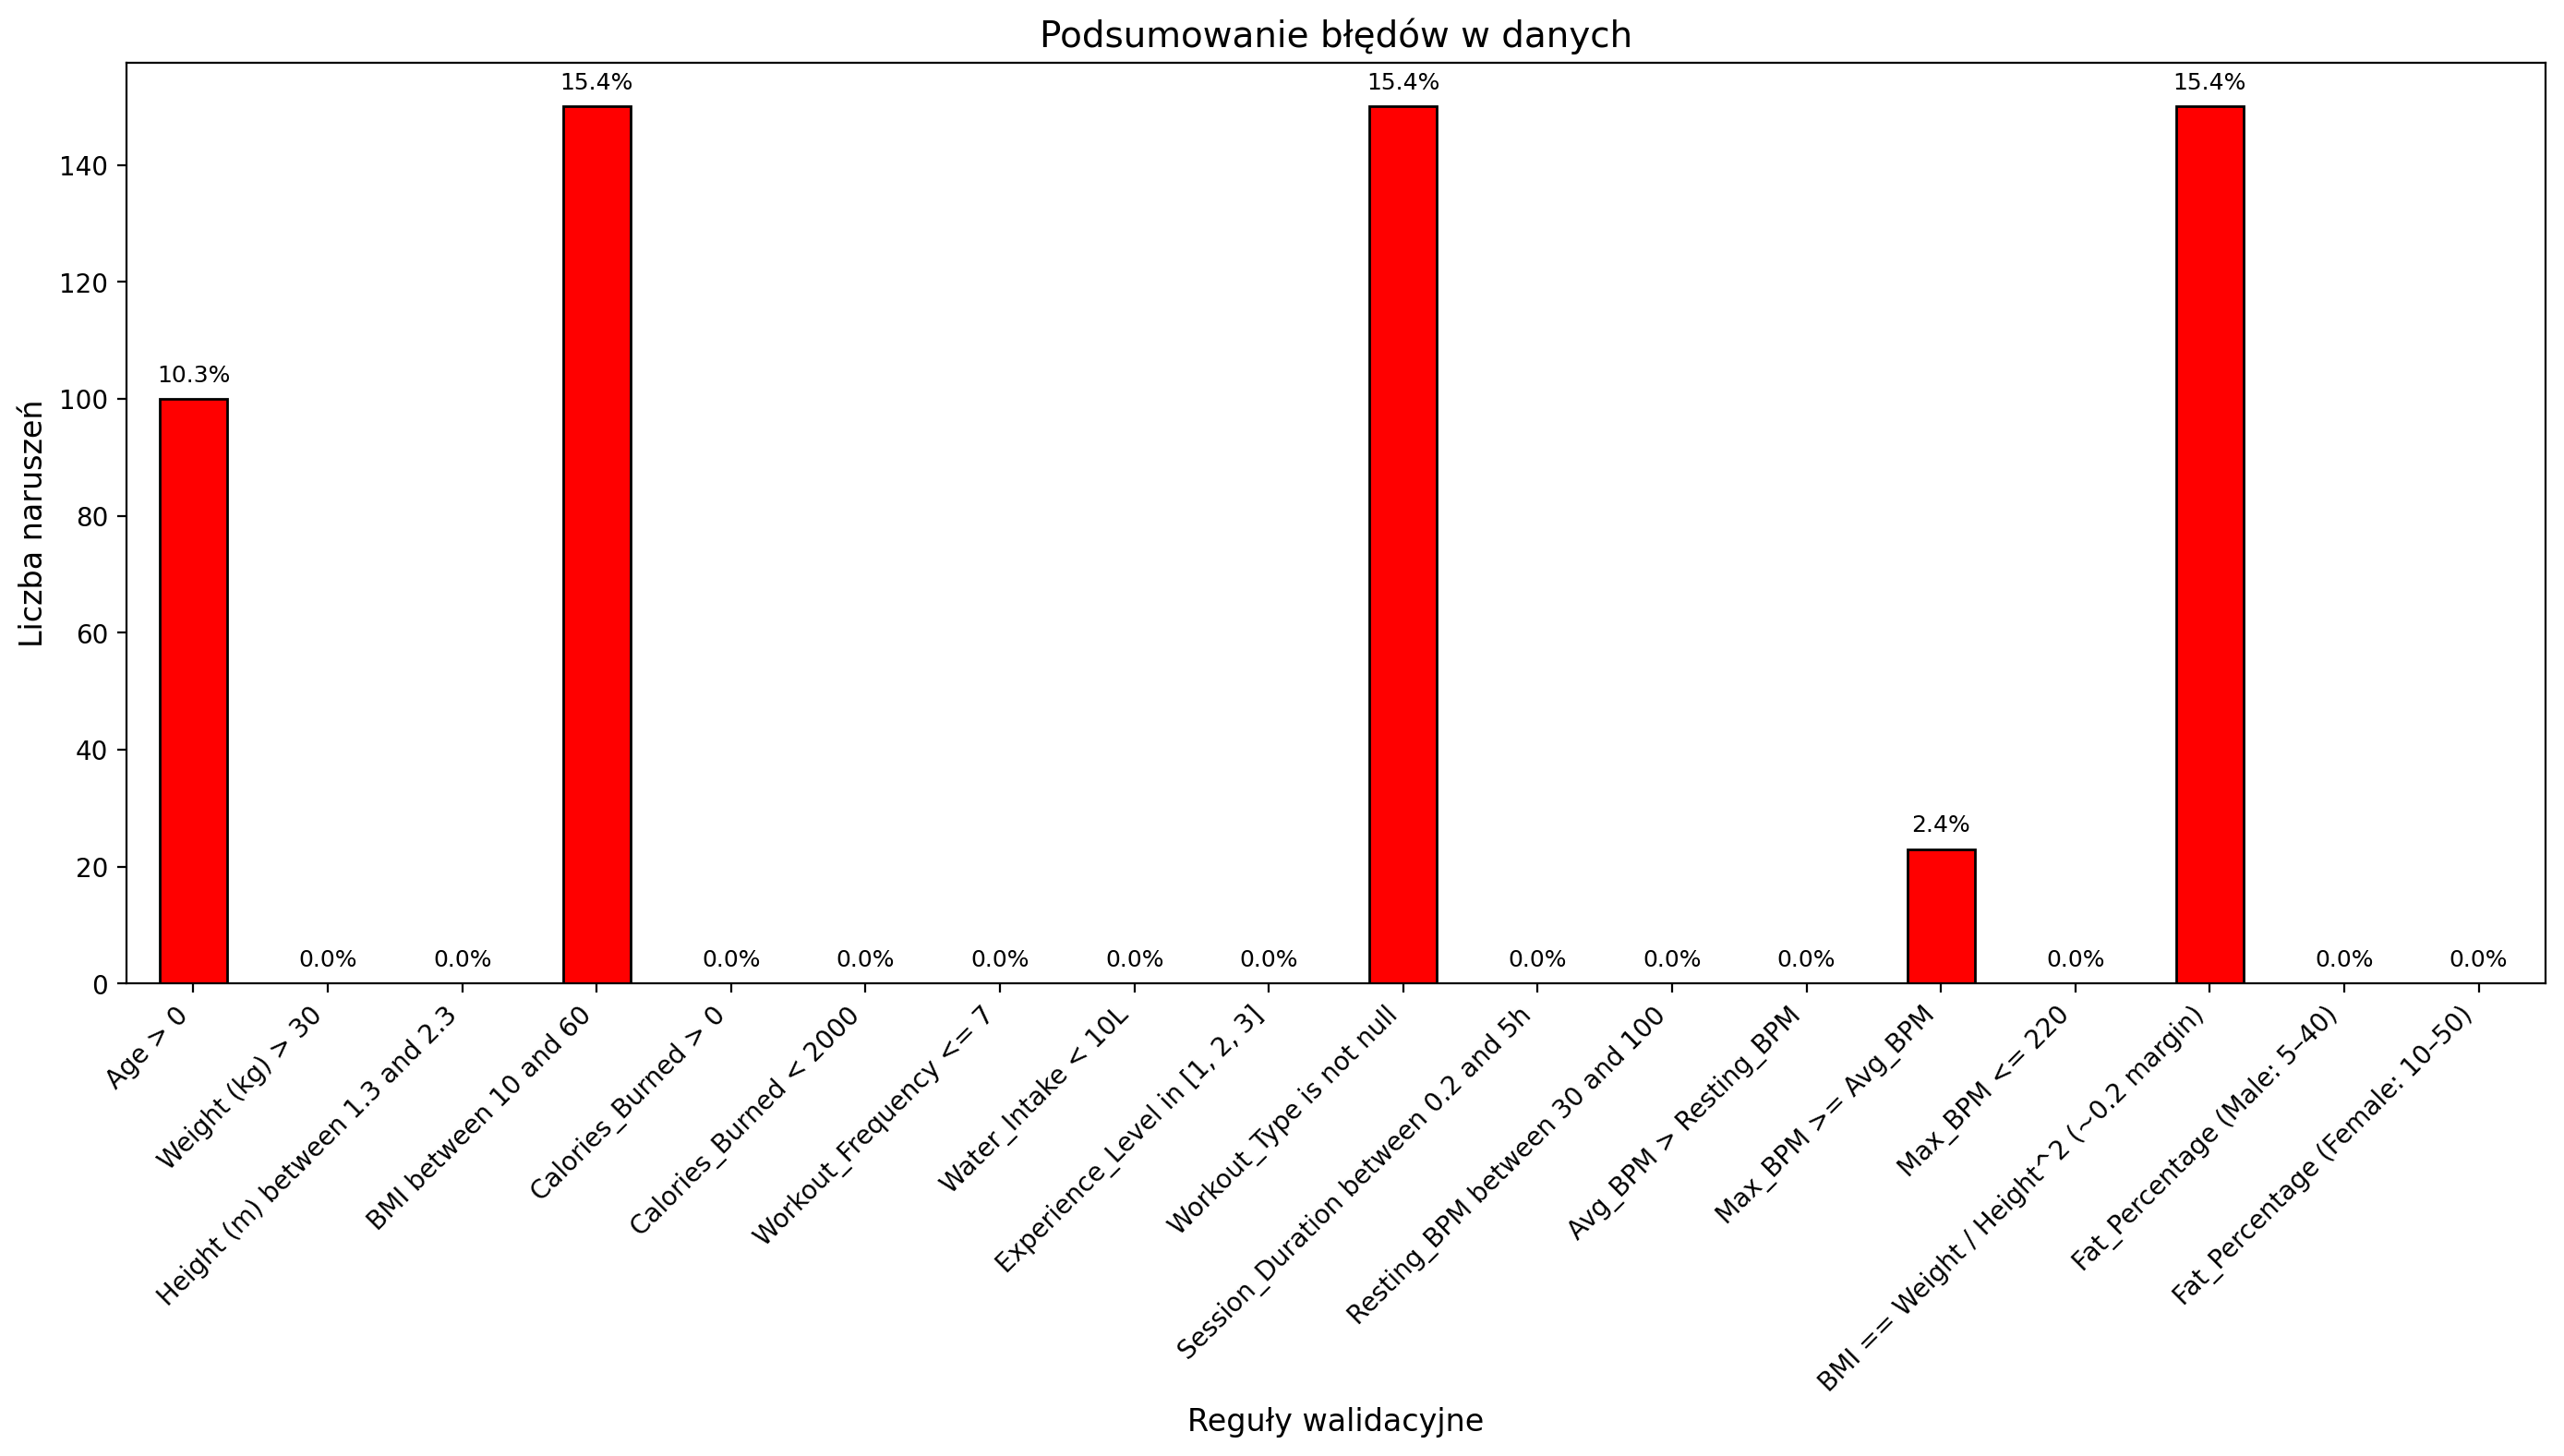

In [253]:
# import matplotlib.pyplot as plt
# import pandas as pd

# Identyfikujemy naruszenia (gdzie reguła == False)
violations = {rule: ~result for rule, result in rules.items()}

# Podsumowanie liczby naruszeń dla każdej reguły
summary = {rule: violation.sum() for rule, violation in violations.items()}

# Tworzenie wykresu
violation_counts = pd.Series(summary)

ax = violation_counts.plot(kind='bar', figsize=(14, 8), color='red', edgecolor='black')
plt.title('' \
'Podsumowanie błędów w danych', fontsize=14)
plt.xlabel('Reguły walidacyjne', fontsize=12)
plt.ylabel('Liczba naruszeń', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Dodanie etykiet procentowych nad słupkami
total_rows = len(df)
for p in ax.patches:
    count = p.get_height()
    percent = (count / total_rows) * 100
    ax.annotate(f'{percent:.1f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## 2.3 Diagnostyka danych

**Max_BPM < Avg_BPM - usuwanie niepoprawnych danych**

In [254]:
# kod do wyświetlenia naruszeń reguły
violated_rows = df[df["Max_BPM"] < df["Avg_BPM"]]
print(violated_rows.to_string(index=False))

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
19.0 Female         64.0        1.53      166      167           58                      1.33             1111         HIIT            29.8                    2.3                              3                 2 27.34
24.0   Male         54.7        1.74      160      167           53                      0.84              772         Yoga            22.9                    3.6                              3                 1   NaN
59.0 Female         65.5        1.52      161      162           61                      1.40             1021         Yoga            31.2                    2.1                              3                 2 28.35
59.0 Female         54.6        1.57      164      169           64                      0.58              441       Cardio     

Maksymalna wartość Max_BPM powinna być co najmniej równa średniej, bo średnia nigdy nie przekroczy maksimum Avg_BPM (Max_BPM < Avg_BPM jest nielogiczne).
Oznacza to, ze dane zostały błędnie zarejestrowane, kolumny zamienione lub przyczyna mogła być inna. W tym przypadku **dane zostaną usunięte**.

In [255]:
# archiwizowanie błędów
df_errors = df[df["Max_BPM"] < df["Avg_BPM"]]
df_errors

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
16   19.0  Female         64.0        1.53      166      167           58   
46   24.0    Male         54.7        1.74      160      167           53   
56   59.0  Female         65.5        1.52      161      162           61   
95   59.0  Female         54.6        1.57      164      169           64   
106  41.0    Male         71.7        1.96      162      168           51   
230  28.0    Male         76.3        1.62      161      162           70   
310  52.0  Female         64.9        1.51      164      165           68   
326  48.0    Male         69.0        1.74      160      167           58   
356  31.0  Female         62.5        1.62      168      169           74   
365  39.0  Female         60.6        1.65      162      167           63   
378  23.0  Female         71.4        1.72      164      169           74   
521  45.0    Male         78.3        1.96      166      167           62   
522  31.0  Female         48.2        1.65      163      166           60   
659   NaN    Male         64.8        1.65      161      166           67   
693  51.0    Male         60.7        1.71      168      169           60   
703  22.0  Female         48.7        1.76      165      167           66   
710   NaN    Male        123.3        1.62      161      165           65   
793  43.0  Female         72.7        1.80      162      166           50   
812  56.0    Male         90.2        1.61      163      168           51   
826  35.0    Male        100.9        1.63      161      163           59   
847   NaN  Female         41.6        1.58      160      163           68   
911   NaN    Male        101.1        1.83      160      162           66   
912  55.0    Male        118.6        1.72      163      168           67   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
16                       1.33             1111         HIIT            29.8   
46                       0.84              772         Yoga            22.9   
56                       1.40             1021         Yoga            31.2   
95                       0.58              441       Cardio            29.2   
106                      0.51              424         Yoga            27.3   
230                      1.16             1034     Strength            20.1   
310                      1.83             1359         HIIT            18.2   
326                      1.48             1223         HIIT            30.0   
356                      1.56             1318          NaN            16.5   
365                      0.92              768         HIIT            27.6   
378                      1.25             1056     Strength            25.6   
521                      1.29             1066       Cardio            29.0   
522                      1.10              913       Cardio            26.1   
659                      1.10              904       Cardio            24.4   
693                      1.14              954     Strength            22.1   
703                      1.37             1144         HIIT            29.0   
710                      1.34             1216         Yoga            21.2   
793                      0.79              590       Cardio            32.8   
812                      1.38             1148         Yoga            22.6   
826                      1.10              986          NaN            28.4   
847                      1.03              756         Yoga            26.6   
911                      0.79              634         Yoga            28.6   
912                      0.77              640     Strength            25.9   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
16                     2.3                              3                 2   
46                     3.6                              3                 1   
56                     

**Utworzenie nowego Data Frame dirty_df po usunięciu (Max_BPM < Avg_BPM) niepoprawnych danych i do dalszej analizy**

In [256]:
dirty_df = df[df["Max_BPM"] >= df["Avg_BPM"]]
dirty_df = dirty_df.copy()
dirty_df.shape

(950, 15)

### Braki danych (missing values)

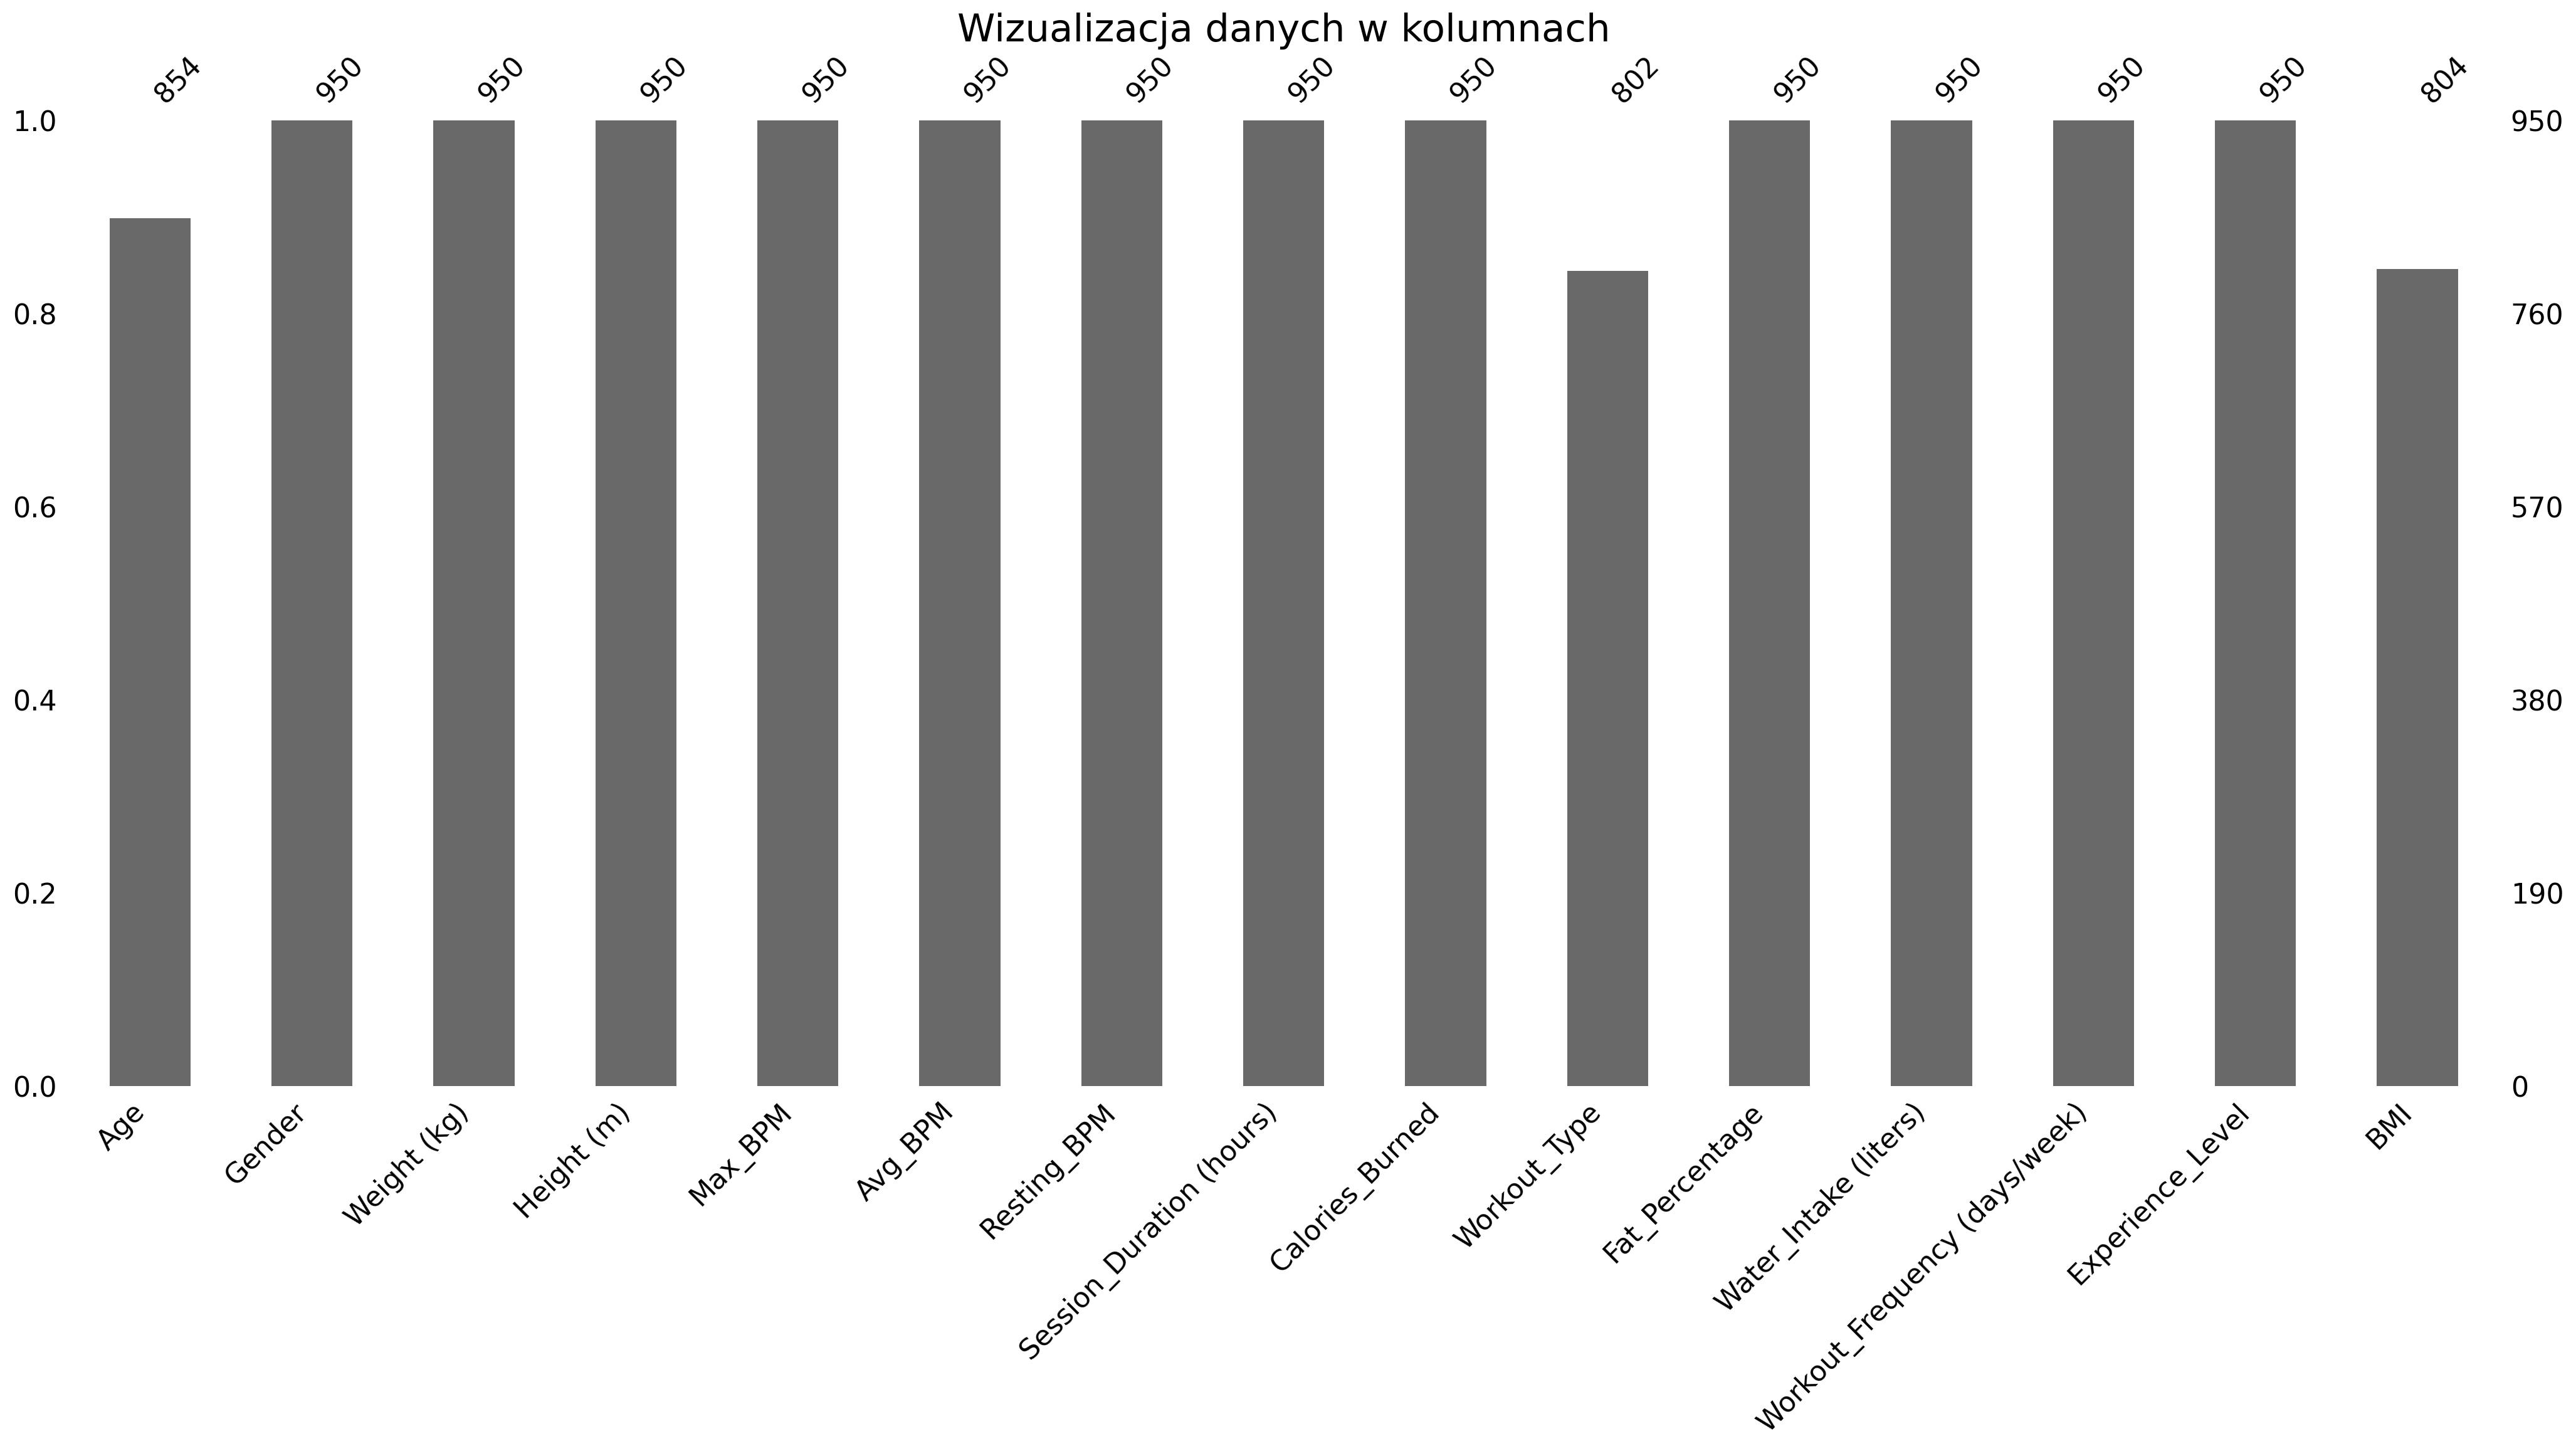

In [257]:

# plt.figure(figsize=(12, 8))
msno.bar(dirty_df)
plt.title("Wizualizacja danych w kolumnach", size=22)
plt.show()

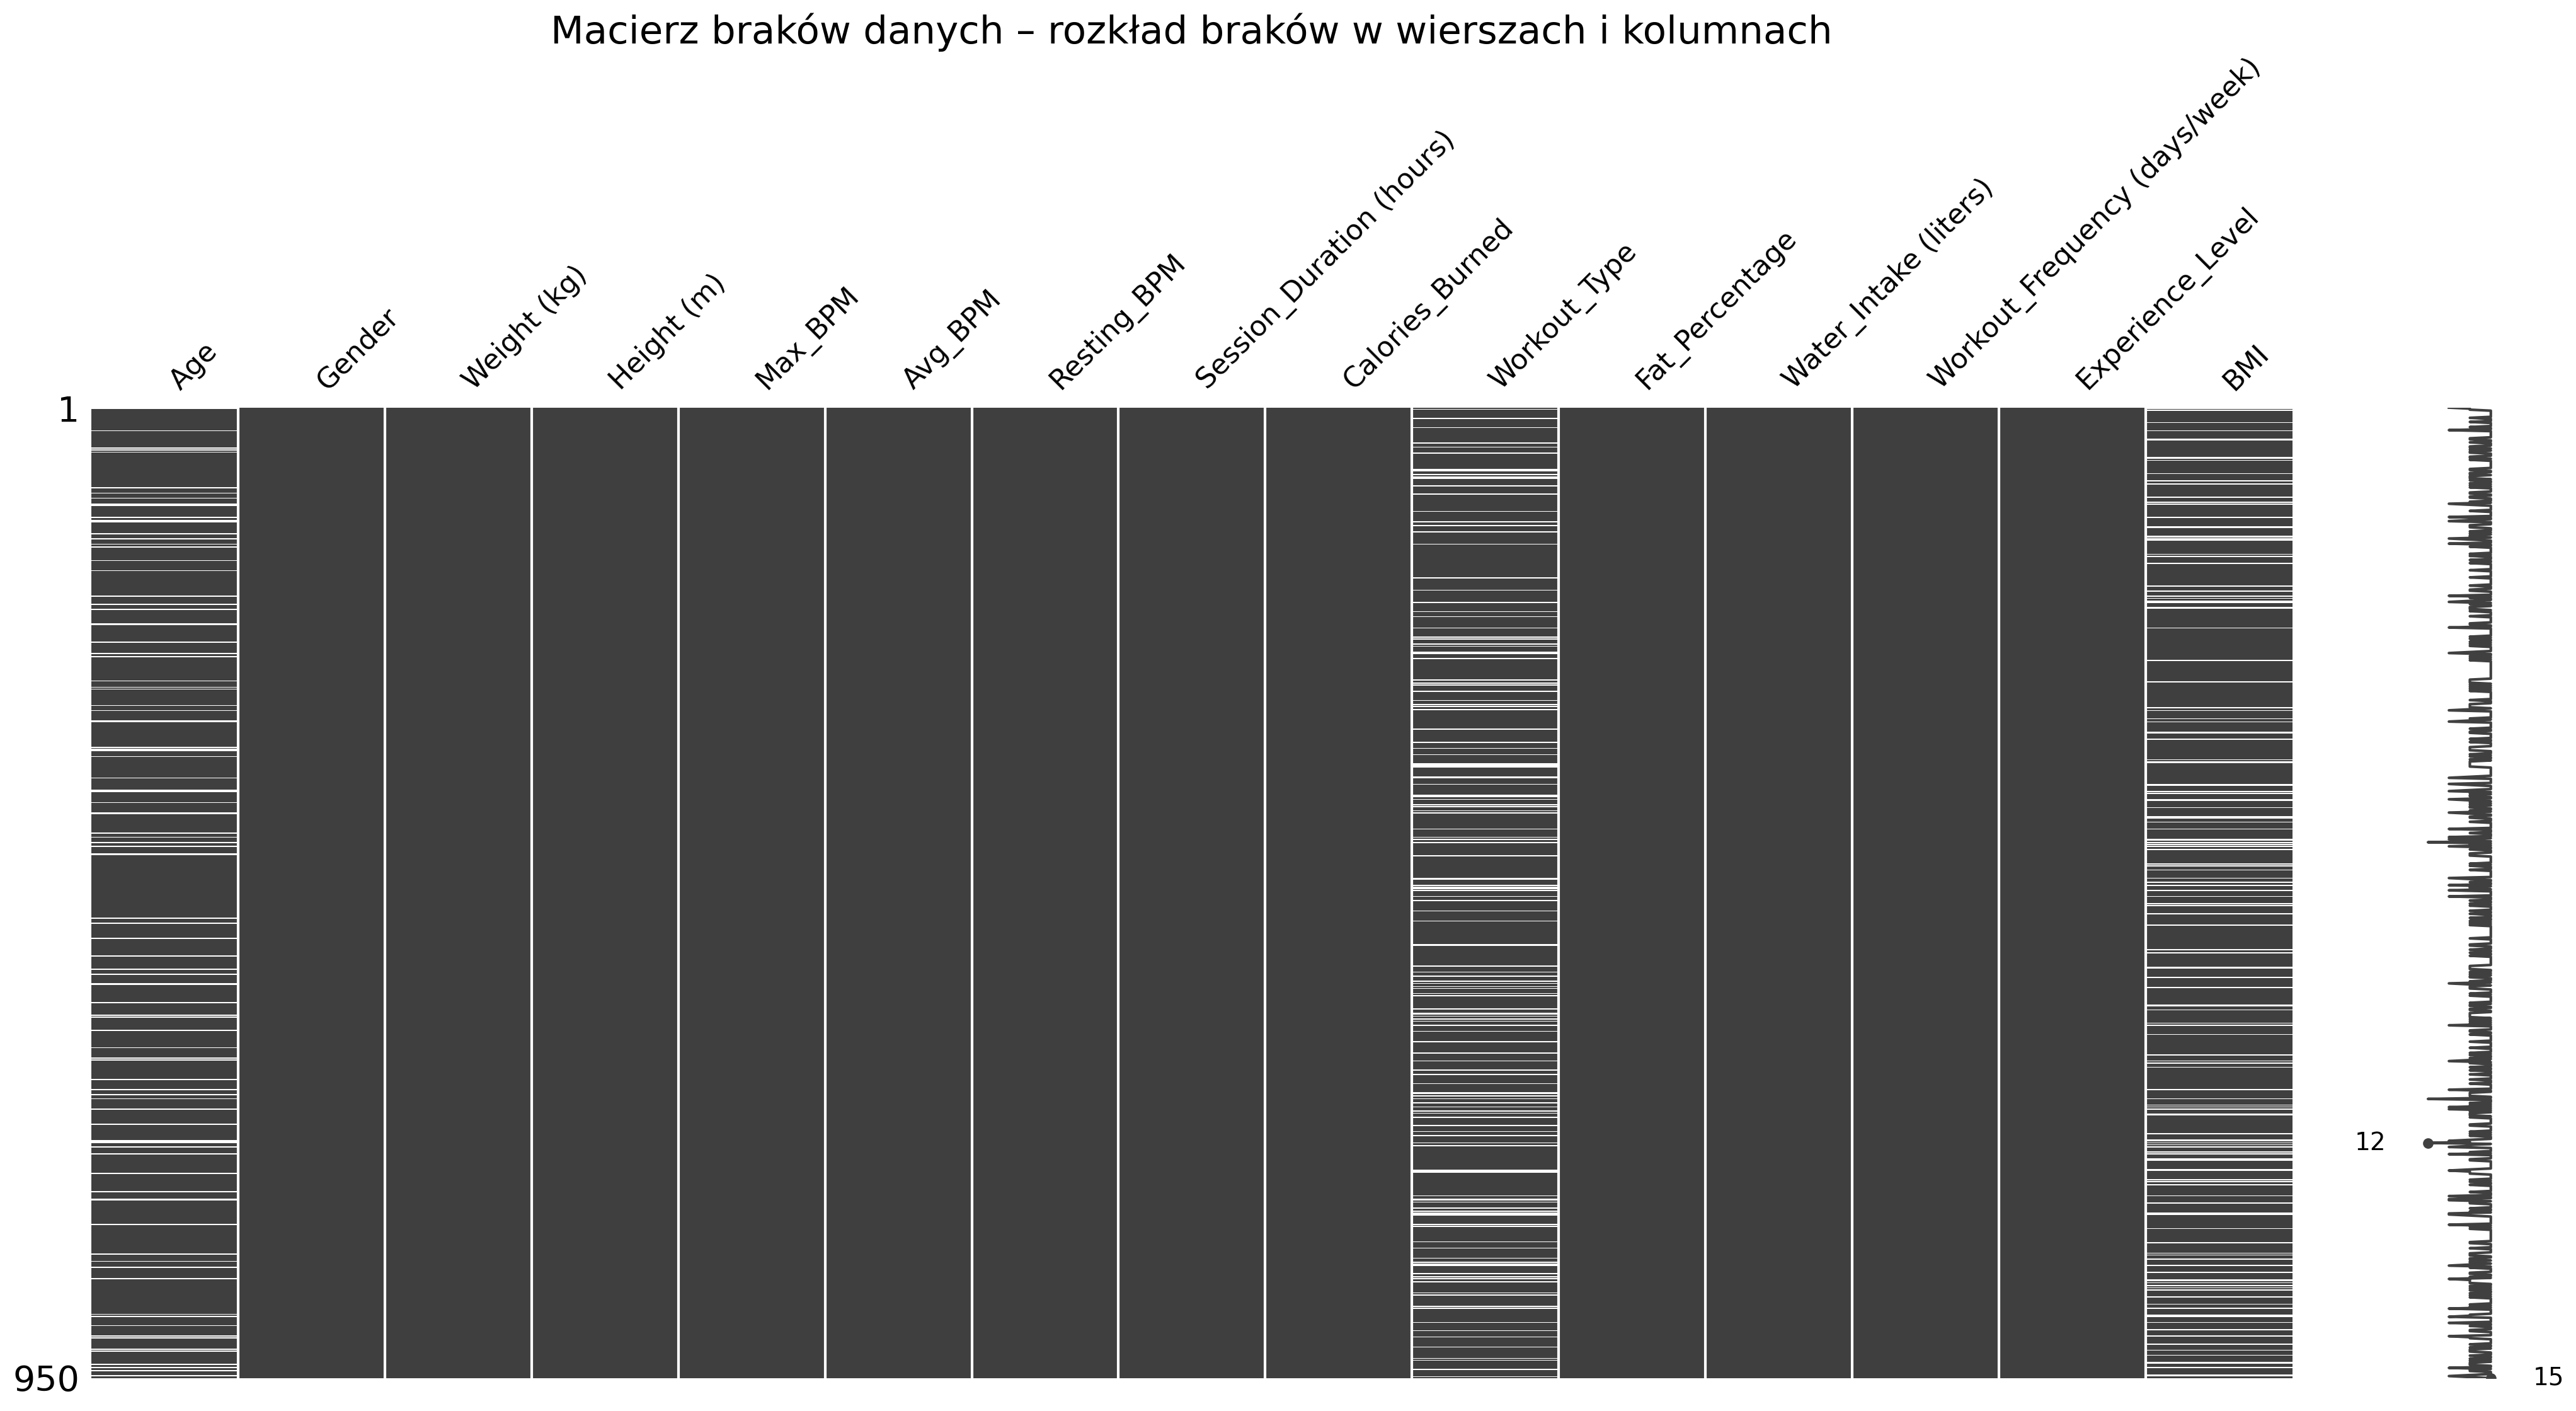

In [258]:
# Rozkład braków na poziomie wierszy
msno.matrix(dirty_df)
plt.title('Macierz braków danych – rozkład braków w wierszach i kolumnach', size=22);

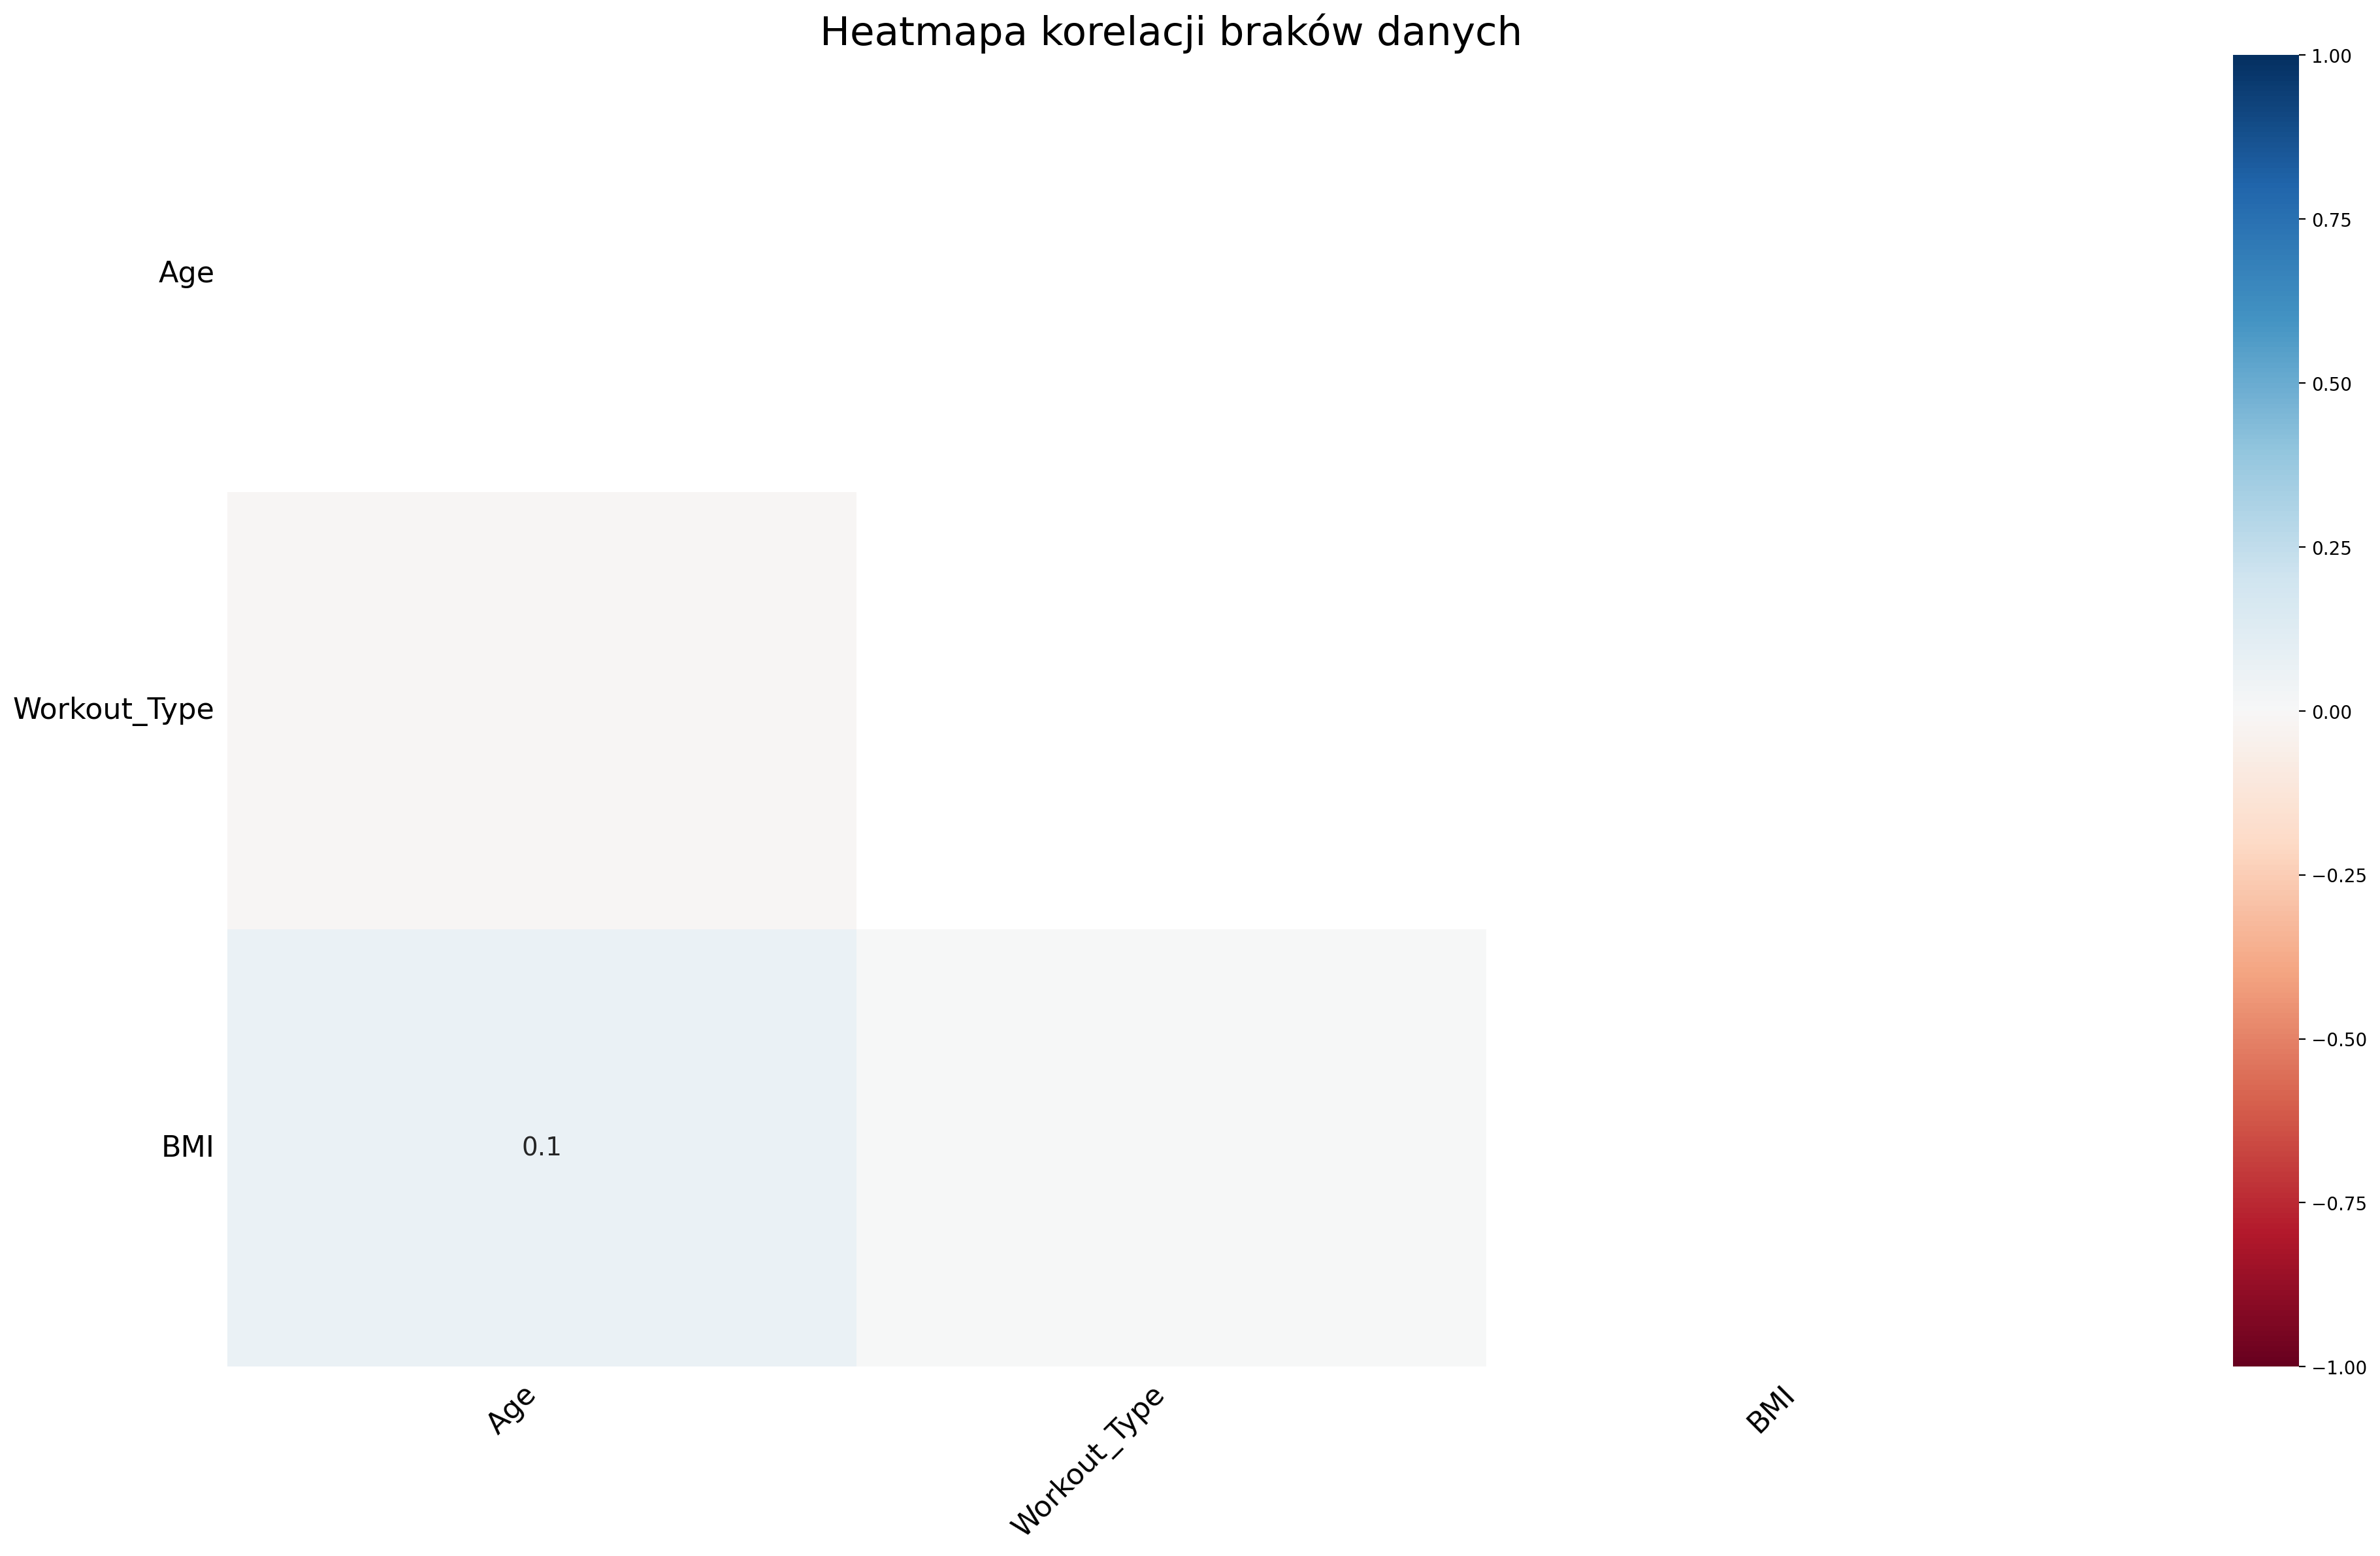

In [259]:
# Mapa korelacji braków
msno.heatmap(dirty_df)
plt.title("Heatmapa korelacji braków danych", size=22)
plt.tight_layout()
plt.show()

Tabela korelacji braków:

In [260]:
# Wybieramy tylko kolumny zawierające braki danych
cols_with_nan = dirty_df.columns[dirty_df.isnull().any()]
df_with_nan = dirty_df[cols_with_nan]

# Zamieniamy NaN na 1 (brak) i 0 (brak braków), obliczamy korelację
missing_corr = df_with_nan.isnull().astype(int).corr()

# Wyświetlenie tabeli korelacji braków
print("Tabela korelacji braków między kolumnami:")
print(missing_corr)

Tabela korelacji braków między kolumnami:
                   Age  Workout_Type       BMI
Age           1.000000     -0.009205  0.070173
Workout_Type -0.009205      1.000000  0.002050
BMI           0.070173      0.002050  1.000000


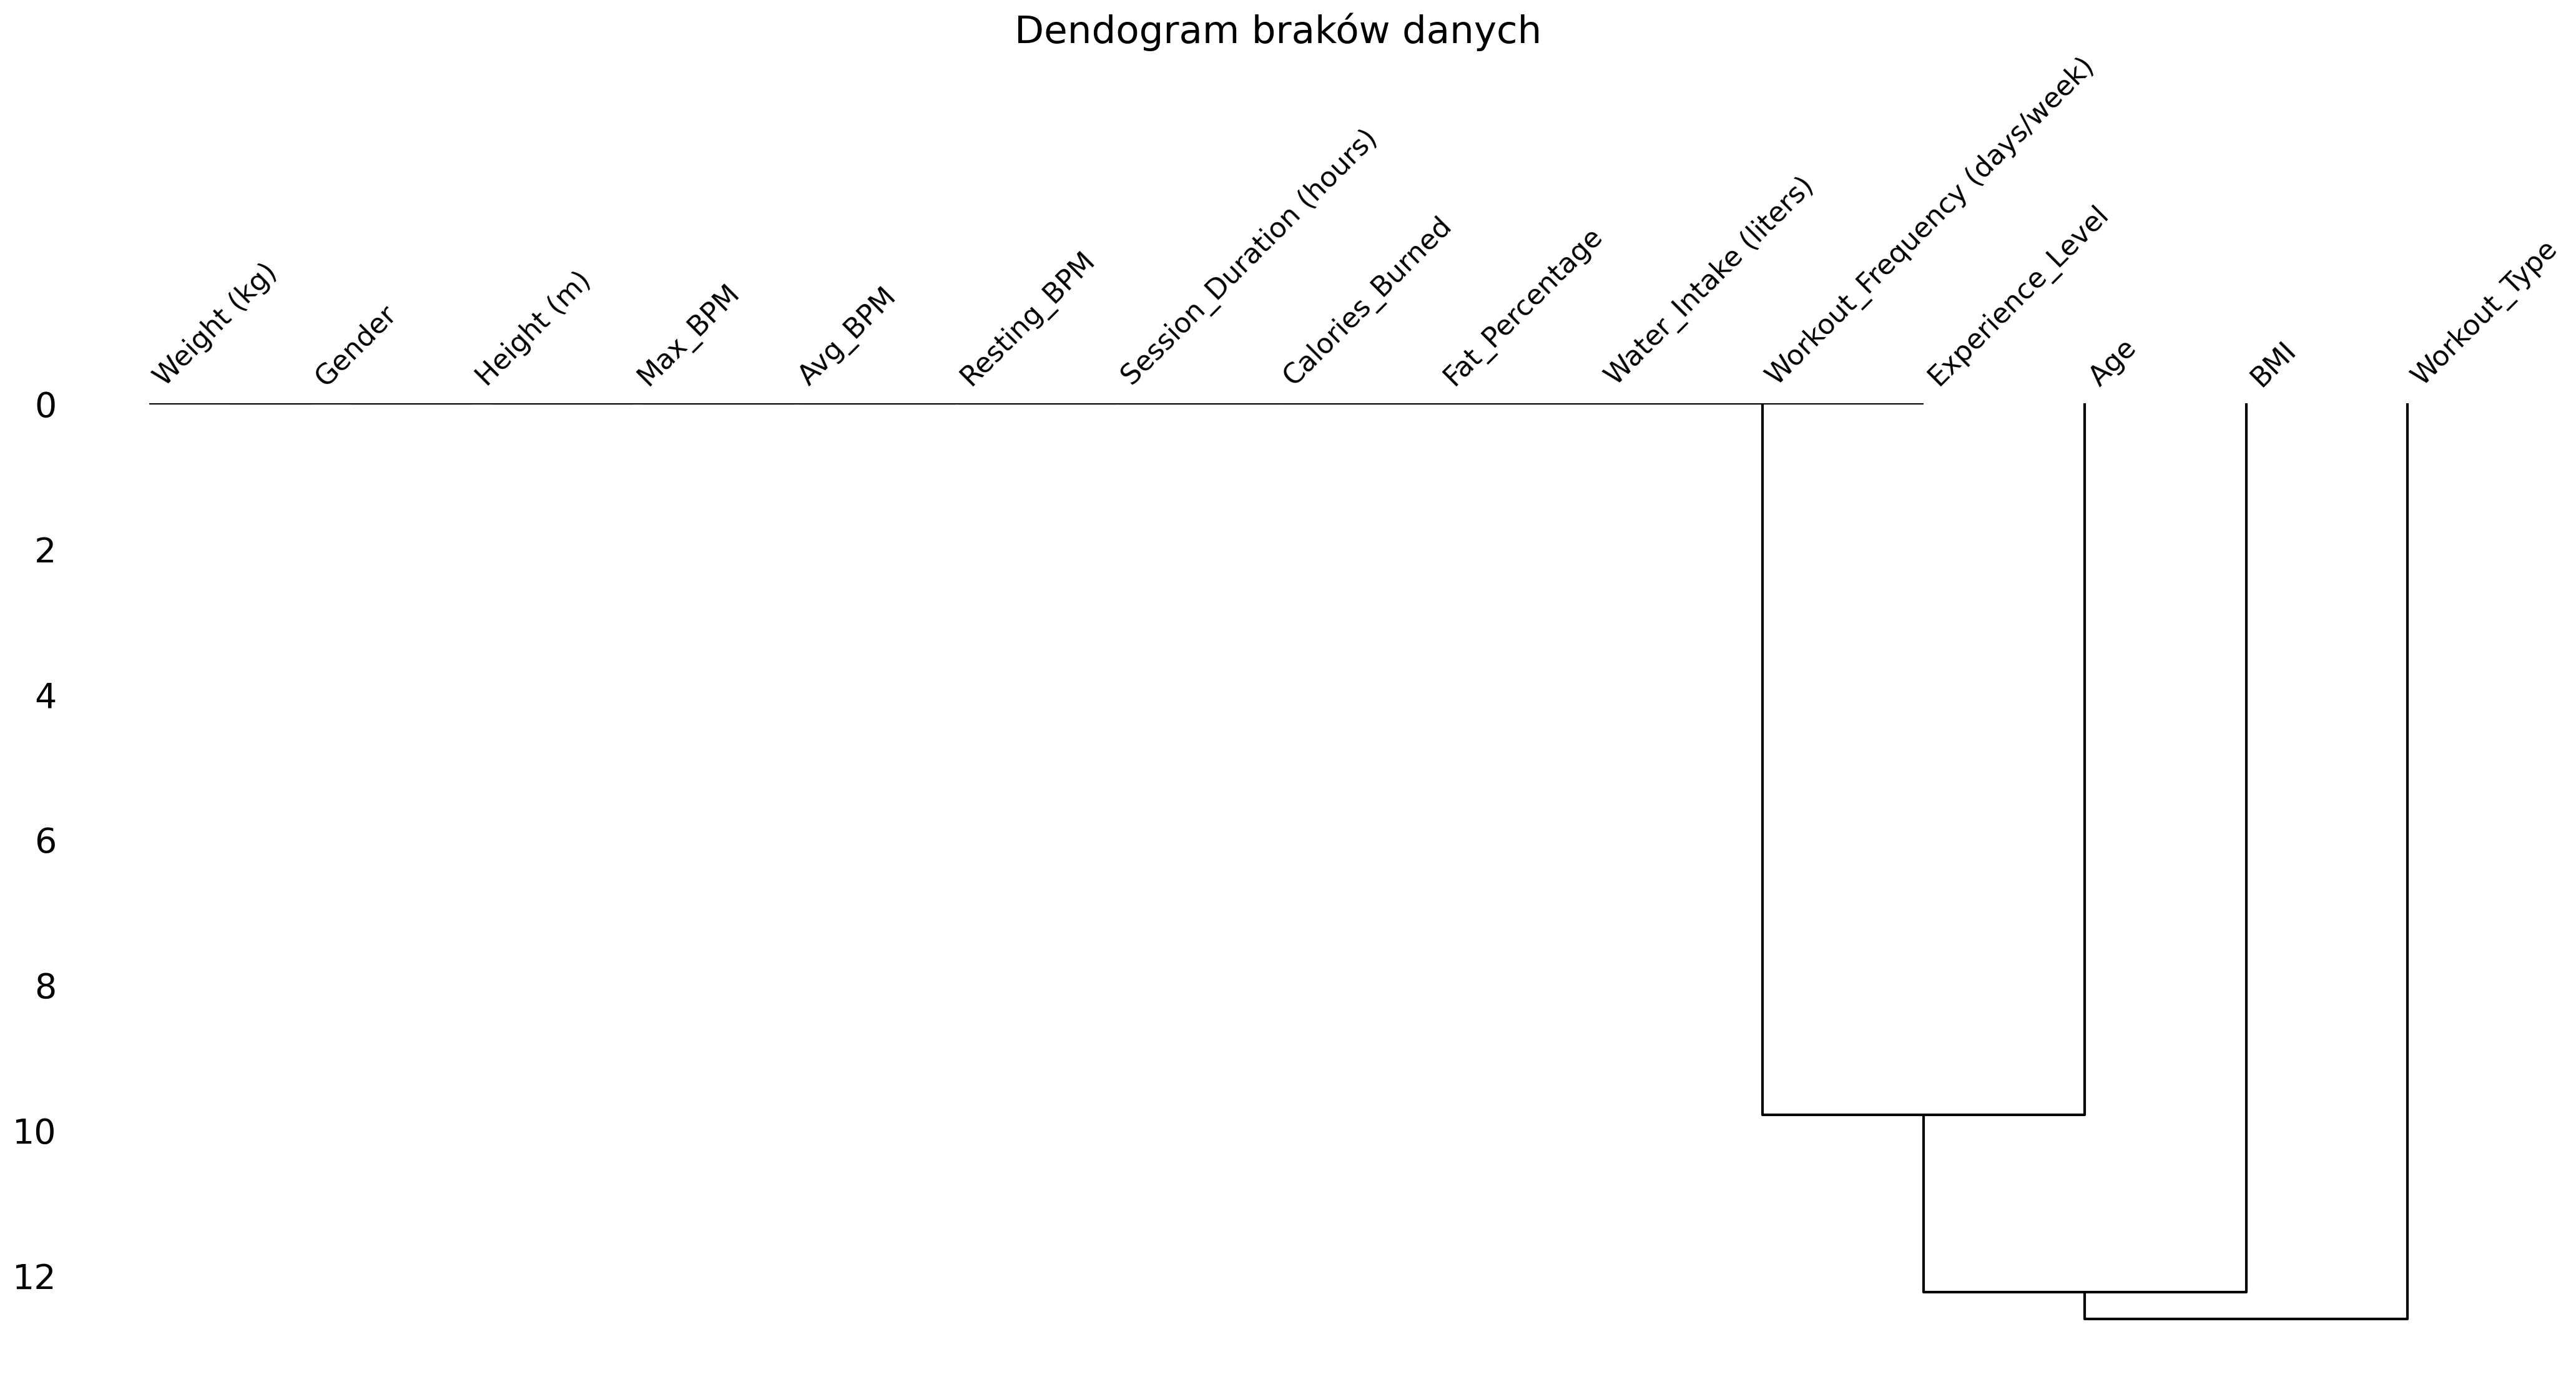

In [261]:
msno.dendrogram(dirty_df)
plt.title('Dendogram braków danych', size=22);

Linie łączące kolumny pokazują, **jak podobne są wzorce braków** między nimi.
Im niżej (w pionie) łączą się kolumny, tym bardziej podobne są ich wzorce braków.
**Dystans bliski zeru** oznacza, że kolumny mają identyczny wzorzec (w naszym przypadku nie mają braków).

**Tabela korelacji braków:**

**Słaba dodatnia korelacja braków pomiędzy Age oraz BMI.**
Braki są bardzo słabo skorelowane między kolumnami (wszystkie wartości bliskie zera) co oznacza, że braki w nich są niezależne od siebie.
* wartość dodatnia - braki występują razem
* wartość ujemna - braki nie występują razem


Dane prawdopodobnie są brakami typu MCAR (Missing Completely At Random).

MCAR oznacza, że braki występują losowo, niezależnie od wartości innych zmiennych lub od samych braków.

Mozna bezpiecznie:
- imputować dane (np. średnią, medianą, modelem regresji itp.),
lub, w niektórych przypadkach, usuwać wiersze z brakami, bez ryzyka zniekształcenia danych.
- imputować braki za pomocą KNN (K-Nearest Neighbors)

### 2.4 Imputacja braków BMI, Age, Workout_Type

**Imputacja brakujących danych BMI**

BMI (Body Mass Index) to **wskaźnik masy ciała**, który pozwala oszacować, czy masa ciała osoby jest w proporcji do jej wzrostu.

Obliczamy go według wzoru:
$$
BMI = \frac{masa\ ciała\ [kg]}{(wzrost\ [m])^2}
$$

Sprawdzenie czy w wierszach, w których BMI jest NaN, wartości cech dotyczących masy ciała (Weight (kg)) i wzrostu (Height (m)) są kompletne:

In [262]:
count = dirty_df[ dirty_df['BMI'].isna() & (dirty_df['Height (m)'].isna() | dirty_df['Weight (kg)'].isna()) ].shape[0]
print(f"Liczba wierszy z brakującym BMI, ale niekompletnymi danymi o masie/wzroście: {count}.")

Liczba wierszy z brakującym BMI, ale niekompletnymi danymi o masie/wzroście: 0.


In [263]:
rows_to_update = (
    dirty_df['BMI'].isna() &
    dirty_df['Weight (kg)'].notna() &
    dirty_df['Height (m)'].notna()
)

In [264]:
dirty_df[rows_to_update].head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0    NaN    Male         88.3        1.71      180      157           60   
2   32.0  Female         68.1        1.66      167      122           54   
14  20.0    Male        117.7        1.81      196      161           54   
23   NaN    Male        120.9        1.78      197      168           65   
31  20.0  Female         65.4        1.52      185      127           50   

    Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                       1.69             1313         Yoga            12.6   
2                       1.11              677       Cardio            33.4   
14                      1.35             1195         Yoga            26.4   
23                      0.78              721         Yoga            28.1   
31                      1.03              654         Yoga            28.0   

    Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                     3.5                              4                 3   
2                     2.3                              4                 2   
14                    3.3                              3                 2   
23                    3.4                              2                 1   
31                    2.2                              4                 2   

    BMI  
0   NaN  
2   NaN  
14  NaN  
23  NaN  
31  NaN

In [265]:
# Brakujące BMI
missing_bmi = dirty_df[dirty_df['BMI'].isna()]

# dostęp do wagai i wzrostu
weight = dirty_df['Weight (kg)'].notna()
height = dirty_df['Height (m)'].notna()

# Wyliczamy BMI tylko dla tych wierszy i zaokrąglamy do 2 miejsc
bmi_values = (dirty_df.loc[rows_to_update, 'Weight (kg)'] / (dirty_df.loc[rows_to_update, 'Height (m)'] ** 2)).round(2)

# Uzupełniamy BMI
dirty_df.loc[rows_to_update, 'BMI'] = bmi_values

print("Uzupełniono brakujące wartości BMI.")

# Sprawdzamy zakres nowo wyliczonych wartości
min_bmi = bmi_values.min()
max_bmi = bmi_values.max()

print(f"Nowo wyliczone BMI mieszczą się w zakresie od {min_bmi:.2f} do {max_bmi:.2f}.")

Uzupełniono brakujące wartości BMI.
Nowo wyliczone BMI mieszczą się w zakresie od 12.85 do 49.84.


In [266]:
# sprawdzenie, czy są jeszcze jakeś braki BMI - NaN w DataFrame
dirty_df['BMI'].isna().sum()

np.int64(0)

**Imputacja KNN dla cech liczbowych (Age)**

In [267]:
from sklearn.impute import KNNImputer

# Tworzymy obiekt KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # tutaj wstawiasz optymalną liczbę sąsiadów

# Wybieramy kolumny numeryczne do imputacji
columns_to_impute = ['Age', 'Calories_Burned']  # Przykład kolumn
dirty_df[columns_to_impute] = knn_imputer.fit_transform(dirty_df[columns_to_impute])

# zamieniamy na liczby całkowite (najczęściej zaokrąglając)
dirty_df['Age'] = dirty_df['Age'].round(0).astype(int)

dirty_df.isna().any()

Age                              False
Gender                           False
Weight (kg)                      False
Height (m)                       False
Max_BPM                          False
Avg_BPM                          False
Resting_BPM                      False
Session_Duration (hours)         False
Calories_Burned                  False
Workout_Type                      True
Fat_Percentage                   False
Water_Intake (liters)            False
Workout_Frequency (days/week)    False
Experience_Level                 False
BMI                              False
dtype: bool

In [268]:
# sprawdzenie, czy są jeszcze jakeś braki Age - NaN w DataFrame
dirty_df['Age'].isna().sum()

np.int64(0)

**Imputacja KNN dla cechy kategorycznej (Workout_Type)**

In [269]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Label encoding tylko dla Workout_Type
df_encoded = dirty_df.copy()
le = LabelEncoder()
df_encoded['Workout_Type_Encoded'] = df_encoded['Workout_Type']

# Zmieniamy tylko nie-NaN na liczby
not_null_mask = df_encoded['Workout_Type'].notna()
df_encoded.loc[not_null_mask, 'Workout_Type_Encoded'] = le.fit_transform(df_encoded.loc[not_null_mask, 'Workout_Type'])

# Zamieniamy na float (bo NaN musi być float)
df_encoded['Workout_Type_Encoded'] = pd.to_numeric(df_encoded['Workout_Type_Encoded'], errors='coerce')

# Dodajemy cechy numeryczne
features = ['Workout_Type_Encoded', 'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
            'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
            'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

# Imputacja
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_encoded[features])

# Przypisanie uzupełnionej kolumny
dirty_df['Workout_Type'] = le.inverse_transform(imputed_data[:, 0].round(0).astype(int))

# 1. LabelEncoder koduje kategorie na liczby
# 2. KNNImputer wypełnia braki na liczbach
# 3. Zamieniamy z powrotem liczby na etykiety

In [270]:
# sprawdzenie, czy są jeszcze jakeś braki Workout_Type - NaN w DataFrame
dirty_df['Workout_Type'].isna().sum()

np.int64(0)

Sprawdzenie brakujcych wartości w każdej kolumnie po imputacji braków

In [271]:
# sprawdzenie brakujcych wartości w każdej kolumnie po imputacji braków
dirty_df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

# 3. Podstawowe statystyki opisowe

In [272]:

dirty_df.describe().round(2)

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
count  950.00       950.00      950.00   950.00   950.00       950.00   
mean    38.55        73.89        1.72   180.30   143.22        62.22   
std     11.80        21.21        0.13    11.34    14.08         7.34   
min     18.00        40.00        1.50   160.00   120.00        50.00   
25%     29.00        58.10        1.62   171.00   131.00        56.00   
50%     39.00        70.05        1.71   181.00   142.00        62.00   
75%     49.00        86.07        1.80   190.00   155.75        68.00   
max     59.00       129.90        2.00   199.00   169.00        74.00   

       Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count                    950.00           950.00          950.00   
mean                       1.26           904.73           24.96   
std                        0.34           272.91            6.30   
min                        0.50           303.00           10.00   
25%                        1.04           719.25           21.22   
50%                        1.27           888.00           26.20   
75%                        1.46          1074.75           29.30   
max                        2.00          1783.00           35.00   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count                 950.00                         950.00            950.00   
mean                    2.63                           3.33              1.82   
std                     0.60                           0.92              0.74   
min                     1.50                           2.00              1.00   
25%                     2.20                           3.00              1.00   
50%                     2.60                           3.00              2.00   
75%                     3.10                           4.00              2.00   
max                     3.70                           5.00              3.00   

          BMI  
count  950.00  
mean    24.89  
std      6.63  
min     12.32  
25%     20.11  
50%     24.20  
75%     28.56  
max     49.84

Tabela z zakresem wartości (min–max) i oceną, czy są one naturalne i czy mogą zawierać outliery.

| Kolumna                 | Zakres (min–max) | Uwagi                            |
| ----------------------- | ---------------- | -------------------------------- |
| `Age`                   | 18 – 59          | ✅ Naturalny zakres               |
| `Weight (kg)`           | 40 – 130         | ✅ Ok, możliwe outliery po 120 kg|
| `Height (m)`            | 1.5 – 2.0 m      | ✅ Realistyczny zakres            |
| `Max_BPM`               | 160 – 199        | ✅ Maksymalne tętno               |
| `Avg_BPM`               | 120 – 169        | ✅ Wysiłkowe                      |
| `Resting_BPM`           | 50 – 74          | ✅ Spoczynkowe                    |
| `Session_Duration (h)`  | 0.5 – 2.0        | ✅ Logiczne                       |
| `Calories_Burned`       | 303 – 1783       | ✅ Różnorodne, ale wiarygodne     |
| `Fat_Percentage`        | 10 – 35%         | ✅ Ok                             |
| `Water_Intake (liters)` | 1.5 – 3.7        | ✅ Realne                         |
| `Workout_Frequency`     | 2 – 5 dni/tyg.   | ✅ Typowe                         |
| `Experience_Level`      | 1 – 3            | ✅ Skale kategoryczne             |
| `BMI`                   | 12.32 – 47.72    | ✅ Skrajne wartości, ale realne   |


. 

| Kolumna            | Podejrzane dolne outliery | Komentarz                                                                          |
| ------------------ | ------------------------- | ---------------------------------------------------------------------------------- |
| `Weight (kg)`      | < 45 kg                   | Możliwe u osoby dorosłej tylko w wyjątkowych przypadkach (np. niedowaga kliniczna) |
| `Height (m)`       | < 1.55 m                  | Bardzo niski wzrost u dorosłego                                                    |
| `Session_Duration` | = 0.5 h                   | Możliwe, ale warto sprawdzić – czy to nie "niedopisane"                            |
| `Calories_Burned`  | < 350 kcal                | Niska wartość przy sesji sportowej – możliwe, ale warto zbadać                     |
| `BMI`              | < 15                      | Może wskazywać na zaburzenia żywieniowe lub błędny pomiar                          |


# 4. Outliery

Outliery mogą występować zarówno po stronie zbyt wysokich, jak i zbyt niskich wartości.

Dolne outliery mogą:

- zaniżać lub zawyżać średnią i fałszować imputację, np. BMI uzupełnione średnią na poziomie 18,5 mimo że grupa ma zwykle 23

- być efektem błędów w danych wejściowych, np. brak przecinka w liczbie

## 4.1 Wartości odstające z wykorzystaniem IQR

Metoda oparta na kwartylach pozwala wykrywać wartości odstające w sposób odporny na wpływ ekstremalnych obserwacji.  
**IQR (Interquartile Range) to rozstęp między 1 kwartylem (Q1) a 3 kwartylem (Q3):**

$$
IQR = Q3 - Q1
$$

Wartości odstające definiujemy jako te, które leżą poza zakresem:  
$$
[ Q1 - 1.5 \times IQR,\quad Q3 + 1.5 \times IQR ]
$$

Punkty znacznie oddalone od większości obserwacji są potencjalnymi outlierami i wymagają weryfikacji.


In [273]:
# Wybieramy kolumny liczbowe
numeric_columns = dirty_df.select_dtypes(include='number').columns

# Lista do przechowywania wyników
outlier_report_gender = []

# Podział na płeć i analiza IQR
for gender in dirty_df['Gender'].dropna().unique():
    df_gender = dirty_df[dirty_df['Gender'] == gender]
    
    for col in numeric_columns:
        data = df_gender[col].dropna()
        if data.empty:
            continue
        
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        outlier_report_gender.append({
            'Gender': gender,
            'Column': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': len(outliers),
            'Outlier %': (len(outliers) / len(data)) * 100
        })

# Tworzenie i wyświetlanie DataFrame
outlier_df_gender = pd.DataFrame(outlier_report_gender).round(2)
print(outlier_df_gender.to_string(index=False))
print()
df_male = dirty_df[dirty_df['Gender'] == 'Male'].shape[0]
df_female = dirty_df[dirty_df['Gender'] == 'Female'].shape[0]
print(f'W badanej grupie męczyźni stanowią {(df_male/len(df))*100:.2f}% ({df_male} obserwacji) a kobiety {(df_female/len(df))*100:.2f}% ({df_female} obserwacji).')


Gender                        Column     Q1      Q3    IQR  Lower Bound  Upper Bound  Outlier Count  Outlier %
  Male                           Age  29.00   49.00  20.00        -1.00        79.00              0       0.00
  Male                   Weight (kg)  69.95  101.75  31.80        22.25       149.45              0       0.00
  Male                    Height (m)   1.70    1.89   0.19         1.42         2.17              0       0.00
  Male                       Max_BPM 171.00  190.00  19.00       142.50       218.50              0       0.00
  Male                       Avg_BPM 131.50  156.00  24.50        94.75       192.75              0       0.00
  Male                   Resting_BPM  56.00   69.00  13.00        36.50        88.50              0       0.00
  Male      Session_Duration (hours)   1.04    1.46   0.42         0.41         2.09              0       0.00
  Male               Calories_Burned 742.00 1138.50 396.50       147.25      1733.25              2       0.40
 

## 4.2 Boxploty cech liczbowych Calories_Burned, Fat_Percentage,  BMI z podziałem na płeć

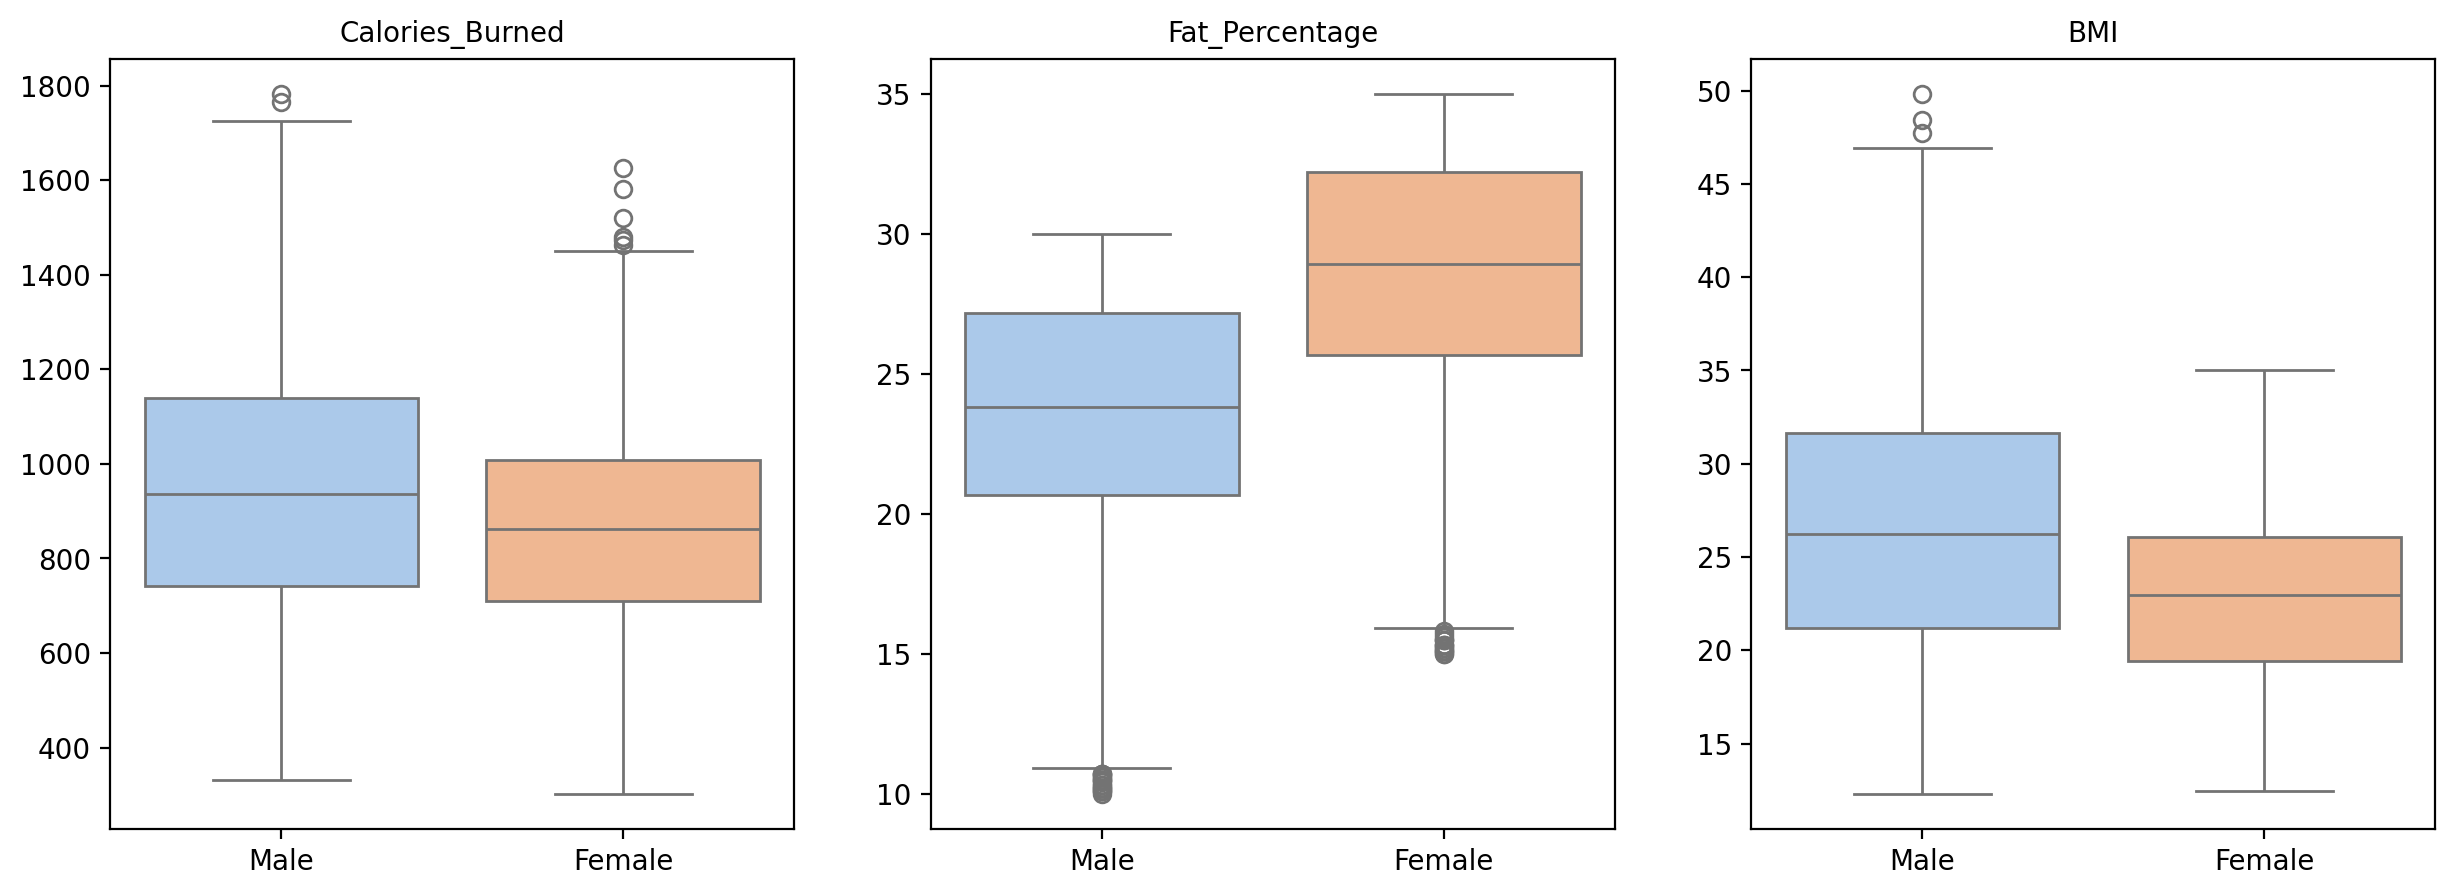

In [274]:
# Wybieramy kolumny liczbowe do analizy
selected_columns = ['Calories_Burned', 'Fat_Percentage', 'BMI']

# Parametry siatki wykresów
cols_per_row = 3
fig, axes = plt.subplots(1, len(selected_columns), figsize=(5 * len(selected_columns), 5))

# Upewniamy się, że axes to lista
if len(selected_columns) == 1:
    axes = [axes]

# Tworzymy boxploty
for ax, col in zip(axes, selected_columns):
    sns.boxplot(
        data=dirty_df,
        x='Gender',
        y=col,
        hue='Gender',
        ax=ax,
        palette='pastel'
    )
    ax.set_title(f"{col}", fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

## 4.3 Analiza rozkładu danych oraz usuwanie outlierów

### 4.3.1 Liczebność osób wedłóg płci

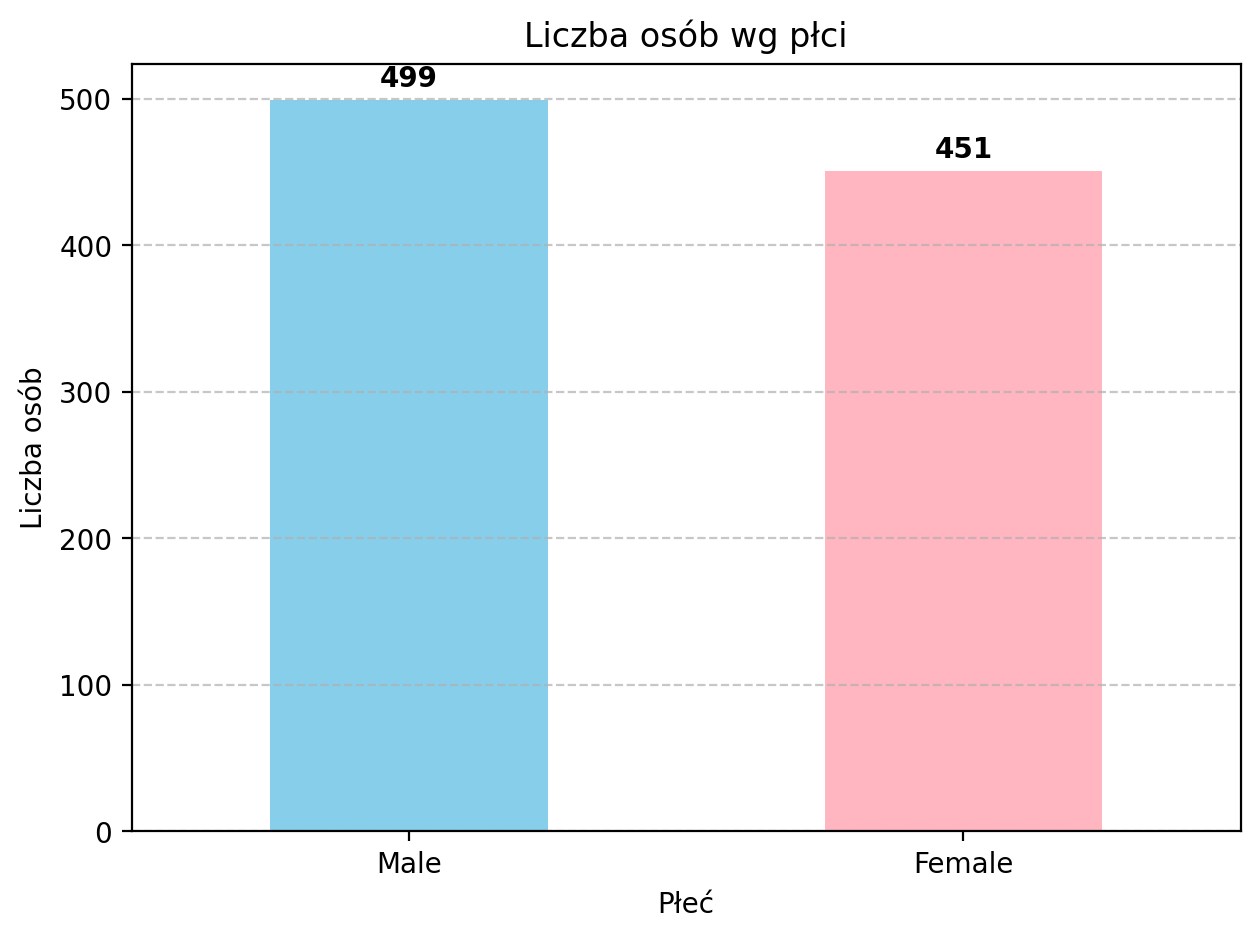

In [275]:
# Liczba osób wg płci
gender_counts = dirty_df['Gender'].value_counts()

# Tworzenie wykresu słupkowego
ax = gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])

# Dodanie tytułu i etykiet
plt.title("Liczba osób wg płci")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dodanie wartości liczbowych nad słupkami
for i, value in enumerate(gender_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3.2 Outliery Fat_Percentage

In [276]:
print("Outliery Fat_Percentage < 15.82 dla kobiet:")
print()

# Dolna granica z tabeli
lower_bound = 15.82

# Filtrujemy outliery poniżej dolnej granicy
outliers_low = dirty_df[(dirty_df['Gender'] == 'Female') & (dirty_df['Fat_Percentage'] < lower_bound)]

# Wyświetlamy wszystkie kolumny
print(outliers_low.to_string(index=False))

Outliery Fat_Percentage < 15.82 dla kobiet:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  56 Female         58.0        1.68      168      156           74                      1.59           1116.0         HIIT            15.5                    2.7                              5                 3 20.55
  57 Female         64.0        1.52      170      129           52                      1.73           1004.0         HIIT            15.2                    2.7                              5                 3 27.70
  30 Female         61.5        1.69      160      152           63                      1.80           1231.0       Cardio            15.5                    2.7                              4                 3 21.53
  41 Female         63.4        1.59      162      153           55                

W analizowanym zbiorze zidentyfikowano 16 kobiet z procentową zawartością tkanki tłuszczowej poniżej przyjętej dolnej granicy 15,82%. Wartości te mieszczą się w zakresie 15,0–15,8%, co może wskazywać na bardzo wysoki poziom aktywności fizycznej (HIIT, Strength, Cardio). Są to wartości typowe dla osób regularnie trenujących, jednak dla przeciętnej kobiety mogą oznaczać zbyt niski poziom tłuszczu.

In [277]:
print("Outliery Fat_Percentage < 10.90  dla mezczyzn:")
print()

# Dolna granica z tabeli
lower_bound = 10.90 

# Filtrujemy outliery poniżej dolnej granicy
outliers_low = dirty_df[(dirty_df['Gender'] == 'Male') & (dirty_df['Fat_Percentage'] < lower_bound)]

# Wyświetlamy wszystkie kolumny
print(outliers_low.to_string(index=False))

Outliery Fat_Percentage < 10.90  dla mezczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  38   Male         81.4        1.71      187      148           58                      1.52           1237.0         HIIT            10.2                    3.5                              5                 3 27.84
  30   Male         85.3        1.95      160      155           68                      1.61           1373.0         Yoga            10.4                    3.5                              5                 3 22.43
  25   Male         80.9        1.80      178      126           59                      1.55           1074.0       Cardio            10.7                    3.5                              4                 3 24.97
  58   Male         82.2        1.87      171      143           55             

W analizowanym zbiorze zidentyfikowano 19 mężczyzn z procentową zawartością tkanki tłuszczowej poniżej dolnej granicy 10,9%. Wartości te wahają się od 10,0% do 10,7%, co jest charakterystyczne dla osób o wysokiej aktywności fizycznej, często uprawiających intensywne treningi (HIIT, Strength, Cardio). Są to wartości niskie, ale jeszcze mieszczące się w granicach możliwych dla mężczyzn o sportowym trybie życia. 

### 4.3.3 Outliery Calories_Burned

In [278]:
print("Outliery Calories_Burned > 1455.75 dla kobiet:")
print()

# Górna granica z tabeli
upper_bound = 1455.75

# Filtrujemy outliery powyzej górnej granicy
outliers_high = dirty_df[(dirty_df['Gender'] == 'Female') & (dirty_df['Calories_Burned'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery Calories_Burned > 1455.75 dla kobiet:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  34 Female         60.1        1.79      170      165           63                      1.97           1625.0       Cardio            15.9                    2.7                              4                 3 18.76
  43 Female         57.3        1.79      175      166           62                      1.98           1479.0         Yoga            17.8                    2.7                              4                 3 17.88
  21 Female         61.3        1.57      191      152           64                      1.94           1474.0         HIIT            17.2                    2.7                              4                 3 24.87
  28 Female         55.1        1.79      192      159           67             

W grupie kobiet wykonujących aktywność oznaczoną jako Yoga wykryto wartości Calories_Burned powyżej 1455,75 kcal, dochodzące nawet do 1582 kcal. Są to wartości nietypowe dla jogi, nawet przy długim czasie trwania, i mogą wskazywać na błędną klasyfikację rodzaju treningu lub pomiaru spalonych kalorii.

**Rekordy zostaną usunięte od dalszej analizy**

In [279]:
# zapisujemy podejrzane dane do osobnego dataframe
upper_bound = 1455.75
suspect_calories_female = dirty_df[
    (dirty_df['Gender'] == 'Female') &
    (dirty_df['Calories_Burned'] > upper_bound)
]

**Usunięcie rekordów, gdzie Outliery Calories_Burned > 1455.75 dla kobiet z głównego dataframe**

In [280]:
dirty_df = dirty_df.drop(suspect_calories_female.index)
dirty_df.shape

(944, 15)

In [281]:
print("Outliery Calories_Burned > 1733.25 dla mezczyzn:")
print()

# Górna granica z tabeli
upper_bound = 1733.25

# Filtruj outliery powyzej górnej granicy
outliers_high = dirty_df[(dirty_df['Gender'] == 'Male') & (dirty_df['Calories_Burned'] > upper_bound)]

# Wyświetlamy wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery Calories_Burned > 1733.25 dla mezczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  19   Male         82.4        1.96      174      169           62                      1.90           1766.0         HIIT            10.1                    3.5                              5                 3 21.45
  26   Male         89.8        1.92      199      168           67                      1.93           1783.0     Strength            10.6                    3.5                              4                 3 24.36


1766 kcal to ekstremalnie wysoka wartość jak na HIIT, przekraczająca możliwości większości osób.
1783 kcal wymagałoby gigantycznego obciążenia, bardzo krótkich przerw i ekstremalnej objętości.
Oba przypadki wskazują na błędne dane.

**Rekordy zostaną usunięte od dalszej analizy**

In [282]:
# zapisujemy podejrzane dane do osobnego dataframe
upper_bound = 1733.25
suspect_calories_male = dirty_df[
    (dirty_df['Gender'] == 'Male') &
    (dirty_df['Calories_Burned'] > upper_bound)
]

In [283]:
dirty_df = dirty_df.drop(suspect_calories_male.index)
dirty_df.shape

(942, 15)

### 4.3.5 Outliery BMI

In [284]:
print("Outliery BMI > 47.35 dla mezczyzn:")
print()
# Górna granica z tabeli
upper_bound = 47.35

# Filtrujemy outliery powyzej górnej granicy
outliers_high = dirty_df[(dirty_df['Gender'] == 'Male') & (dirty_df['BMI'] > upper_bound)]

# Wyświetlamy wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery BMI > 47.35 dla mezczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  57   Male        126.8        1.63      161      133           73                      0.96            632.0         Yoga            20.8                    2.1                              2                 1 47.72
  48   Male        129.2        1.61      193      167           62                      1.06            876.0         Yoga            21.4                    2.9                              4                 2 49.84
  35   Male        127.1        1.62      187      128           69                      1.02            718.0     Strength            23.3                    3.4                              4                 2 48.43


MI > 47 oznacza skrajną otyłość III stopnia. Te wartości są skrajne ale teoretycznie możliwe.

**Oczyszczony zbiór Data Frame po usunięciu indeksów - do dalszej analizy:**

In [285]:
# clean_data = dirty_df.copy()
clean_data = dirty_df.copy().reset_index(drop=True)
clean_data.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   28    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0     Strength            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [286]:
clean_data.shape

(942, 15)

In [287]:
# clean_data.isna().sum()

# 5. Histogramy rozkładów cech według płci i korelacje

### 5.1 Histogramy 

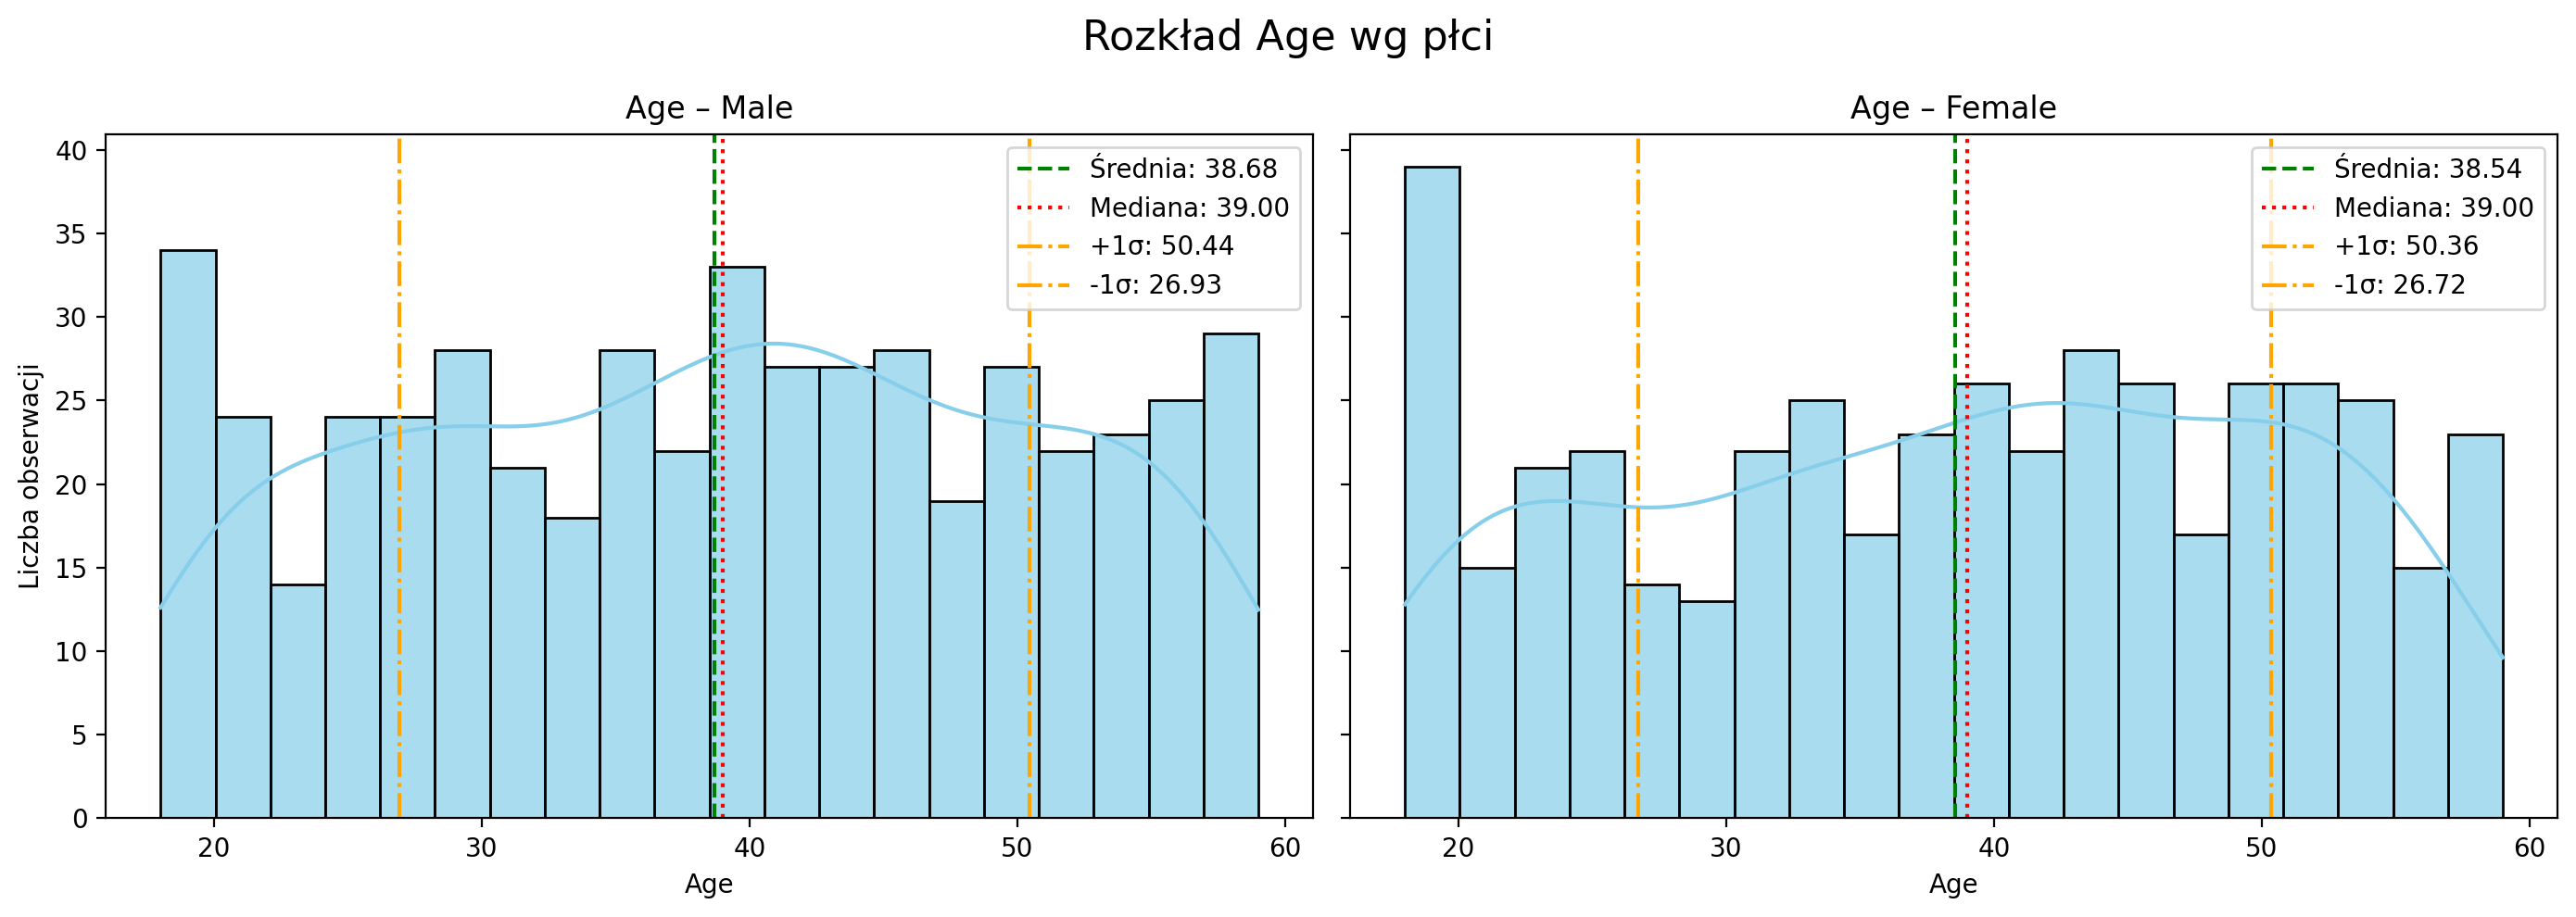

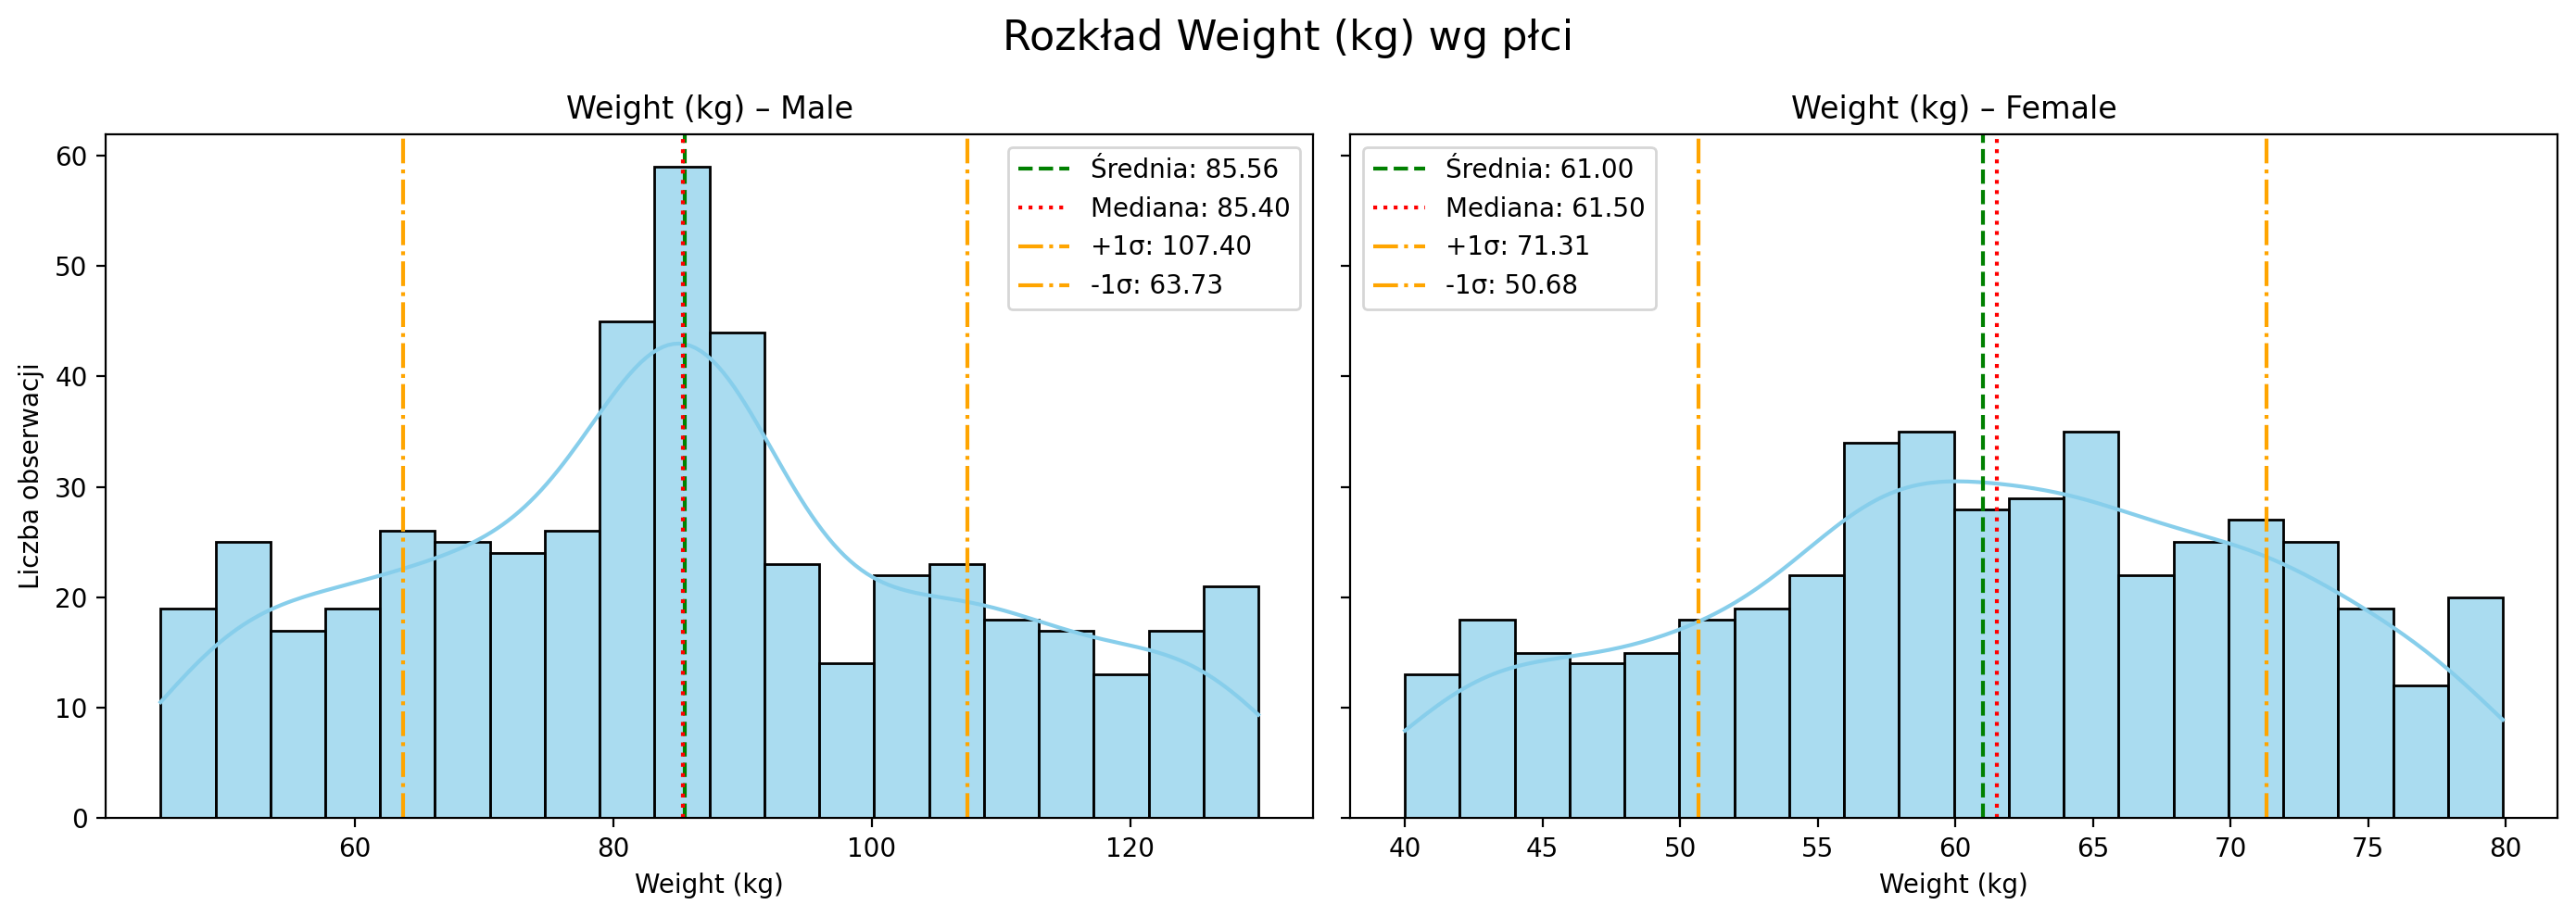

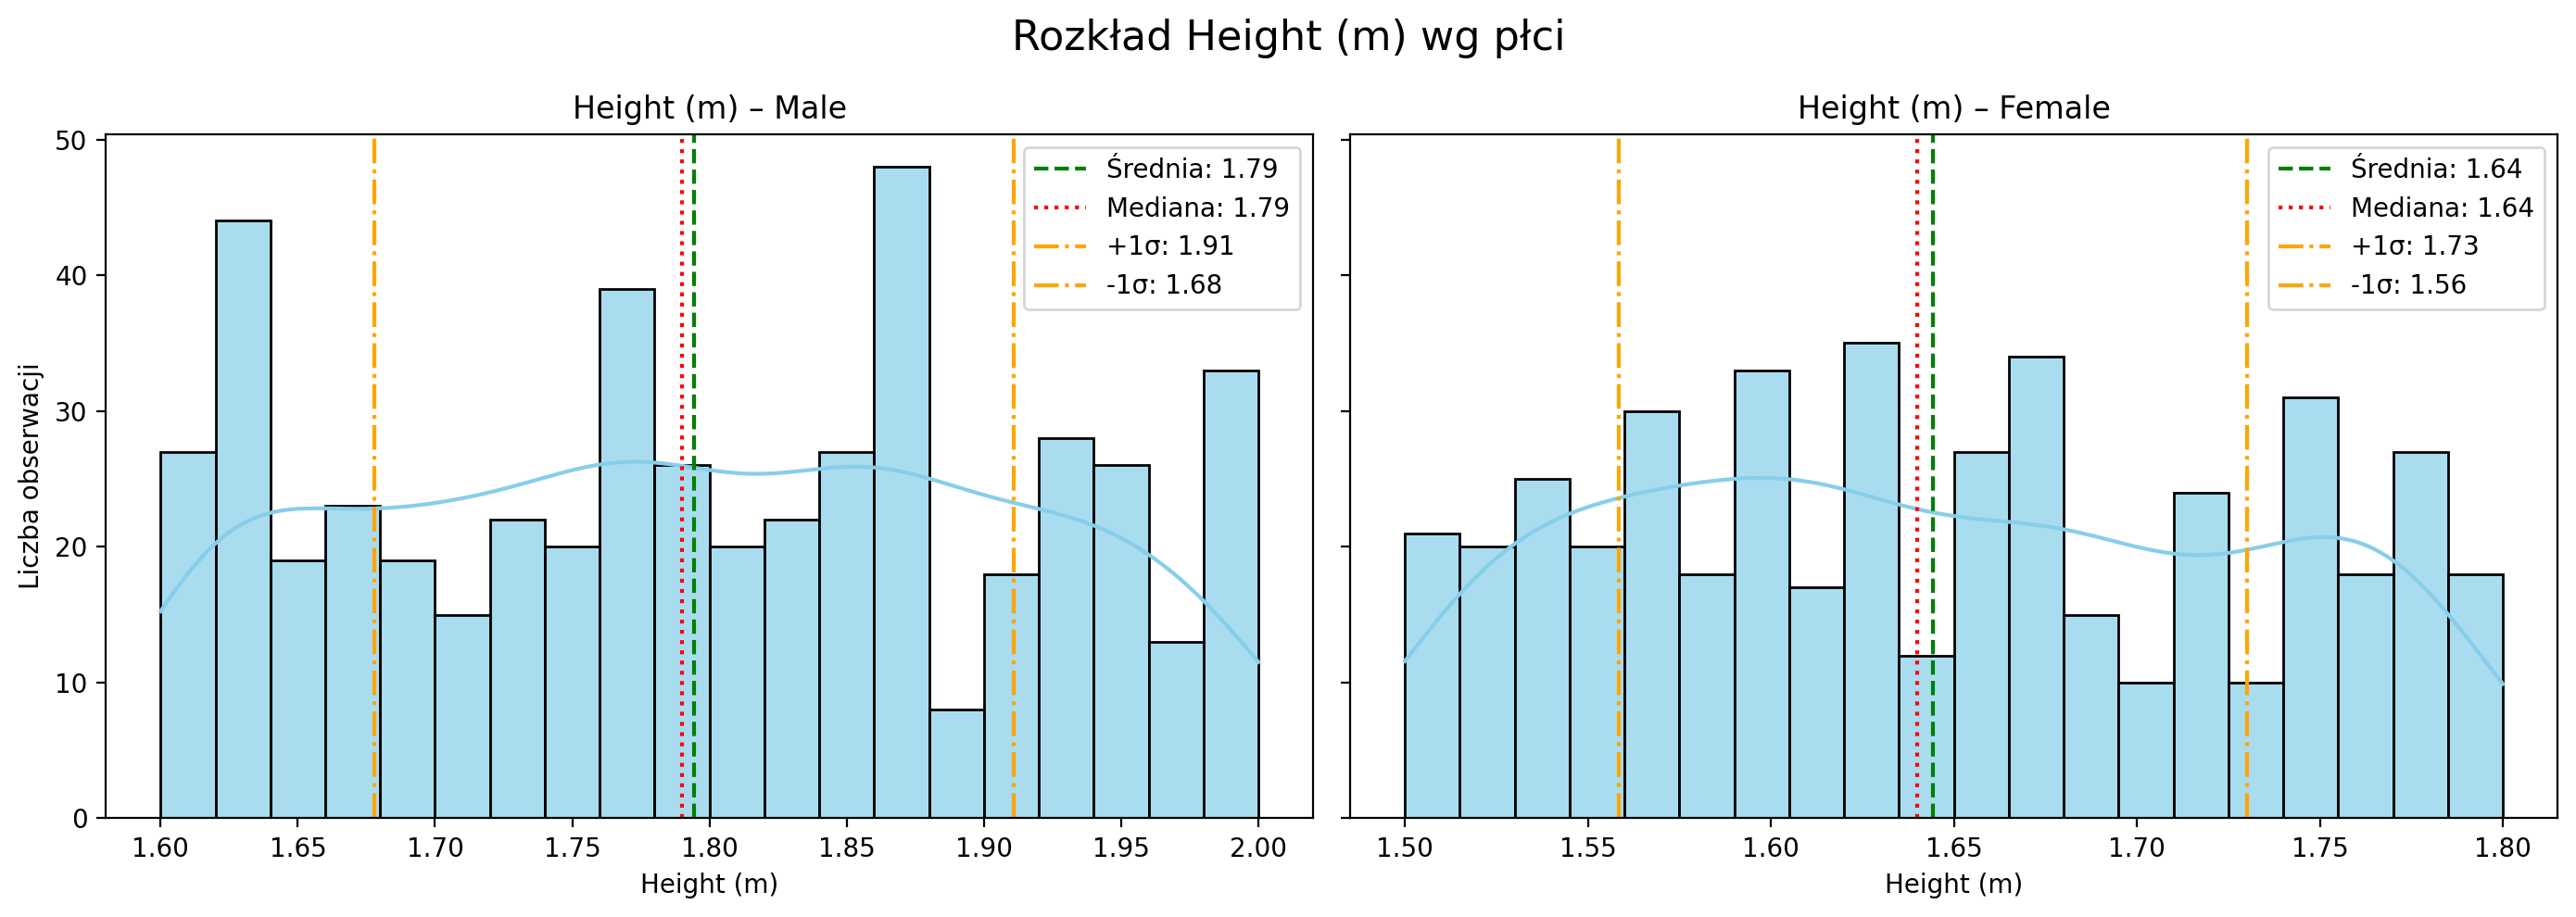

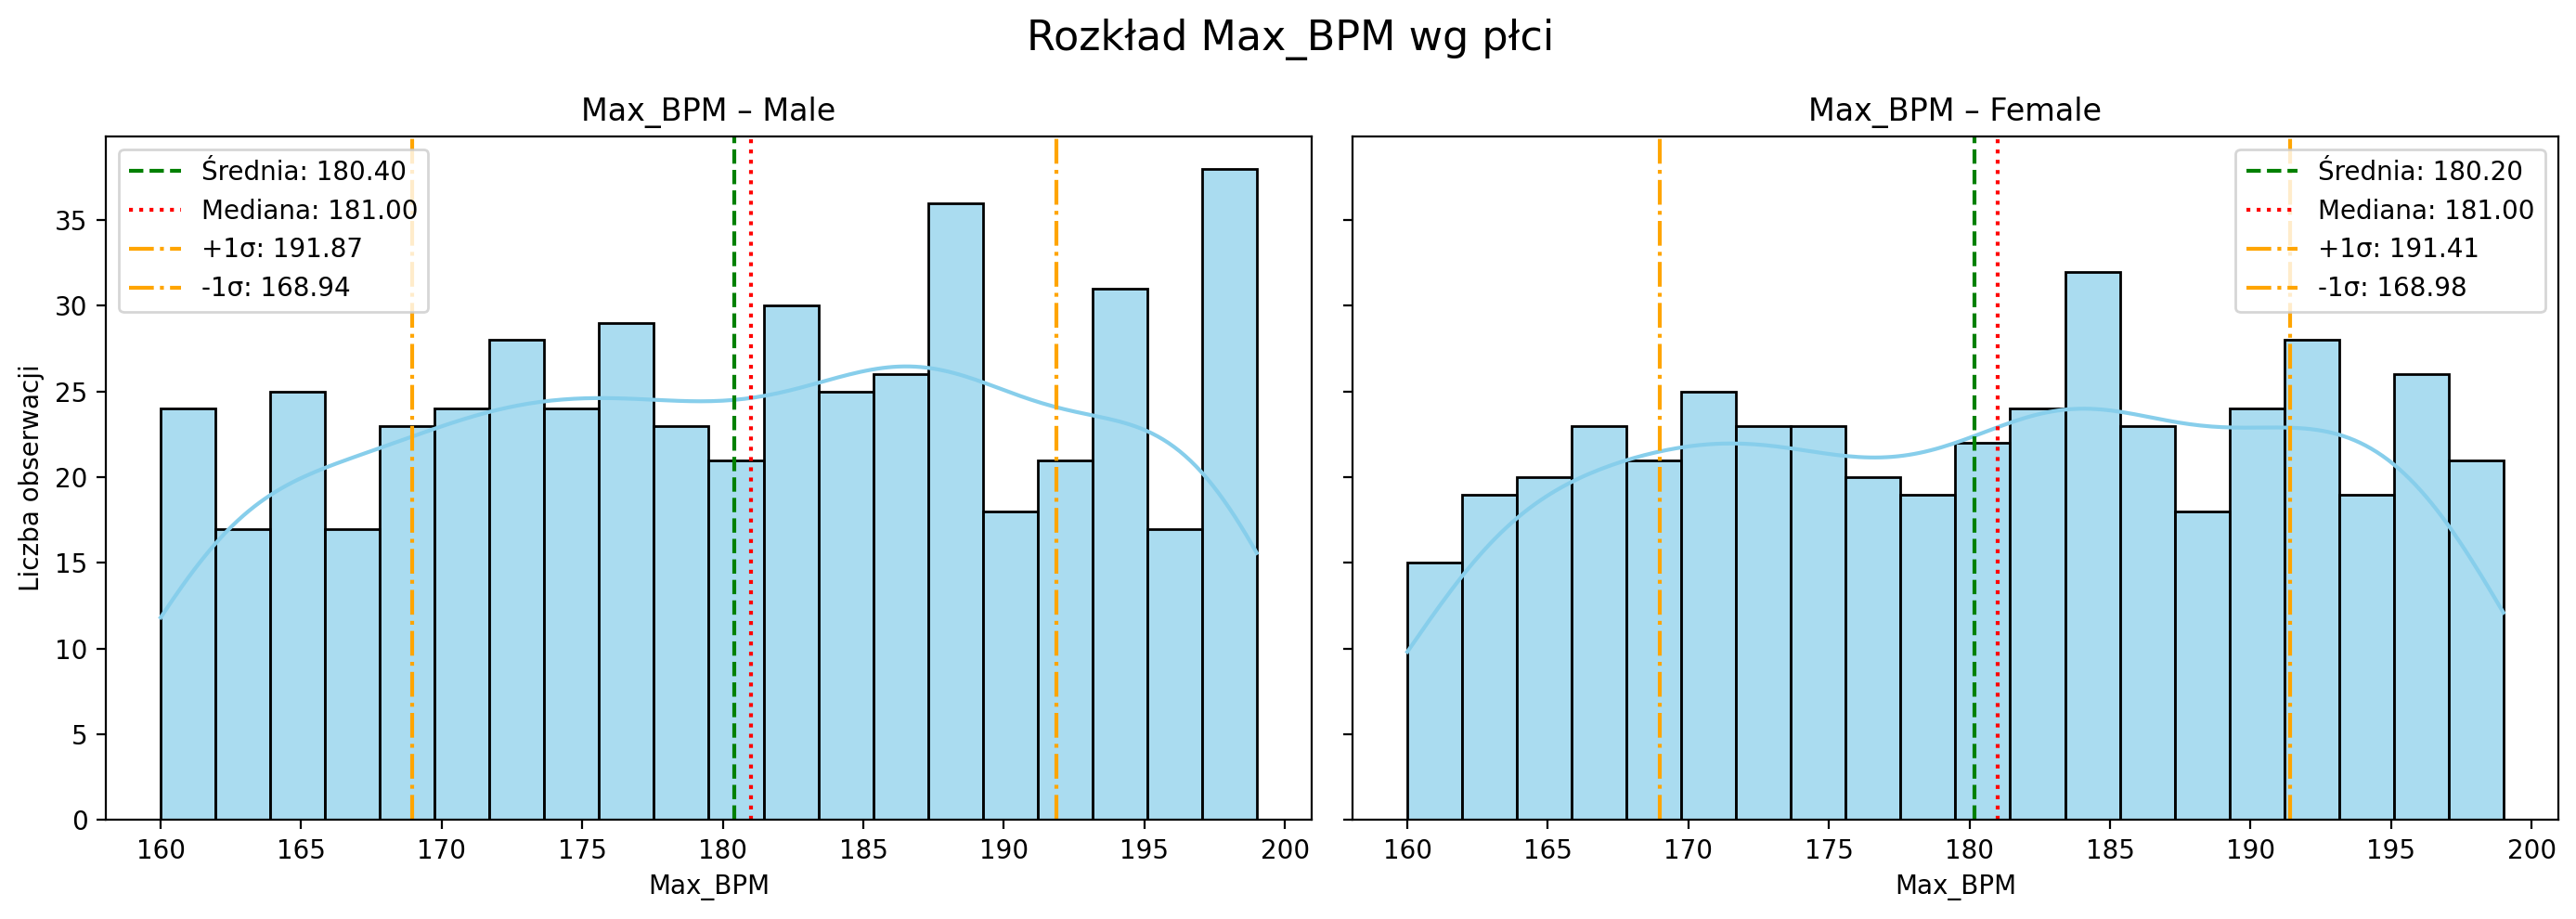

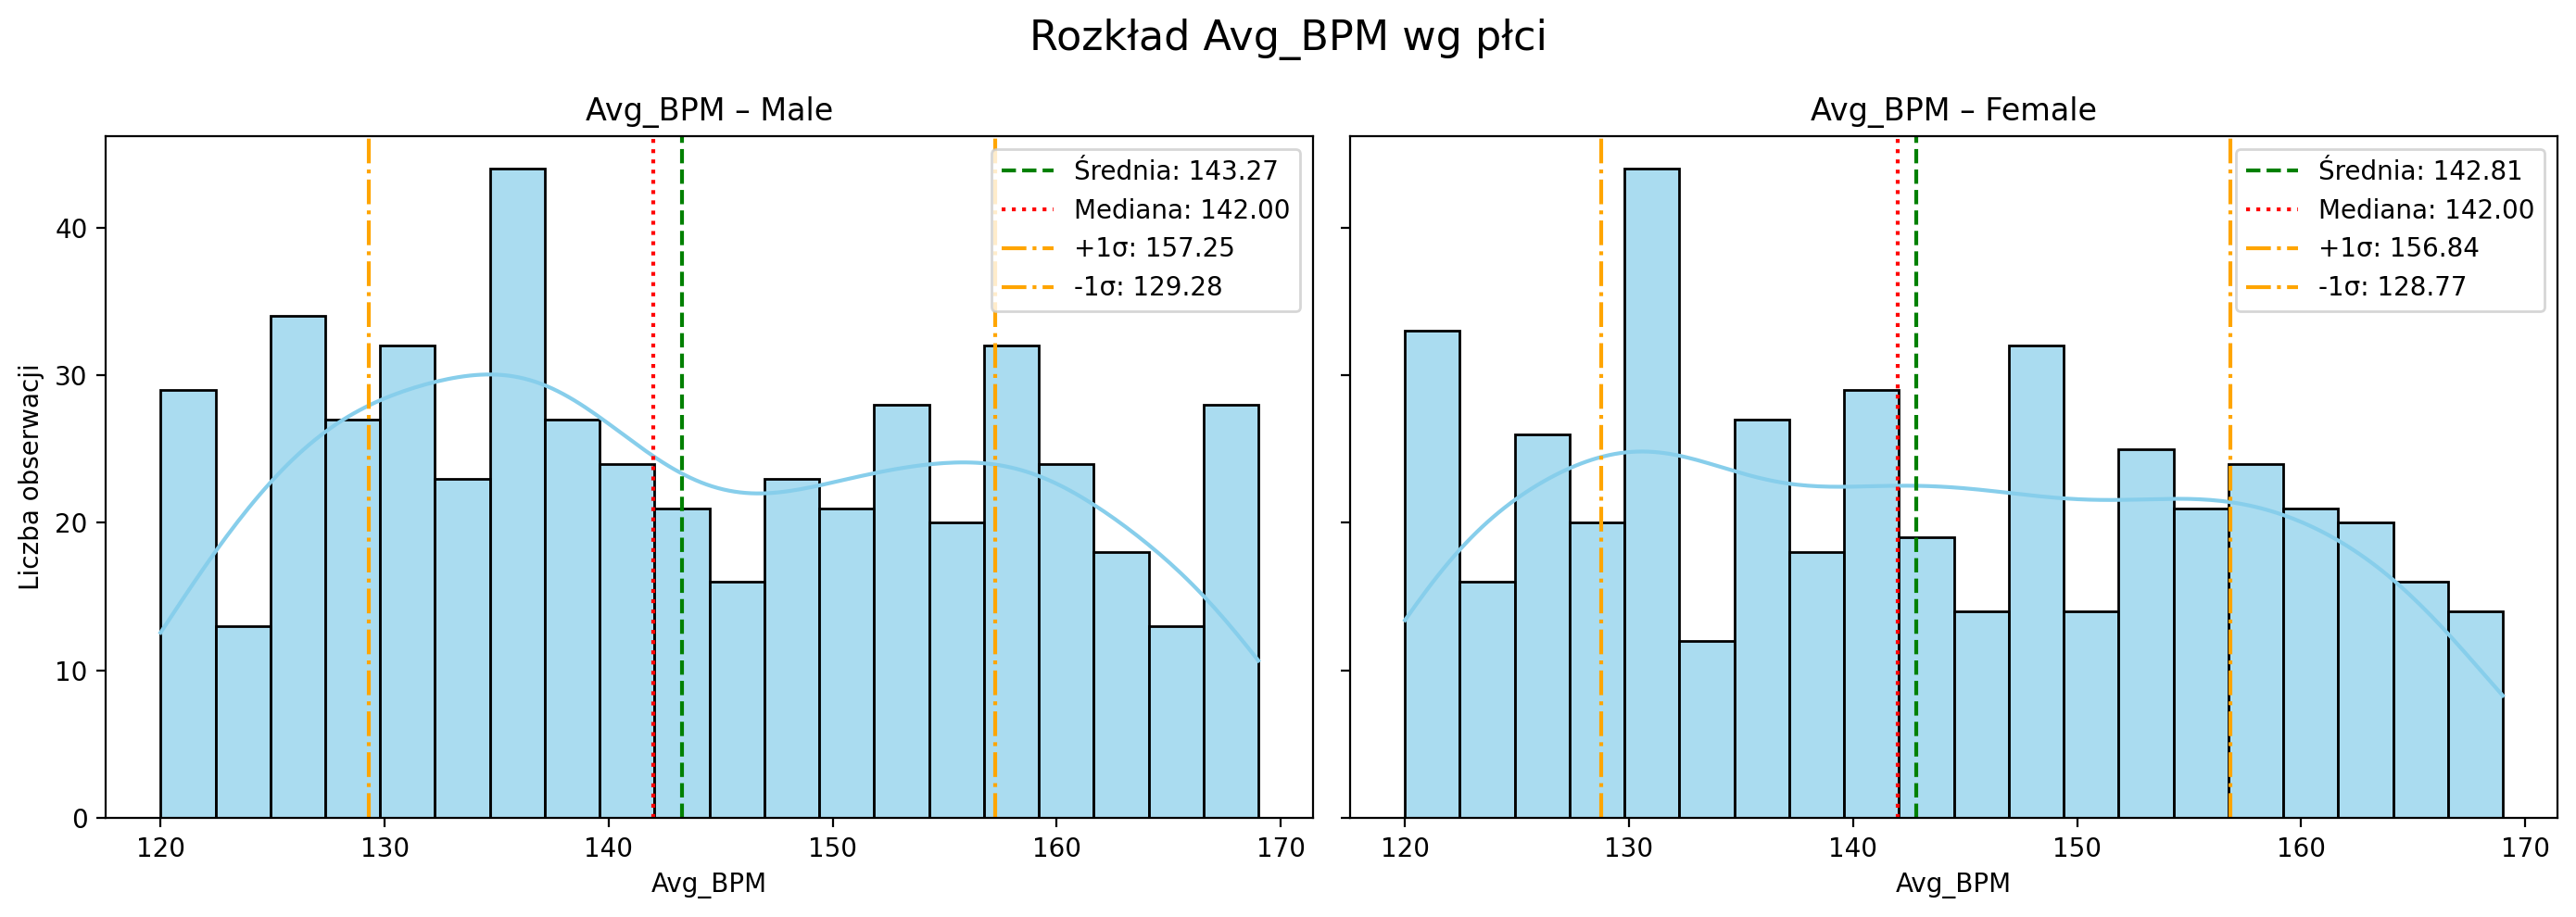

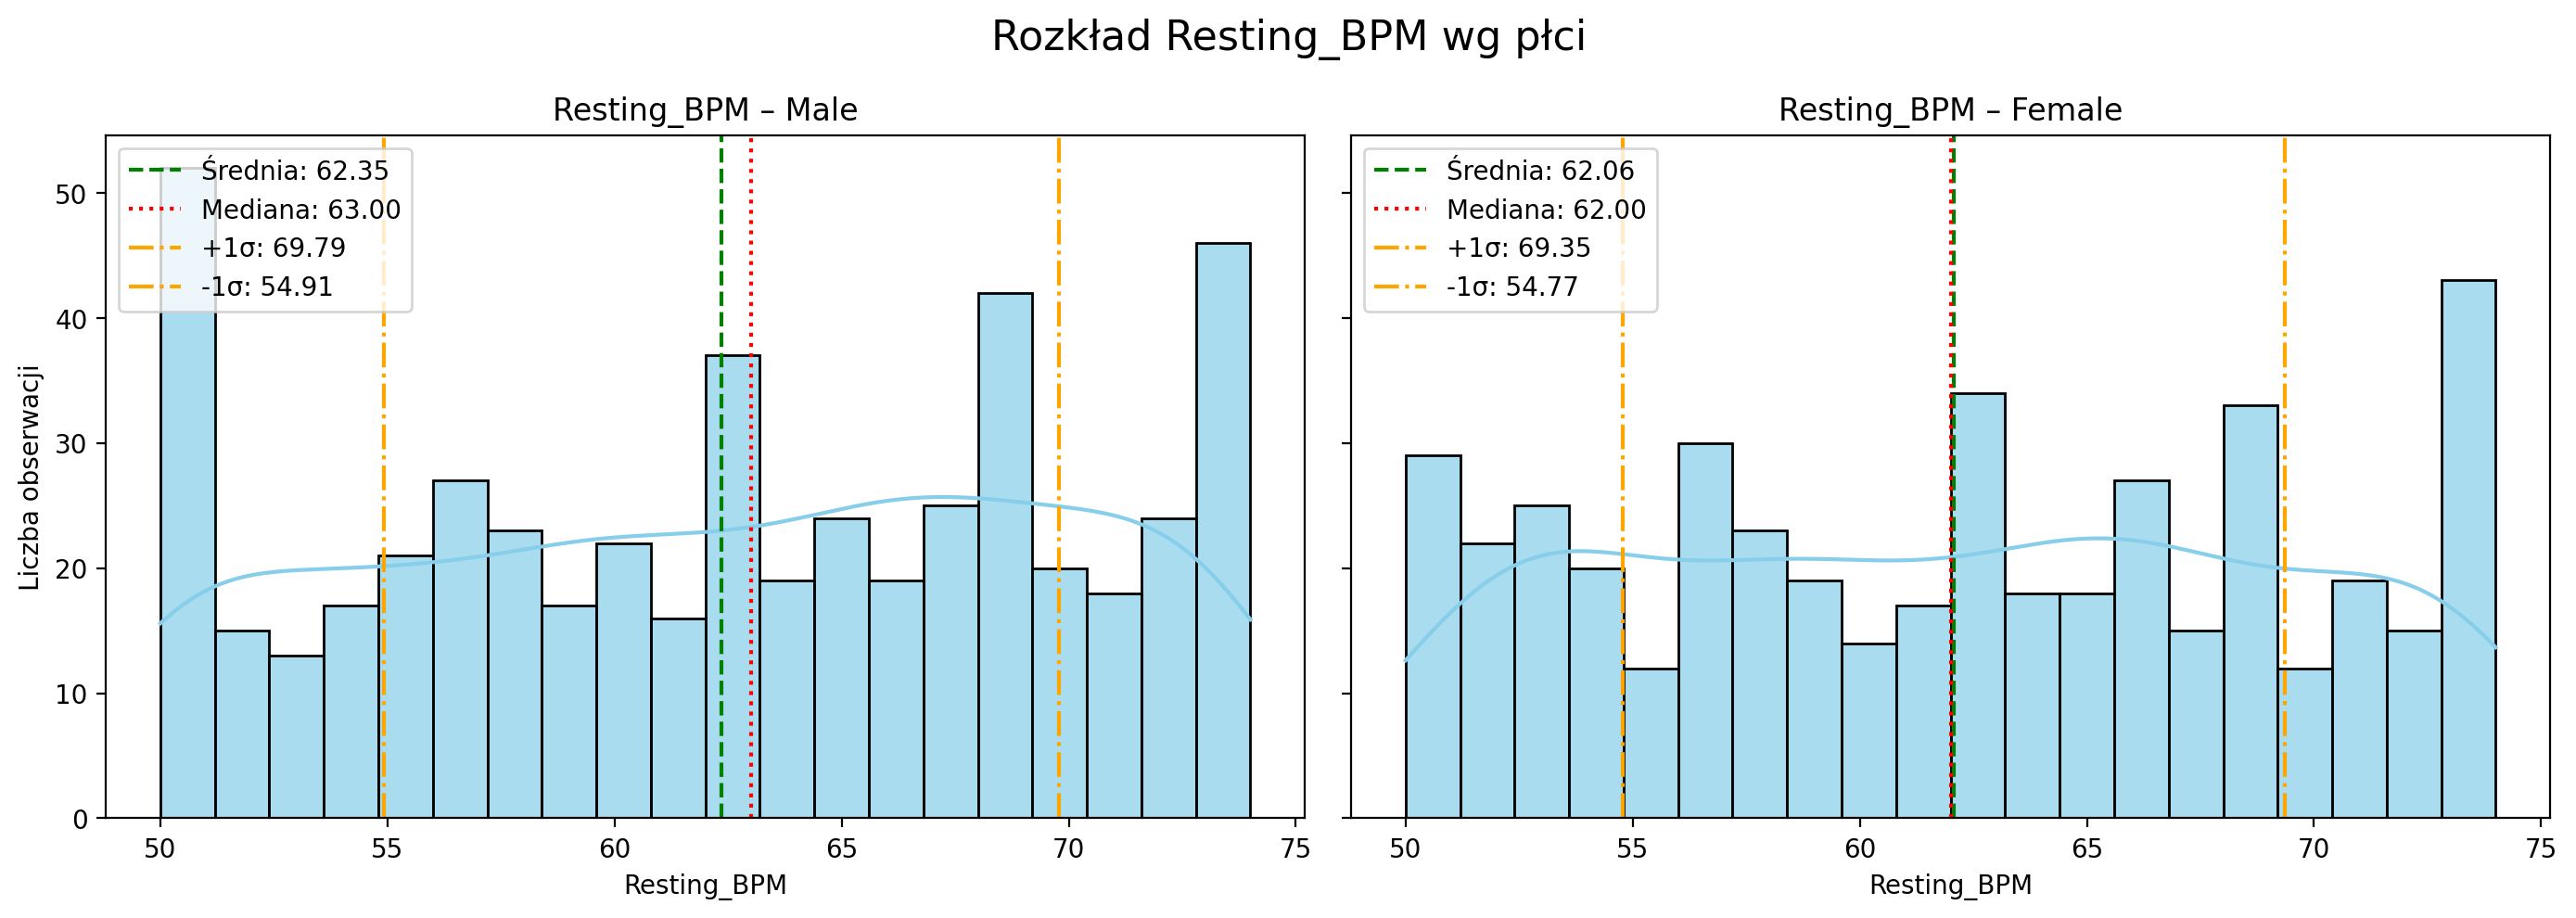

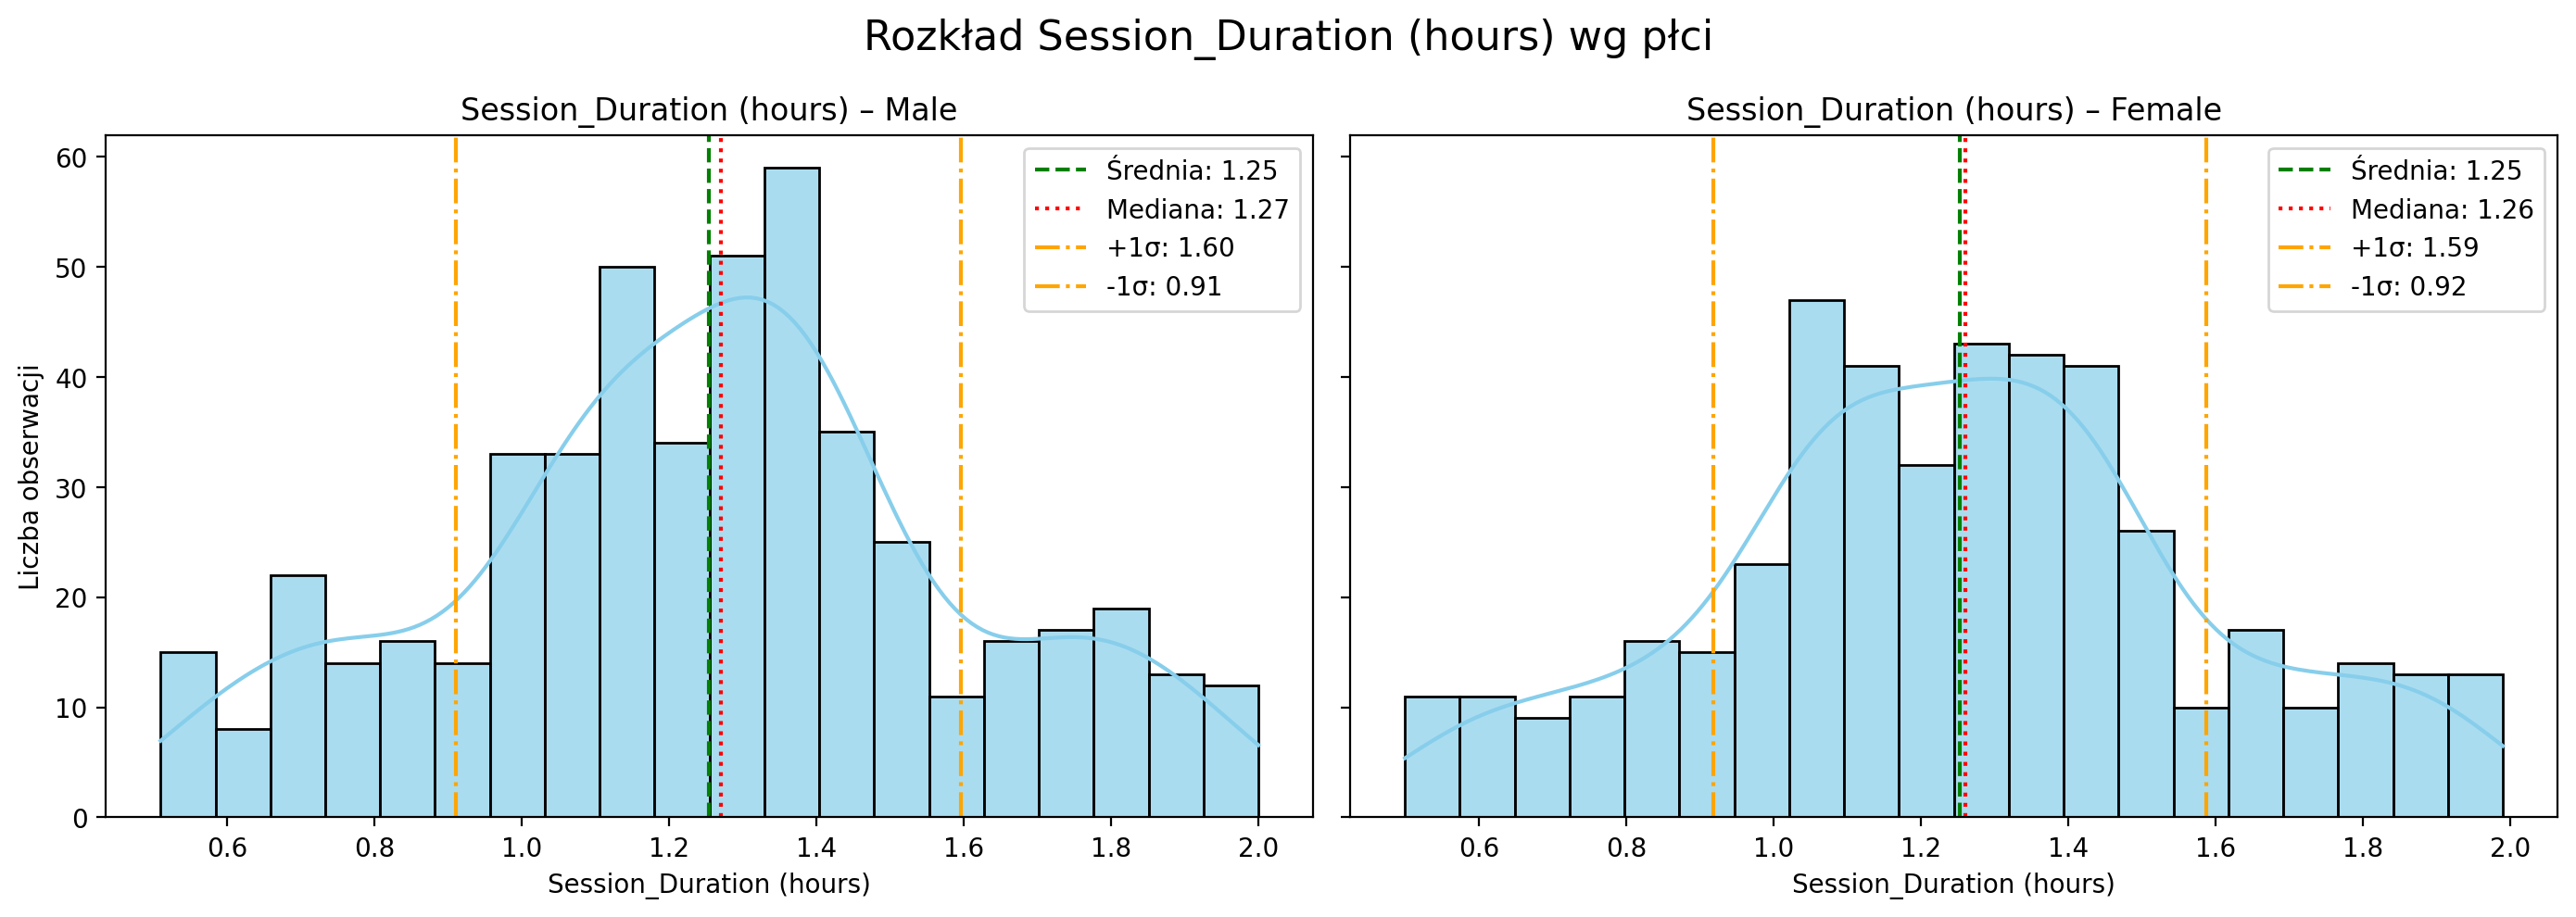

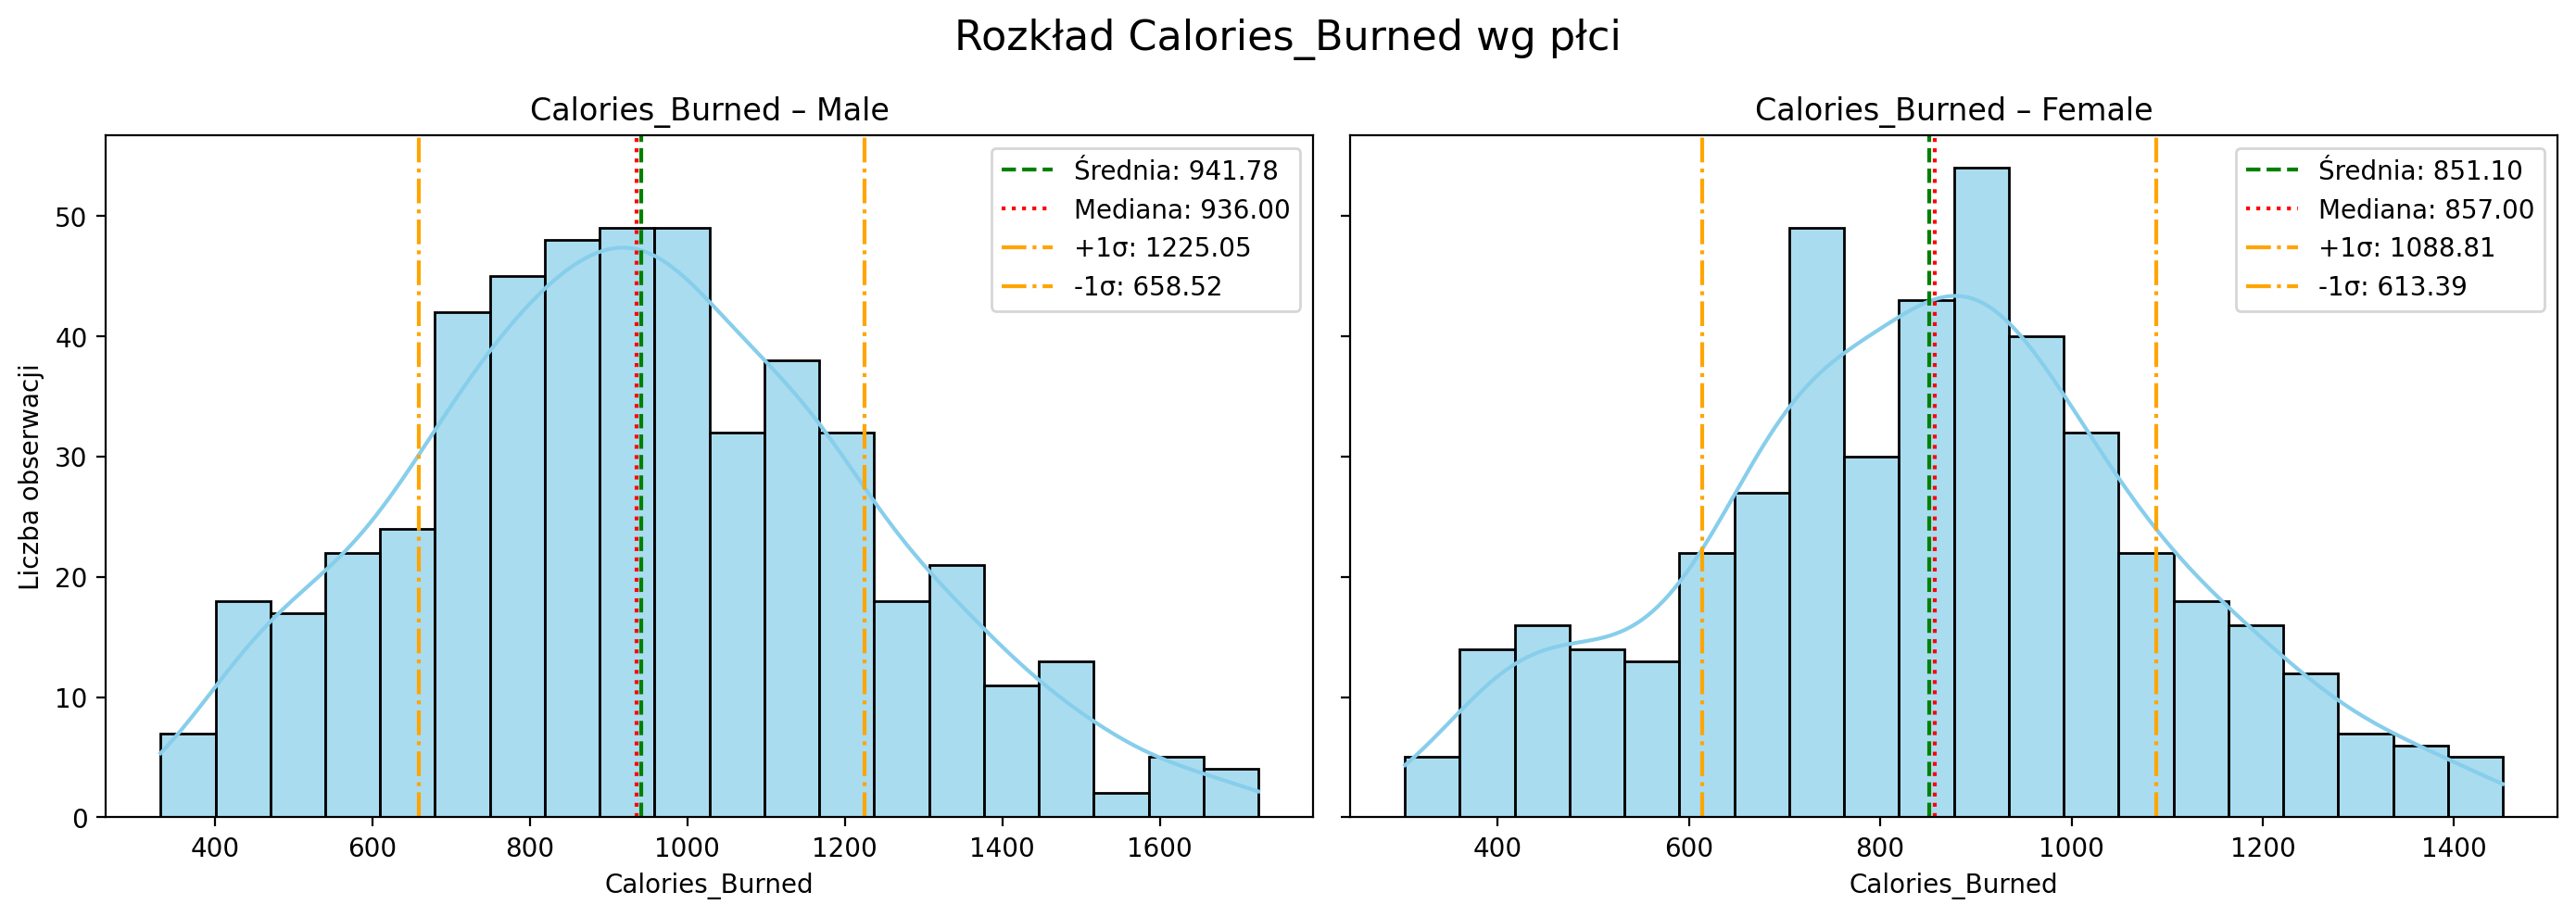

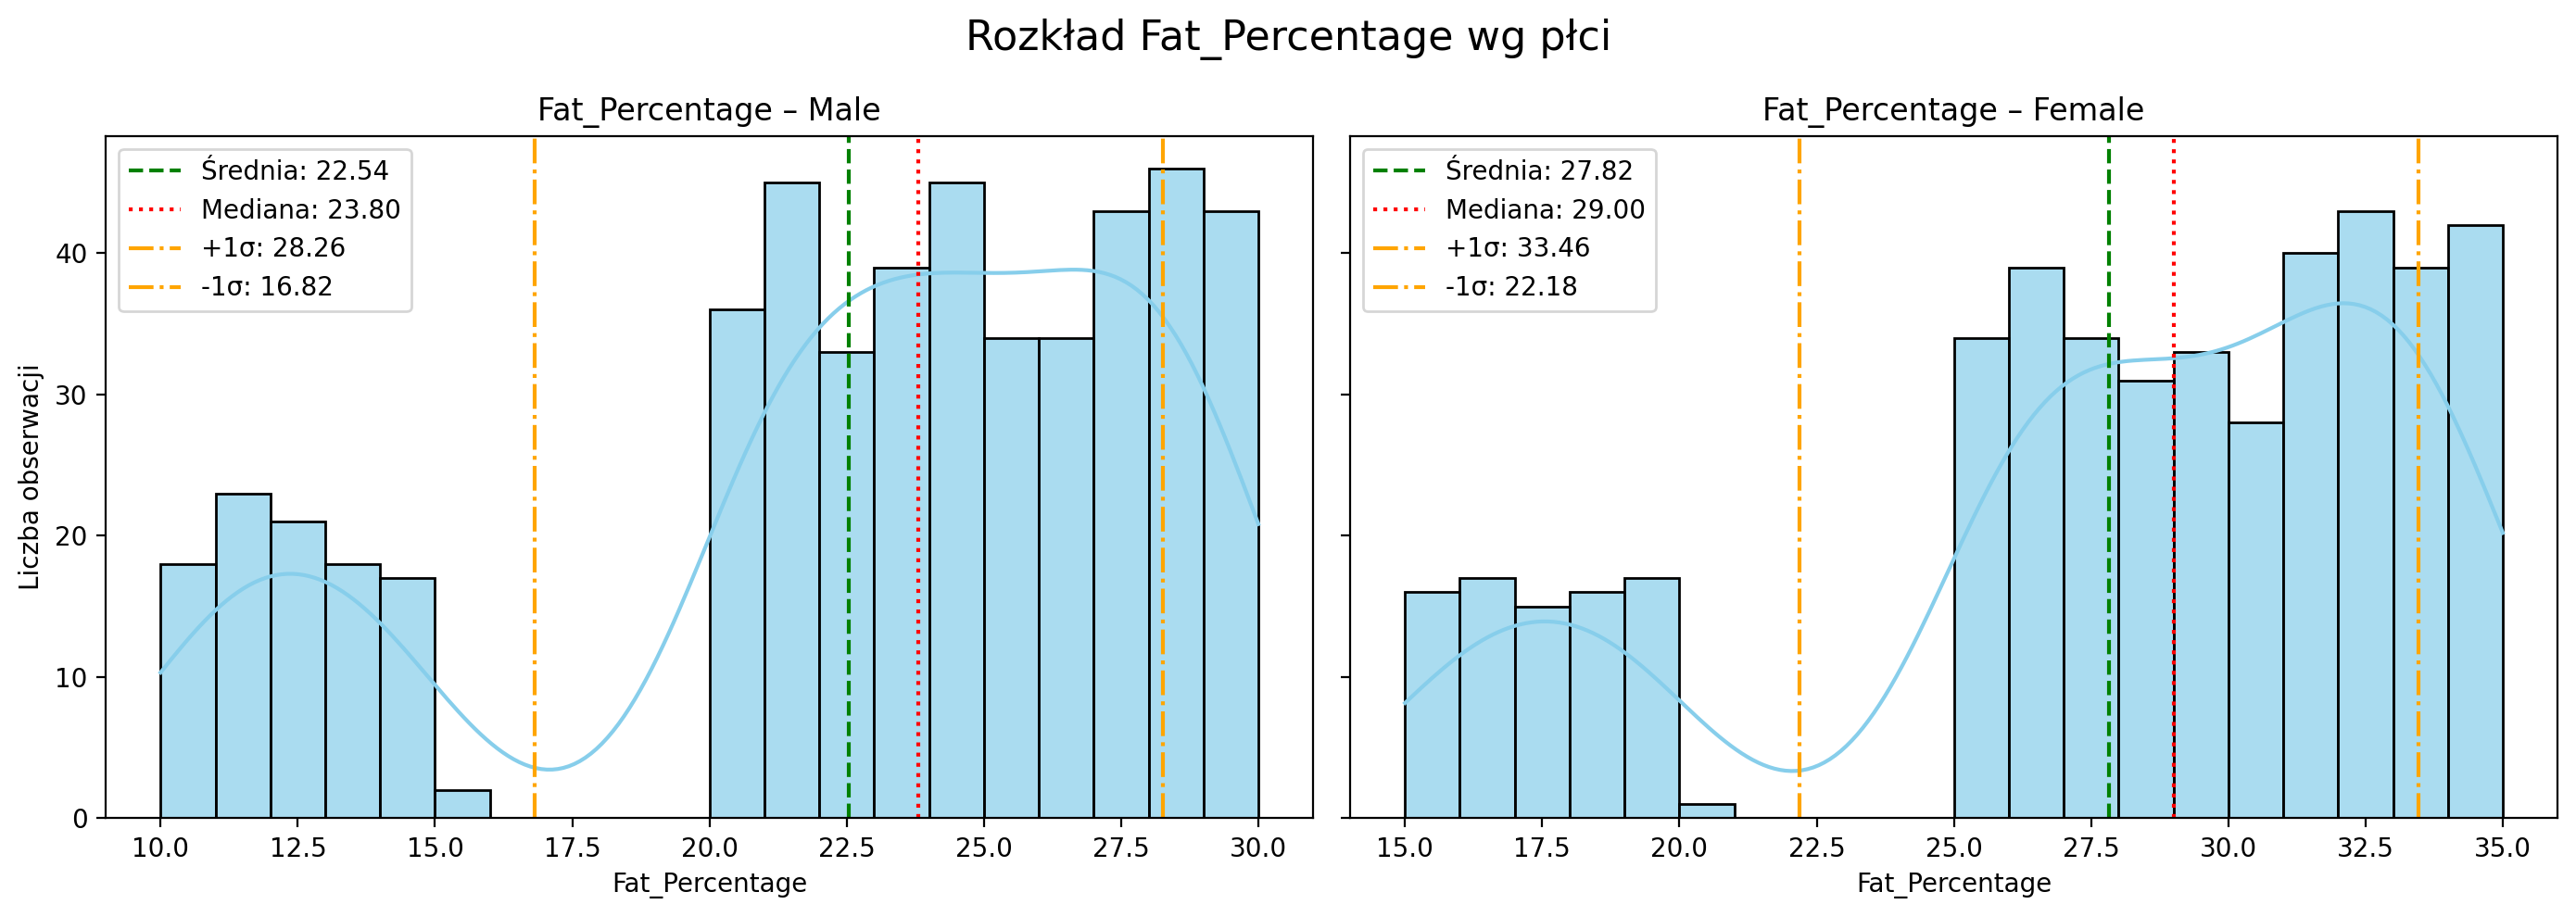

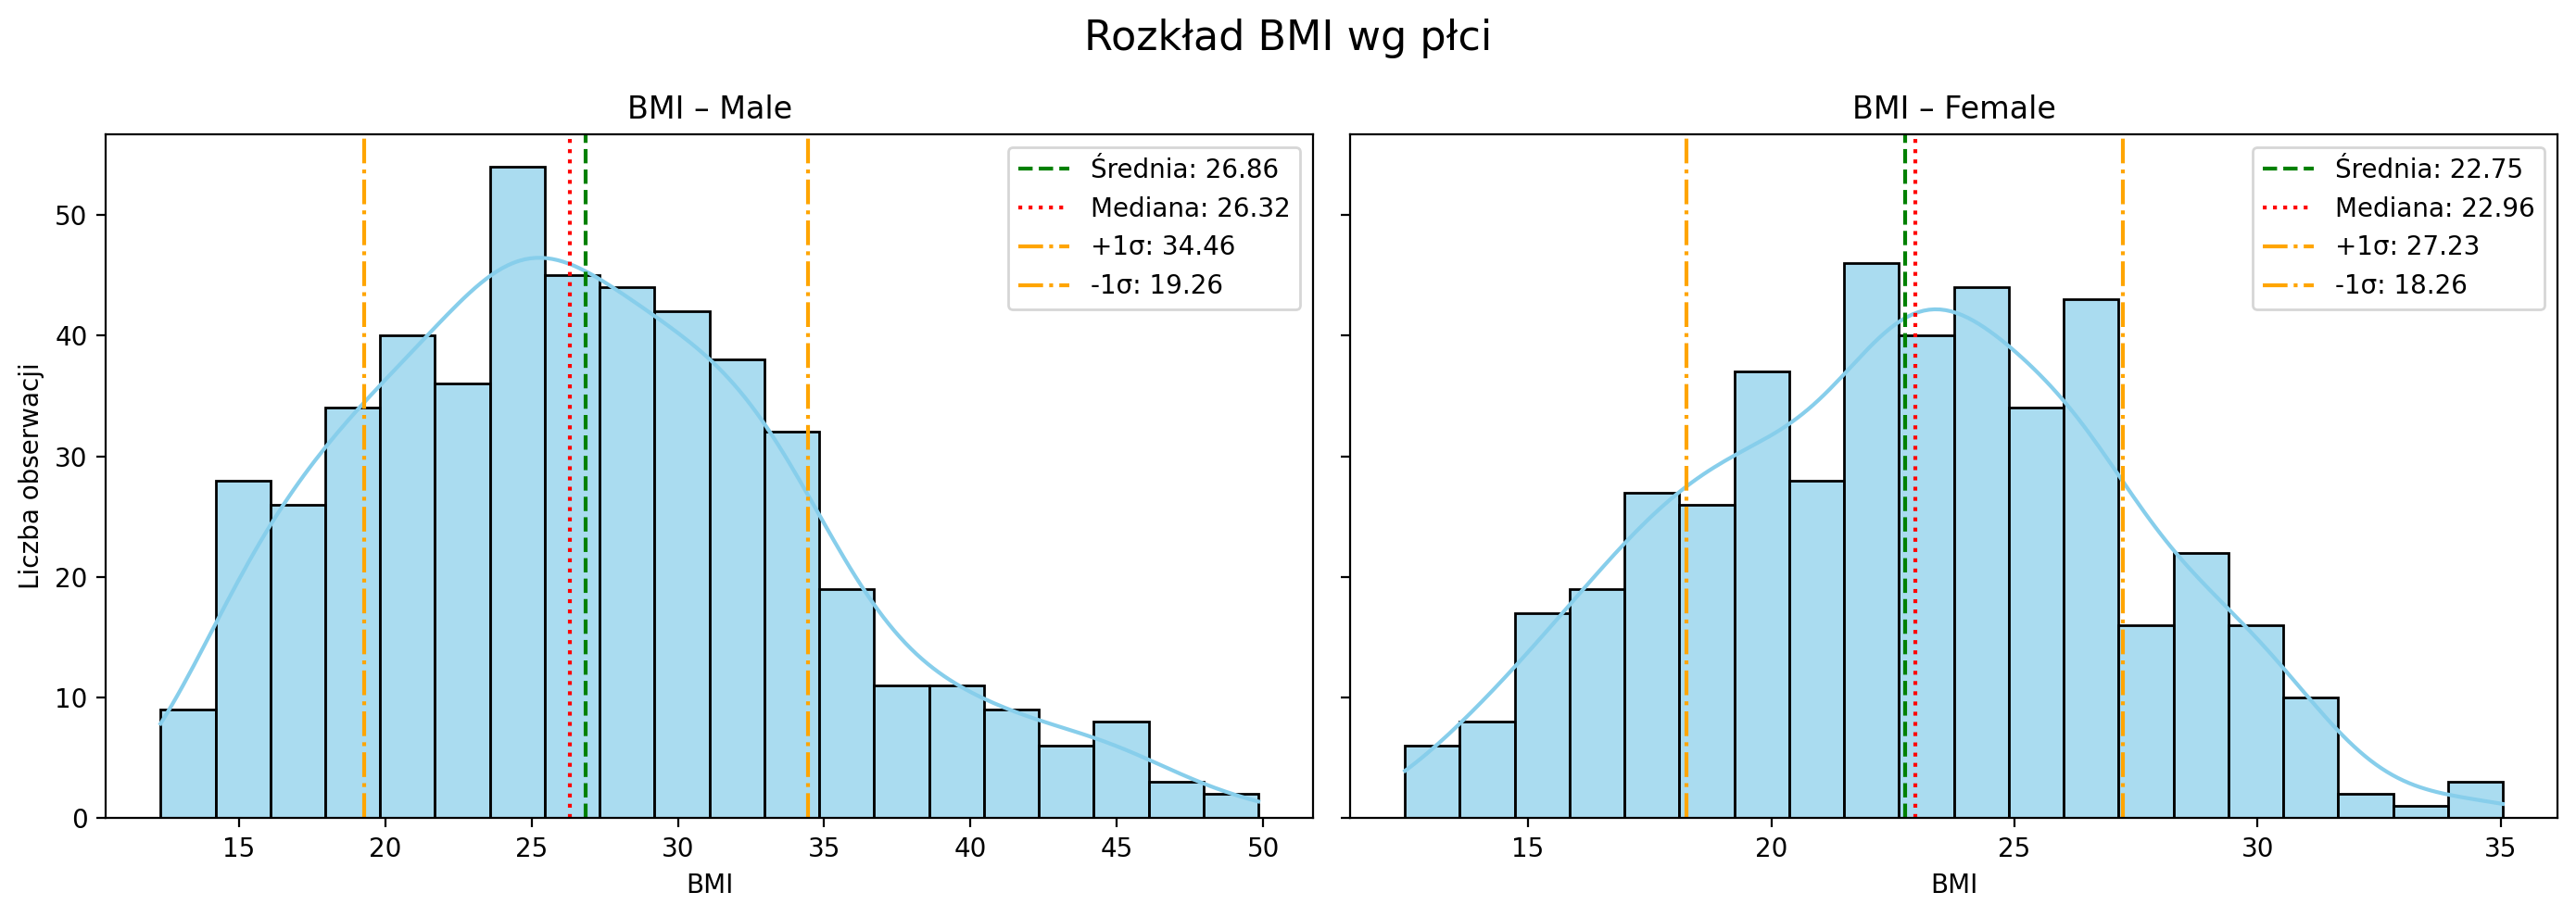

In [288]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Kolumny do pominięcia
excluded_columns = ['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level']

# Wybór kolumn numerycznych z pominięciem wybranych cech
df_out = clean_data.select_dtypes(include='number').drop(columns=excluded_columns, errors='ignore')

# Funkcja tworząca wykresy obok siebie dla jednej cechy
def plot_gender_distribution(data, column):
    genders = ['Male', 'Female']
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    for i, gender in enumerate(genders):
        subdata = data[data['Gender'] == gender][column].dropna()
        mean_val = subdata.mean()
        median_val = subdata.median()
        std_val = subdata.std()

        sns.histplot(subdata, kde=True, color='skyblue', bins=20, alpha=0.7, ax=axes[i])
        axes[i].axvline(mean_val, linestyle='dashed', color='green', label=f'Średnia: {mean_val:.2f}')
        axes[i].axvline(median_val, linestyle='dotted', color='red', label=f'Mediana: {median_val:.2f}')
        axes[i].axvline(mean_val + std_val, linestyle='dashdot', color='orange', label=f'+1σ: {(mean_val + std_val):.2f}')
        axes[i].axvline(mean_val - std_val, linestyle='dashdot', color='orange', label=f'-1σ: {(mean_val - std_val):.2f}')
        axes[i].set_title(f"{column} – {gender}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Liczba obserwacji")
        axes[i].legend()

    plt.suptitle(f"Rozkład {column} wg płci", fontsize=16)
    plt.tight_layout()
    plt.show()

# Pętla generująca wykresy dla każdej wybranej kolumny numerycznej
for col in df_out.columns:
    plot_gender_distribution(clean_data, col)


In [289]:
# import plotly.express as px

included_columns = ['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'Fat_Percentage']

for col in included_columns:
    if col in clean_data.columns:
        fig = px.histogram(
            clean_data,
            x=col,
            color='Gender',  # rozdzielnie dla Male i Female
            barmode='overlay',  # słupki nakładają się
            nbins=20,
            title=f"Histogram rozkładu {col} wg płci",
        )
        fig.update_layout(bargap=0.2)
        fig.show()

**Podsumowanie**

In [290]:

# policz statystyki
stats = (
    clean_data
    .select_dtypes(include=['number'])
    .groupby(clean_data['Gender'])
    .agg(['mean', 'median', 'std'])
    .round(2)
    .transpose()
)

# uproszczenie indeksu
stats.index = stats.index.map(lambda x: f"{x[0]}_{x[1]}")

# różnice
diffs = (stats['Male'] - stats['Female']).abs().round(2)

# nazwy zmiennych, gdzie wybrana różnica >= wybrana wartość
variables_selected = {i.split('_')[0] for i, v in diffs.items() if v >= 5}

# wstawiamy różnice jako nową kolumnę
stats['Diff'] = diffs

# filtrujemy wszystko dla tych zmiennych
stats_filtered = stats.loc[
    stats.index.map(lambda x: x.split('_')[0]).isin(variables_selected)
]

stats_filtered


Gender                  Female    Male   Diff
Weight (kg)_mean         61.00   85.56  24.56
Weight (kg)_median       61.50   85.40  23.90
Weight (kg)_std          10.32   21.83  11.51
Calories_Burned_mean    851.10  941.78  90.68
Calories_Burned_median  857.00  936.00  79.00
Calories_Burned_std     237.71  283.26  45.55
Fat_Percentage_mean      27.82   22.54   5.28
Fat_Percentage_median    29.00   23.80   5.20
Fat_Percentage_std        5.64    5.72   0.08

### 5.2 Korelacje według płci

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')


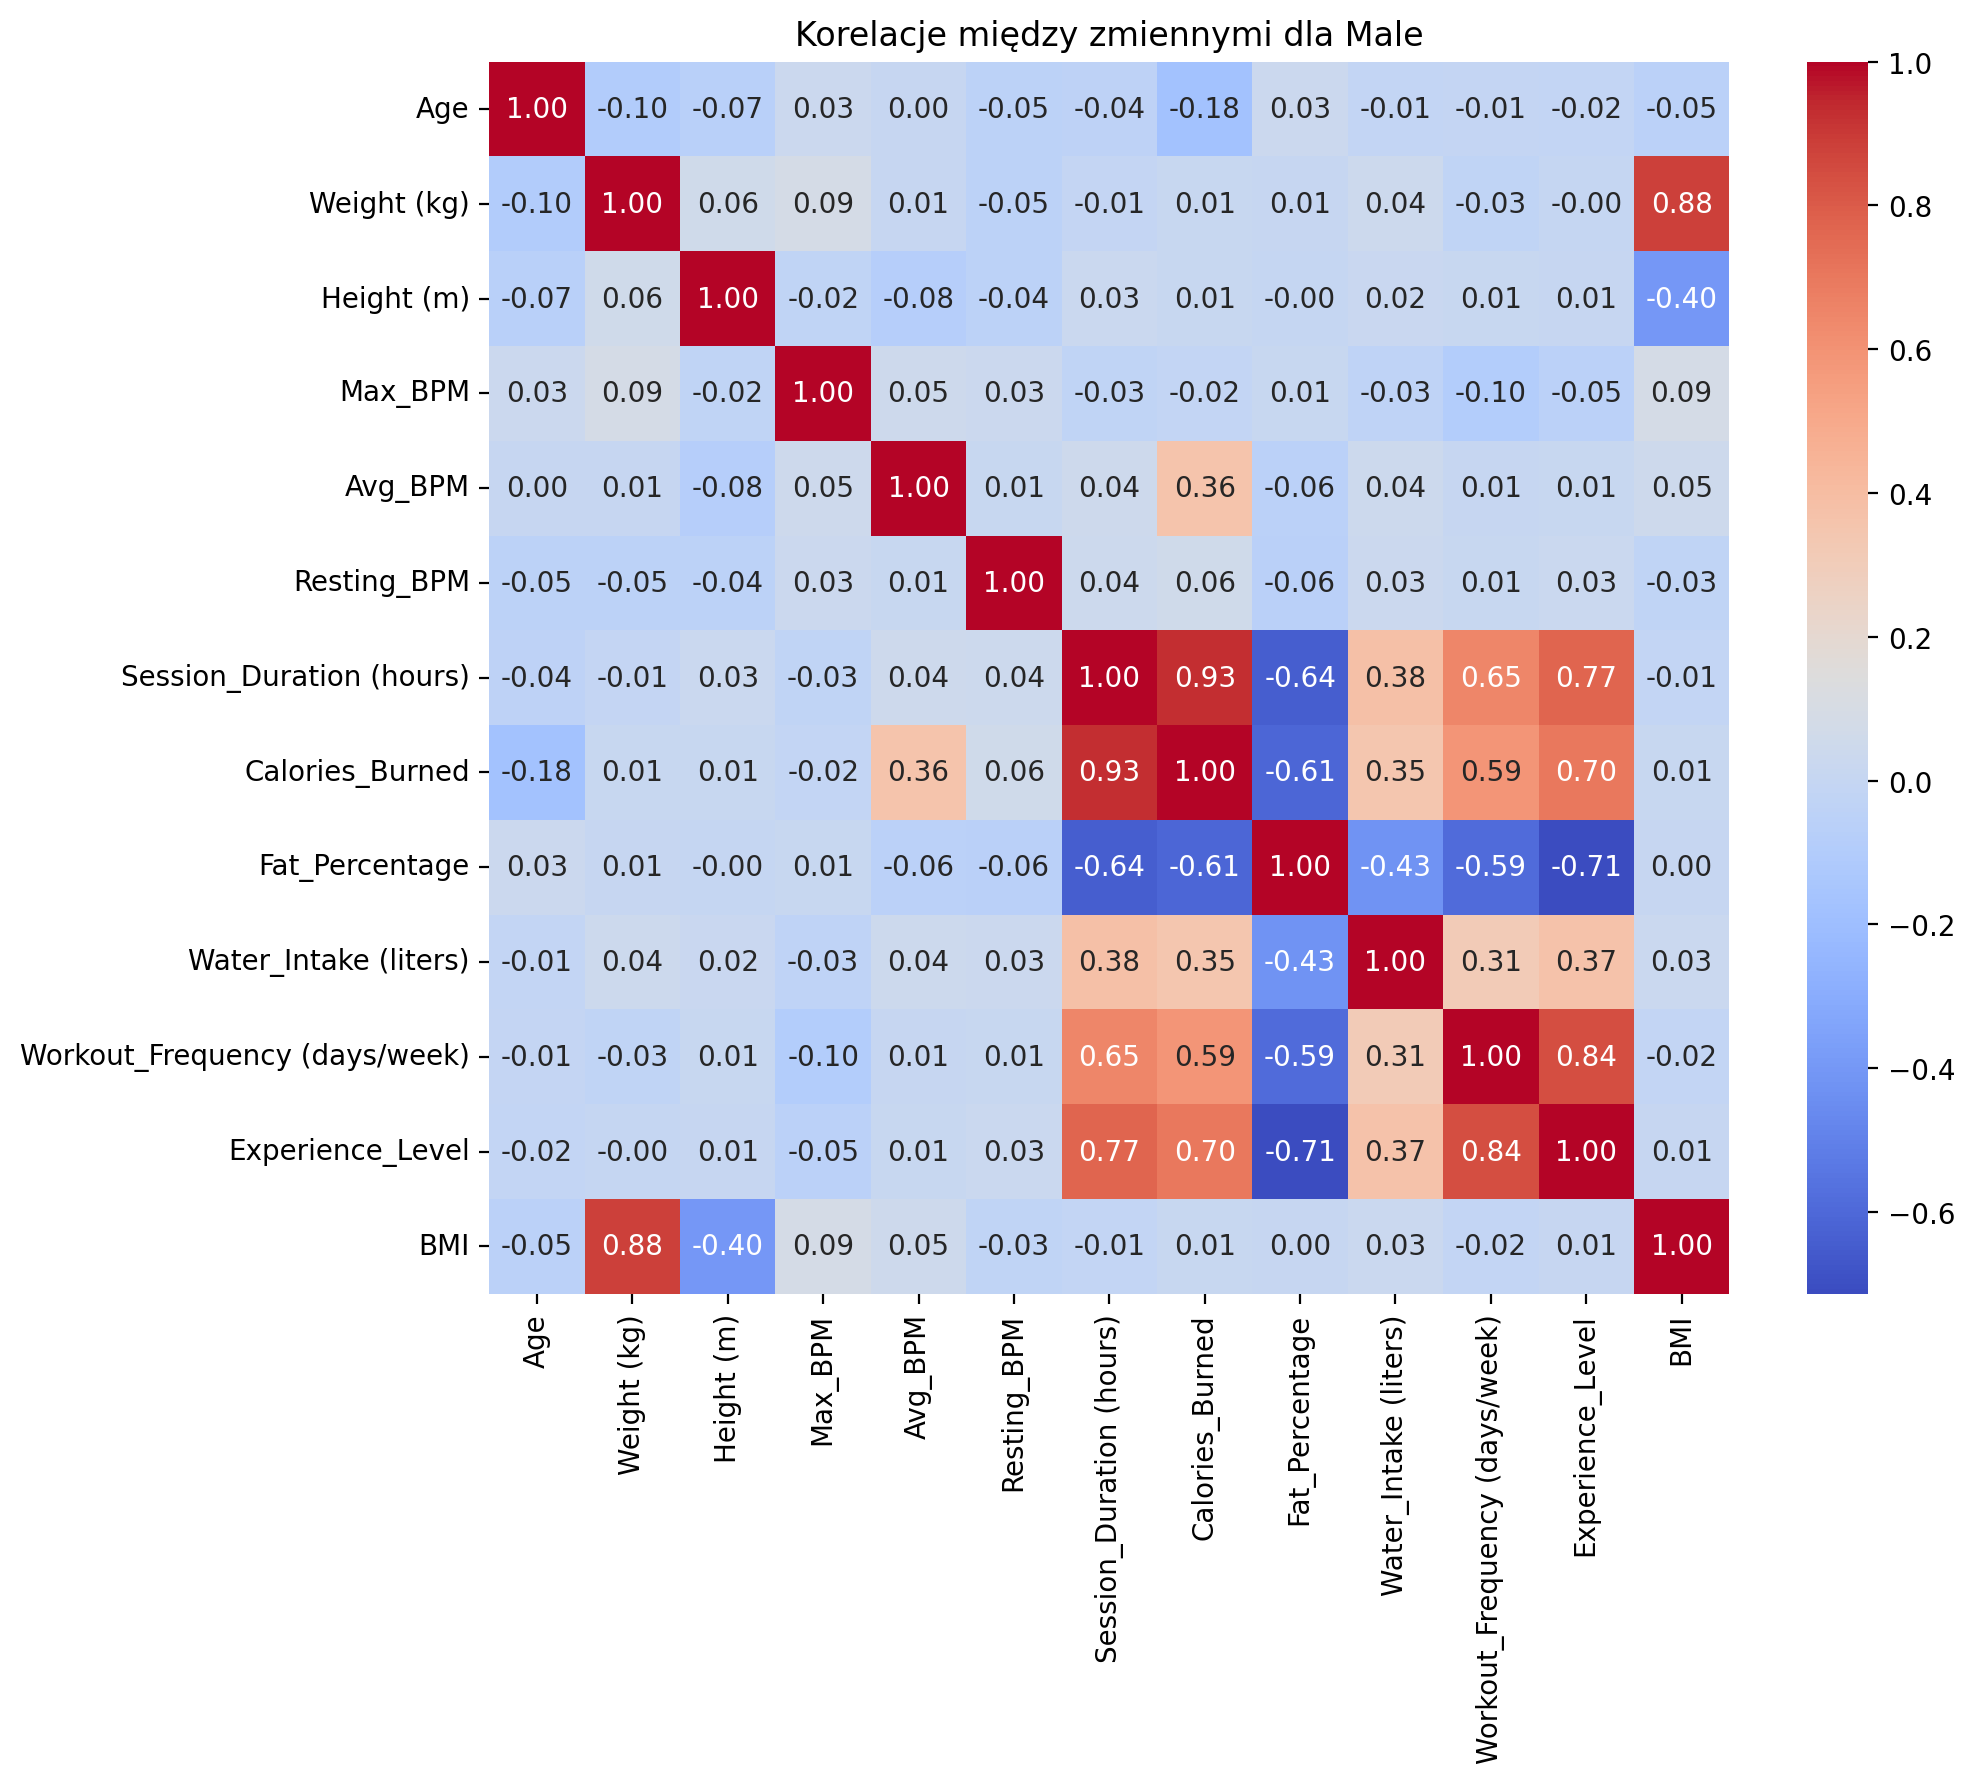

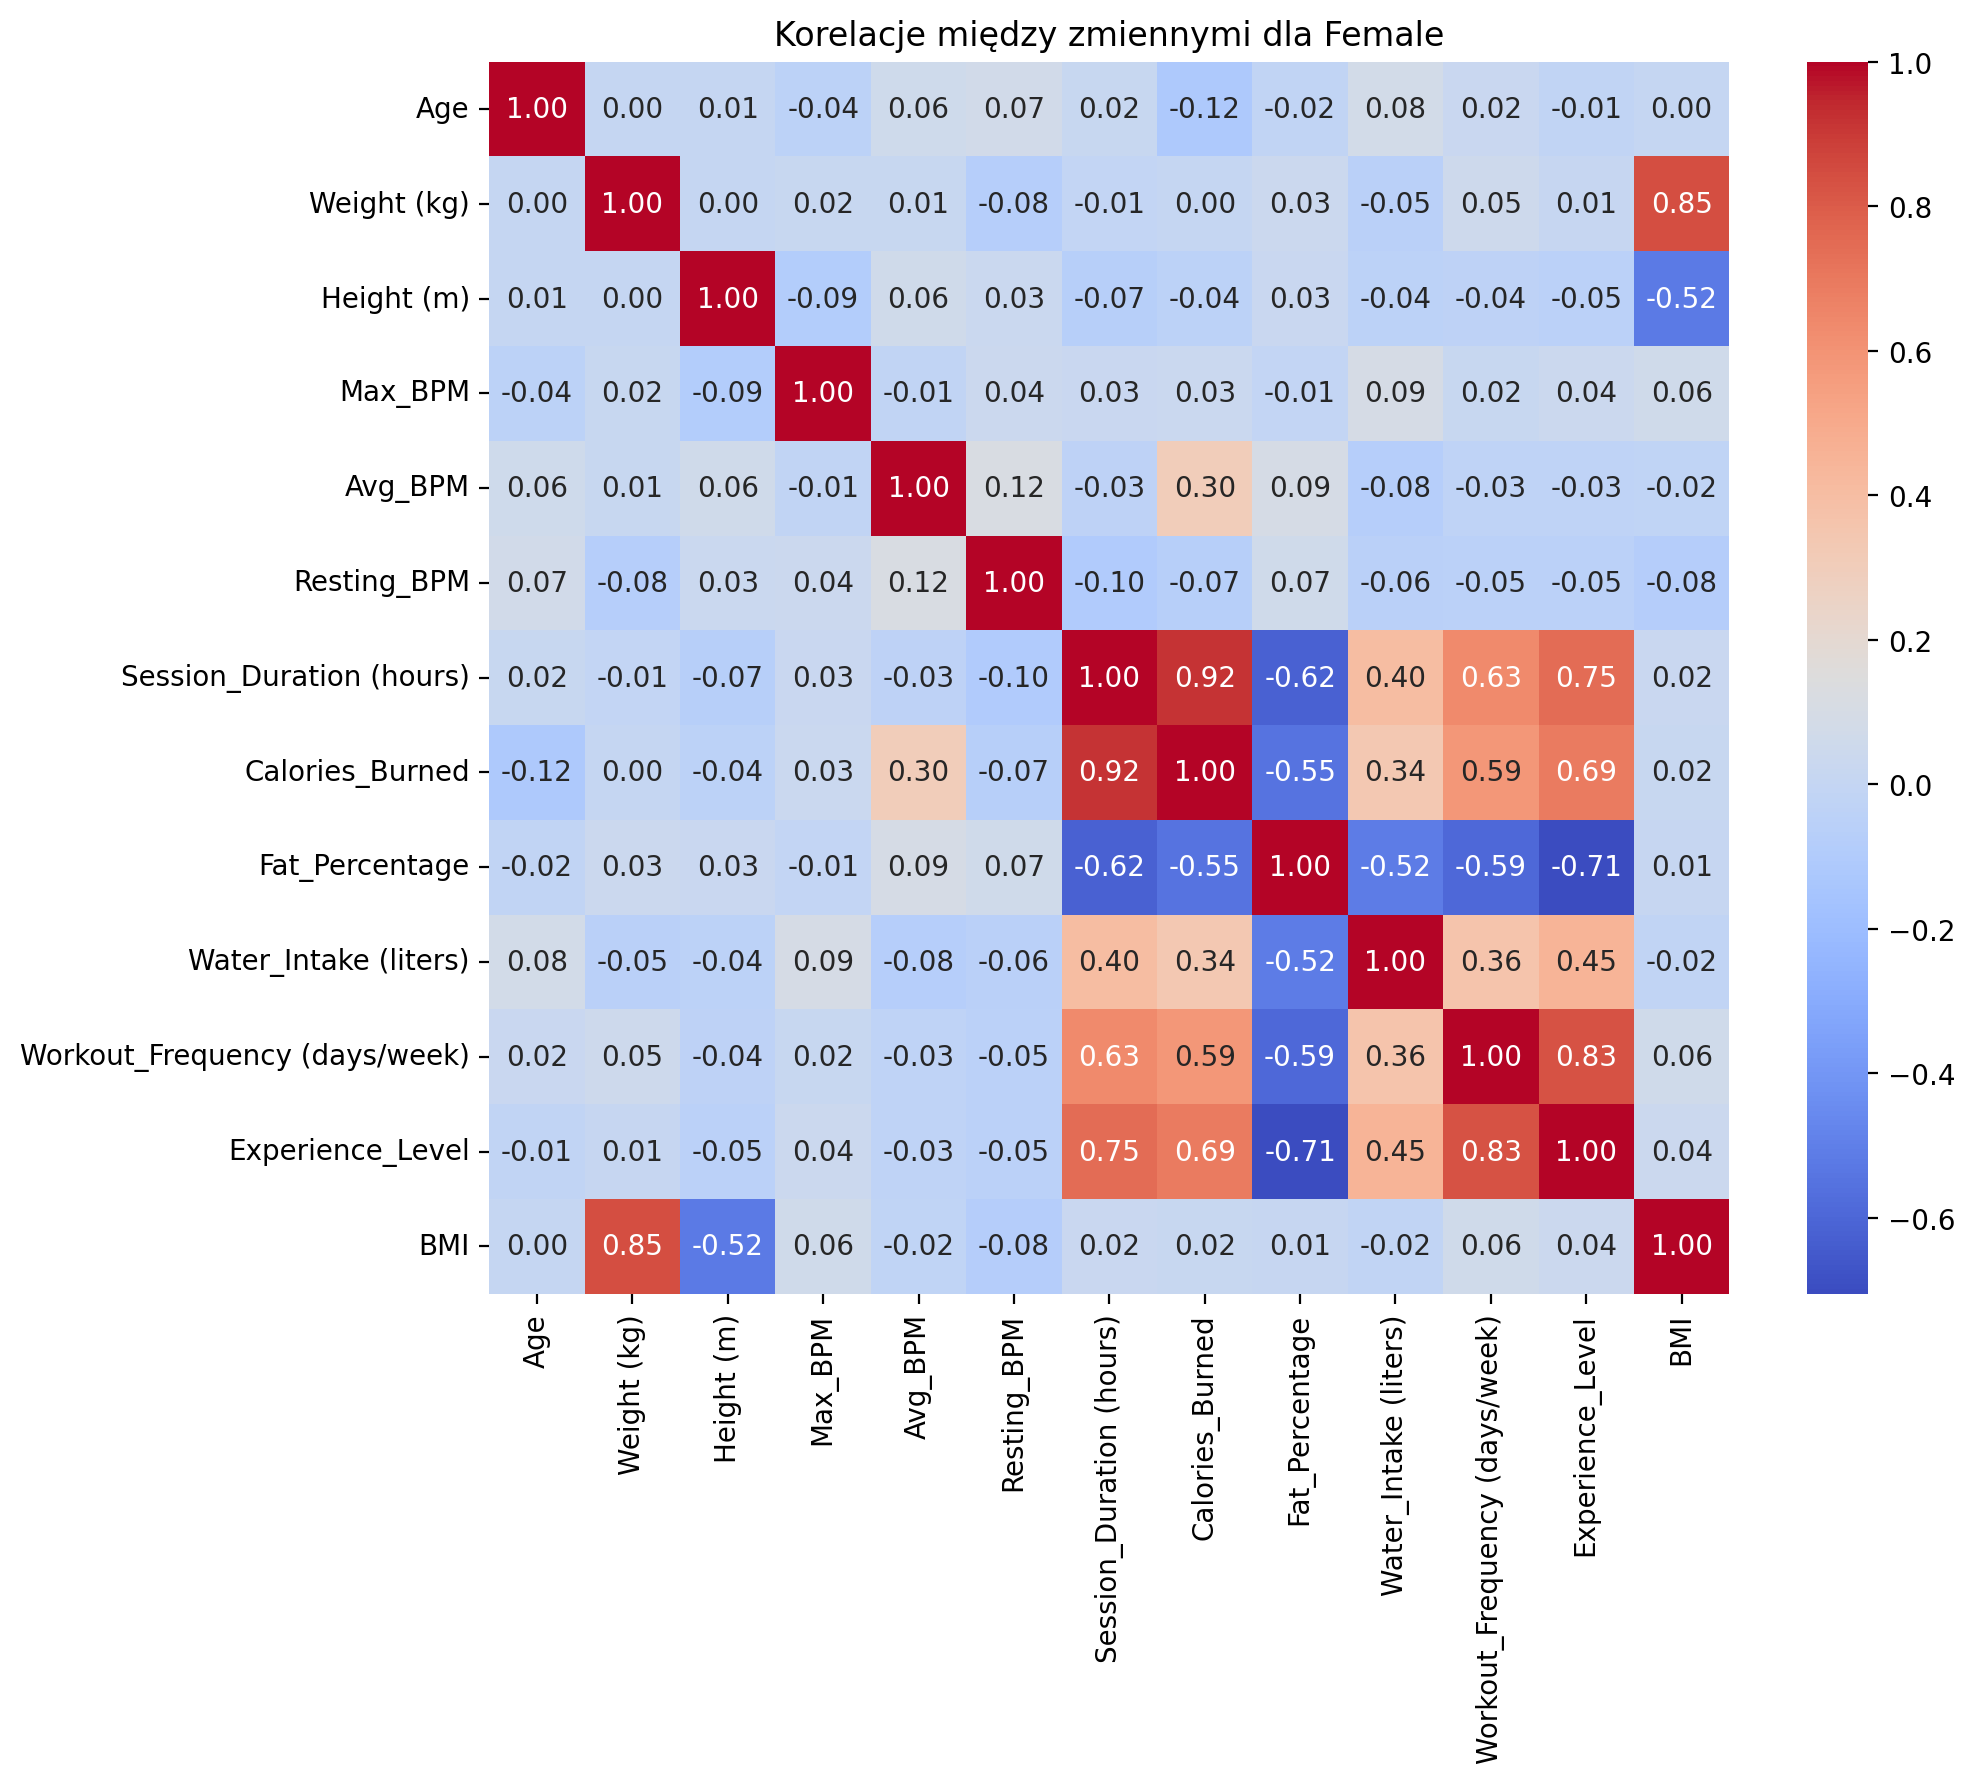

In [291]:


numeric_cols = dirty_df.select_dtypes(include="number").columns
print(numeric_cols)

corr_male = dirty_df[dirty_df['Gender'] == 'Male'][numeric_cols].corr()
corr_female = dirty_df[dirty_df['Gender'] == 'Female'][numeric_cols].corr()

import matplotlib.pyplot as plt
import seaborn as sns

# wykres dla Male
plt.figure(figsize=(10, 8))
sns.heatmap(corr_male, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacje między zmiennymi dla Male")
plt.show()

# wykres dla Female
plt.figure(figsize=(10, 8))
sns.heatmap(corr_female, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacje między zmiennymi dla Female")
plt.show()



# 6. Analiza opisowa

### 6.1 Zależność między płcią a rodzajem aktywności

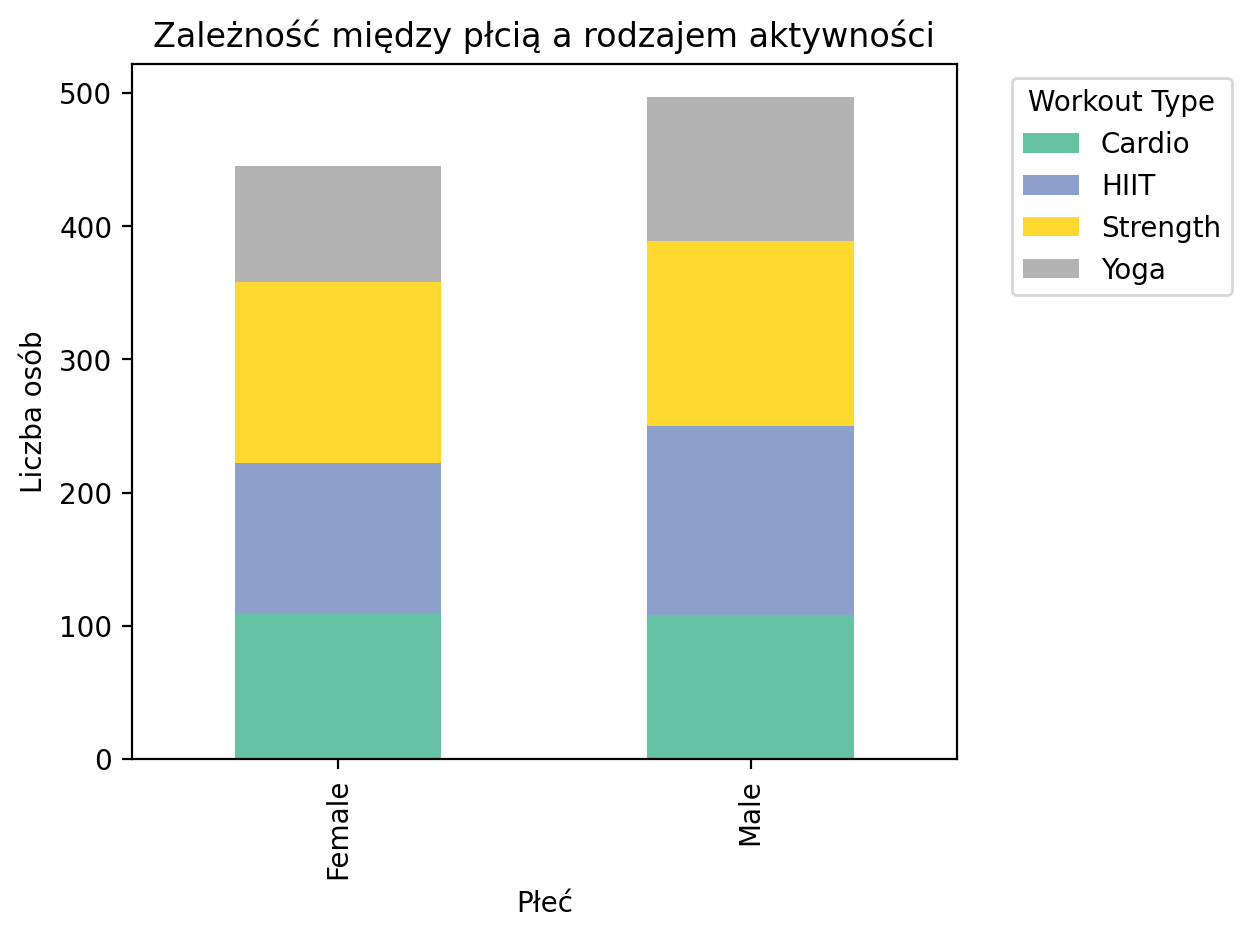

Aktywność Proporcja kobiet Proporcja mężczyzn Różnica proporcji Błąd standardowy          95% CI Istotna różnica
     Yoga            0.196              0.217            -0.022            0.026 (-0.073, 0.030)             NIE
 Strength            0.306              0.280             0.026            0.030 (-0.032, 0.084)             NIE
   Cardio            0.245              0.217             0.028            0.028 (-0.026, 0.082)             NIE
     HIIT            0.254              0.286            -0.032            0.029 (-0.088, 0.025)             NIE


In [292]:
import matplotlib.pyplot as plt
from scipy.stats import norm
df = clean_data.copy()

# Tabela zależności
ct = pd.crosstab(clean_data['Gender'], clean_data['Workout_Type'])

# Wykres skumulowany
ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Zależność między płcią a rodzajem aktywności')
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Porównanie udziału kobiet i mężczyzn wg rodzaju aktywności fizycznej
activities = df['Workout_Type'].dropna().unique()

# Liczba kobiet i mężczyzn, wyniki
n_female = df[df['Gender'] == 'Female'].shape[0]
n_male = df[df['Gender'] == 'Male'].shape[0]
results = []

for activity in activities:
    # Liczba kobiet i mężczyzn wybierających daną aktywność
    y_female = df[(df['Gender'] == 'Female') & (df['Workout_Type'] == activity)].shape[0]
    y_male = df[(df['Gender'] == 'Male') & (df['Workout_Type'] == activity)].shape[0]

    # Proporcje
    p_female = y_female / n_female
    p_male = y_male / n_male
    diff = p_female - p_male

    # Błąd standardowy różnicy proporcji
    se_diff = np.sqrt(p_female*(1-p_female)/n_female + p_male*(1-p_male)/n_male)

    # 95% CI dla różnicy proporcji (Wald, Z=1.96)
    z = norm.ppf(0.975)
    ci_low = diff - z * se_diff
    ci_upp = diff + z * se_diff

    istotna = "TAK" if (ci_low > 0 or ci_upp < 0) else "NIE"

    results.append({
        'Aktywność': activity,
        'Proporcja kobiet': f"{p_female:.3f}",
        'Proporcja mężczyzn': f"{p_male:.3f}",
        'Różnica proporcji': f"{diff:.3f}",
        'Błąd standardowy': f"{se_diff:.3f}",
        '95% CI': f"({ci_low:.3f}, {ci_upp:.3f})",
        'Istotna różnica': istotna
        })
    
# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results) 
print(results_df.to_string(index=False))

Interpretacja: Kobiety najczęściej wybierają trening siłowy, a mężczyźni trening interwałowy i nastepnie siłowy. Jednak różnice są niewielkie- nie sa istotne statystycznie. 

### 6.2 Zależność między wiekiem, doświadczeniem oraz czestotliwością ćwiczenia a spalanymi kaloriami podczas treningu

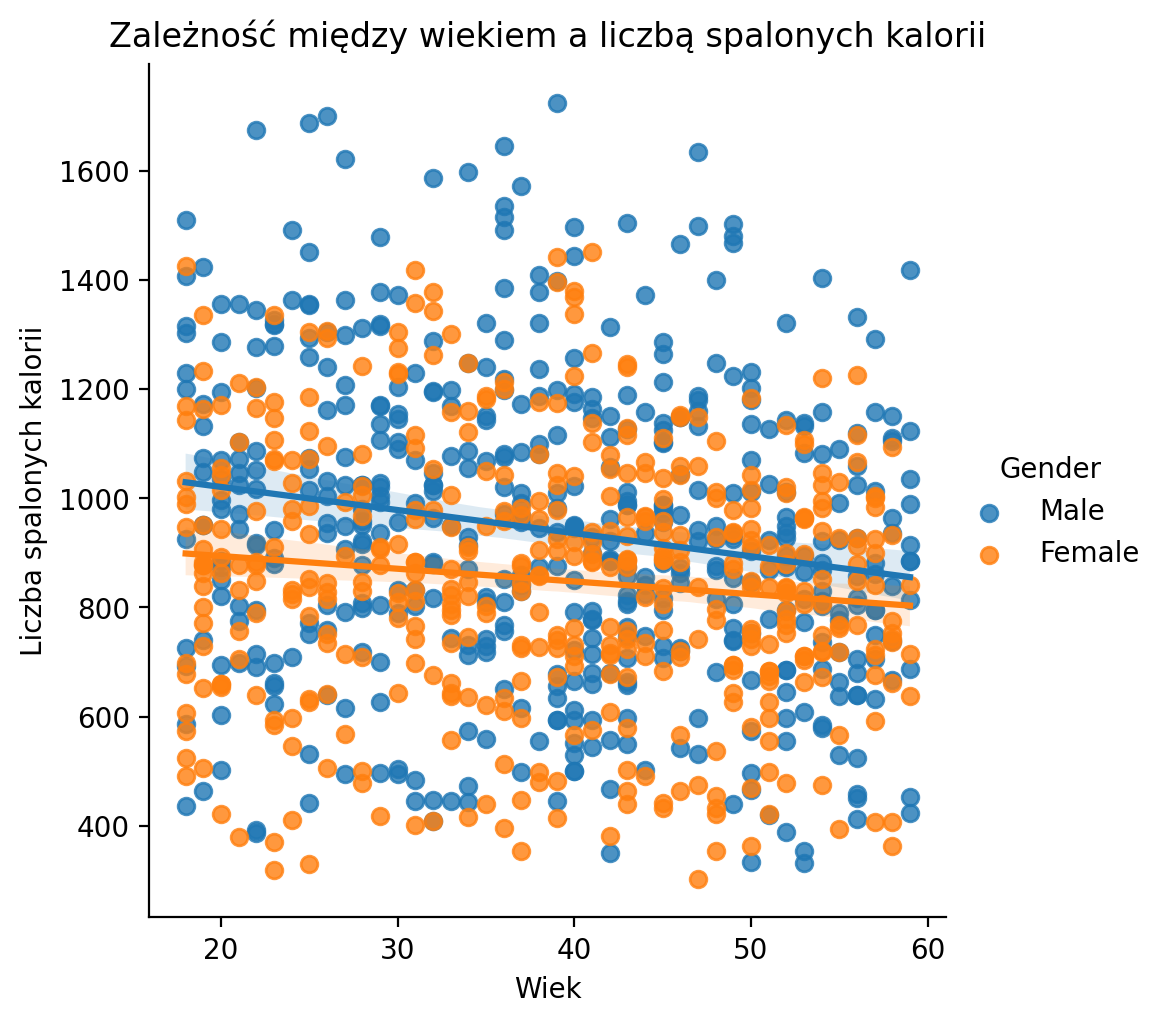

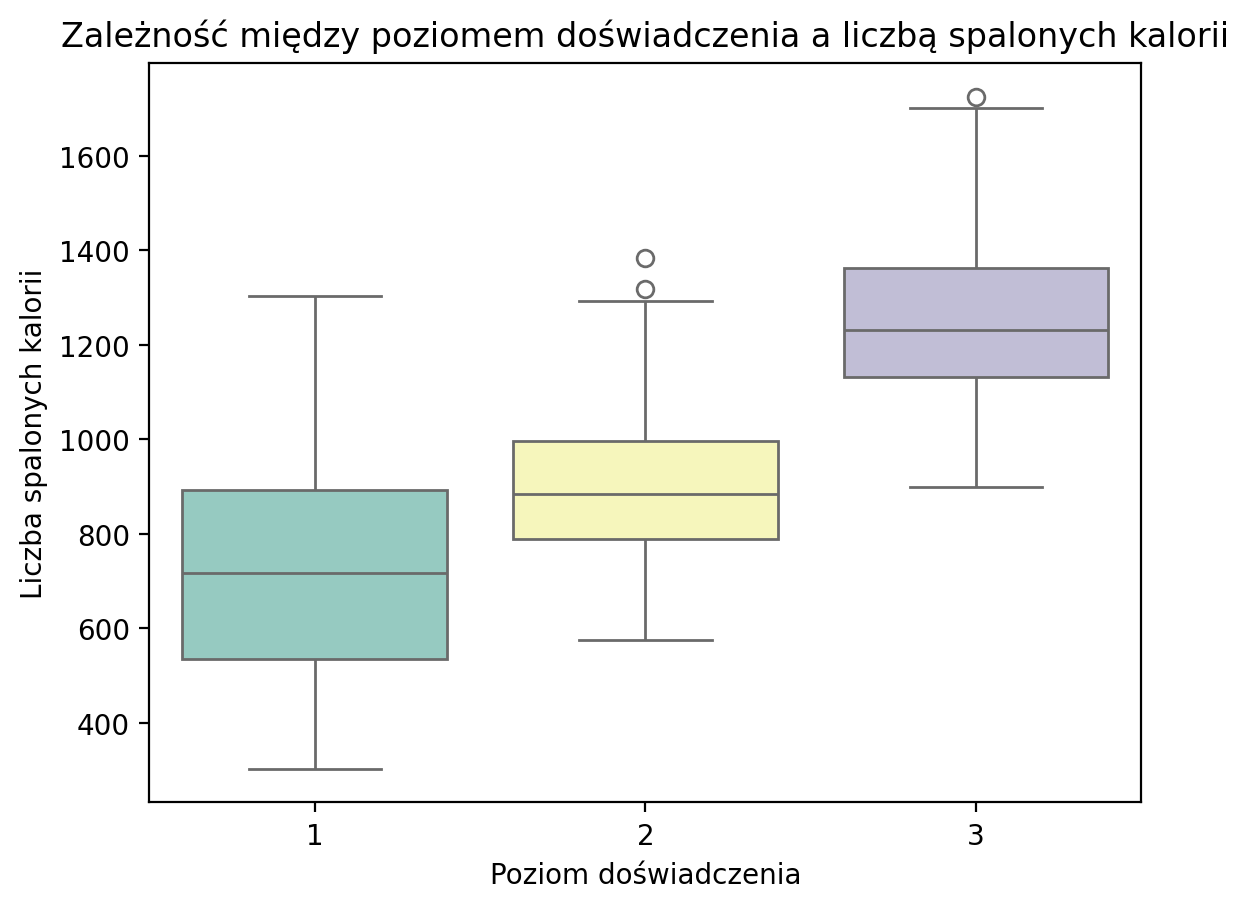

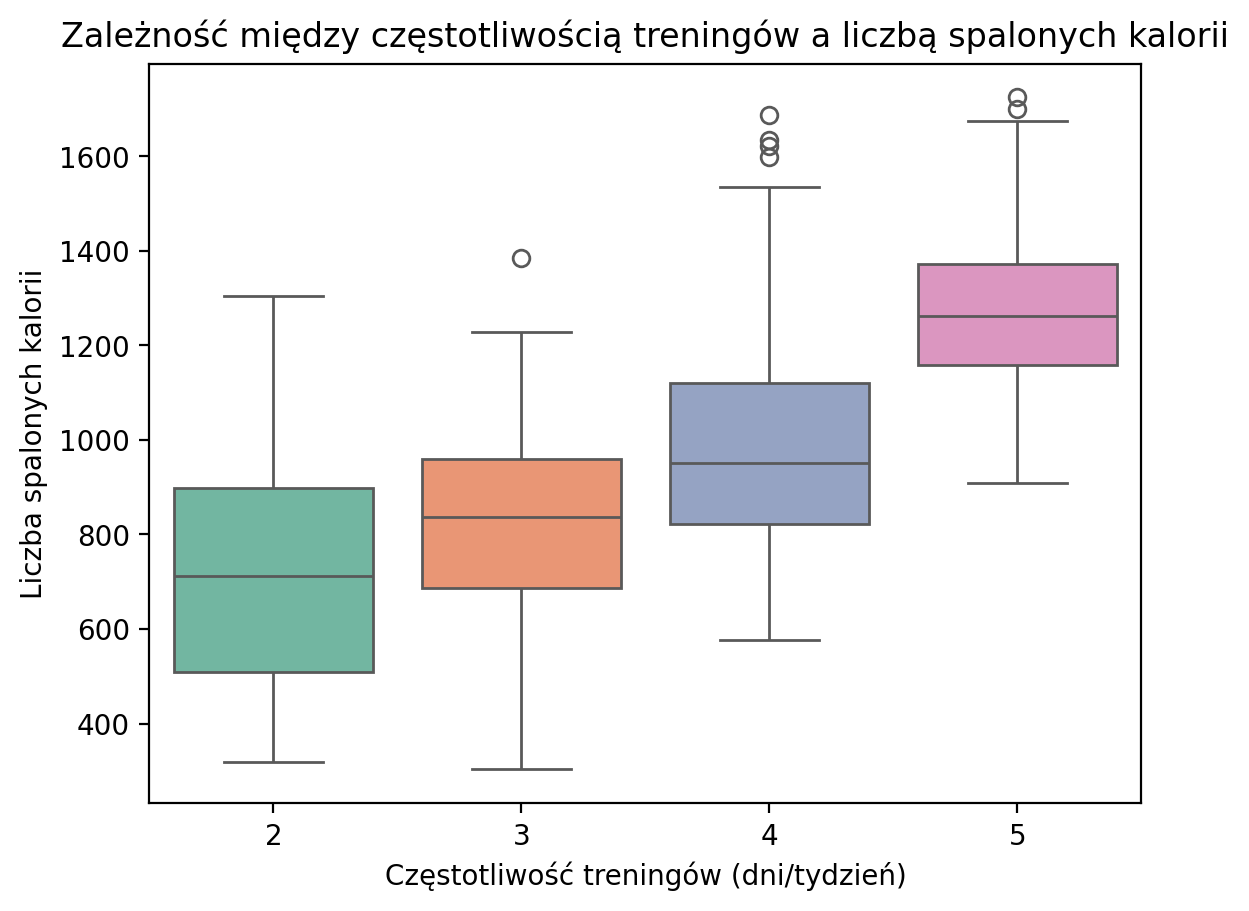

In [293]:
# jak te cechy wpływaja na liczbę spalonych kalorii?
# Wiek vs. Calories_Burned
sns.lmplot(data=df, x='Age', y='Calories_Burned', hue='Gender')
plt.title('Zależność między wiekiem a liczbą spalonych kalorii')
plt.xlabel('Wiek')
plt.ylabel('Liczba spalonych kalorii')
plt.show()

# Poziom doświadczenia vs. Calories_Burned
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', hue='Experience_Level', palette='Set3', legend=False)
plt.title('Zależność między poziomem doświadczenia a liczbą spalonych kalorii')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Liczba spalonych kalorii')
plt.show()

# Częstotliwość treningów vs. Calories_Burned
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Calories_Burned', hue='Workout_Frequency (days/week)', palette='Set2', legend=False)
plt.title('Zależność między częstotliwością treningów a liczbą spalonych kalorii')
plt.xlabel('Częstotliwość treningów (dni/tydzień)')
plt.ylabel('Liczba spalonych kalorii')
plt.show()

Interpretacja: Wraz z wiekiem można zauważyć spadek intensywności spalania kalorii. U kobiet wydaje się być delikatniejszy, u mężczyzn różnica jest większa, ale nadal nie drastyczna.

### 6.3 Zależność między BMI a średnim tętnem

Text(43.190944444444426, 0.5, 'Średnie tętno (BPM)')

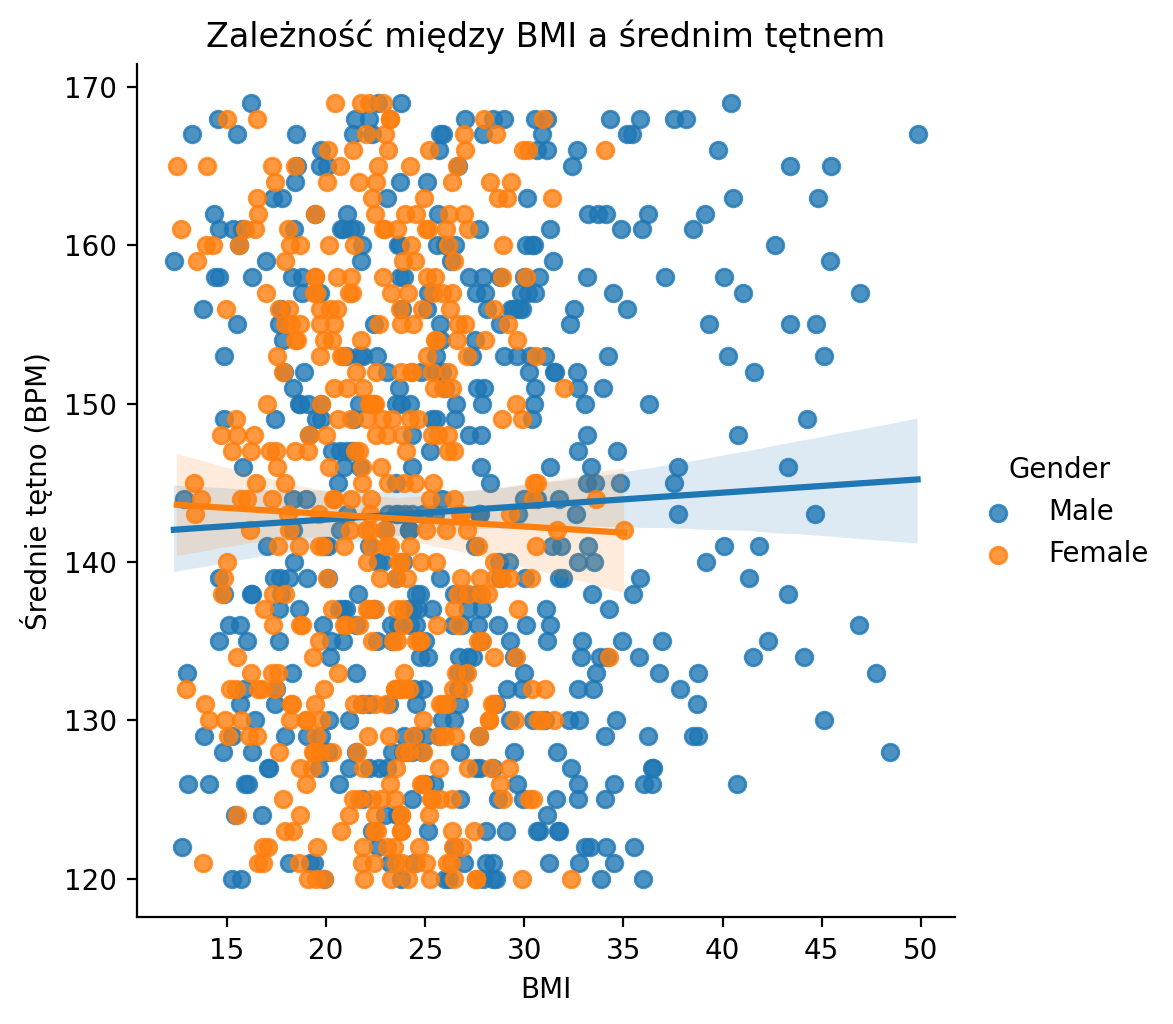

In [294]:
# Czy BMI wpływa na średnie tętno?

sns.lmplot(data=clean_data, x='BMI', y='Avg_BPM', hue='Gender')
plt.title('Zależność między BMI a średnim tętnem')
plt.xlabel('BMI')
plt.ylabel('Średnie tętno (BPM)')

Interpretacja: Widać, że u męzczyzn, wraz ze wzrostem BMI średnie tętno rośnie, co może sugerować większe obciążenie organizmu. U kobiet sytuacja jest odwrotna. Moze im mają większe BMI, tym mniej intensywne treningi wykonują.

### 6.4 Efektywność treningu

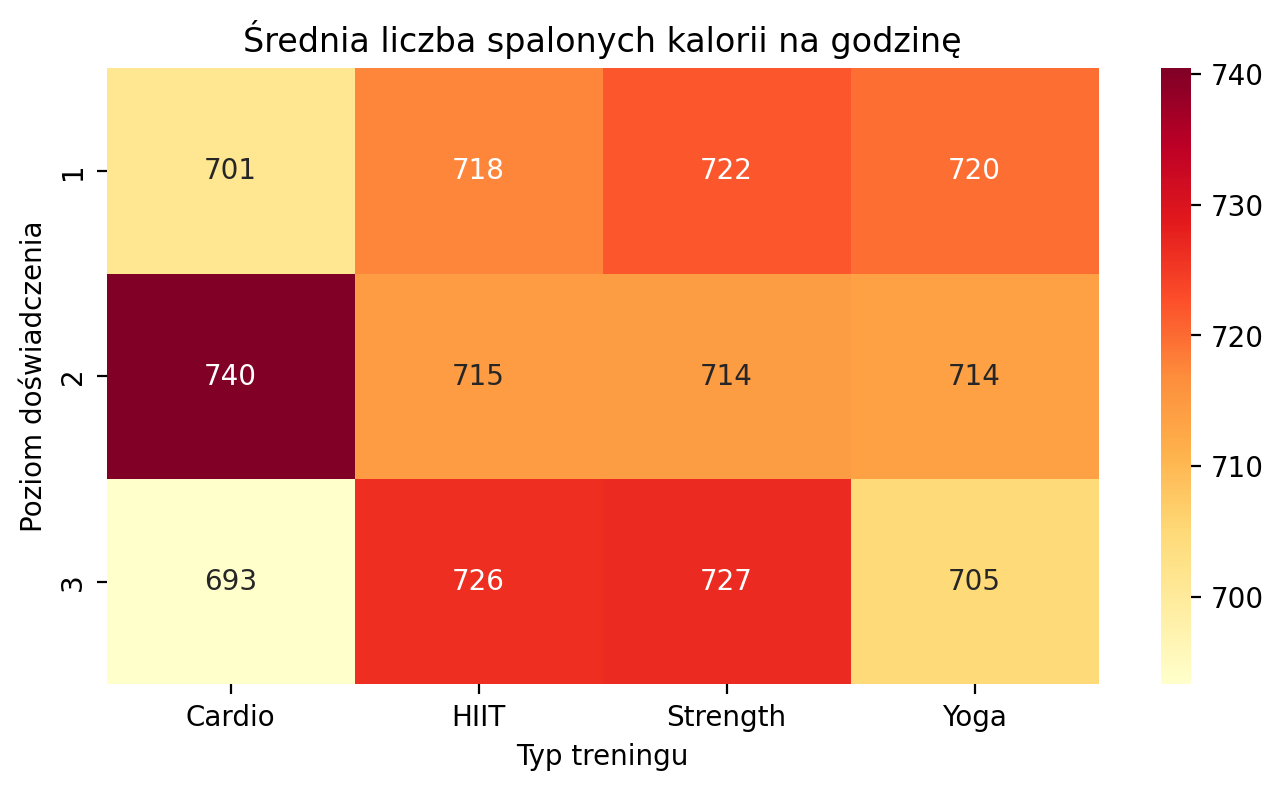

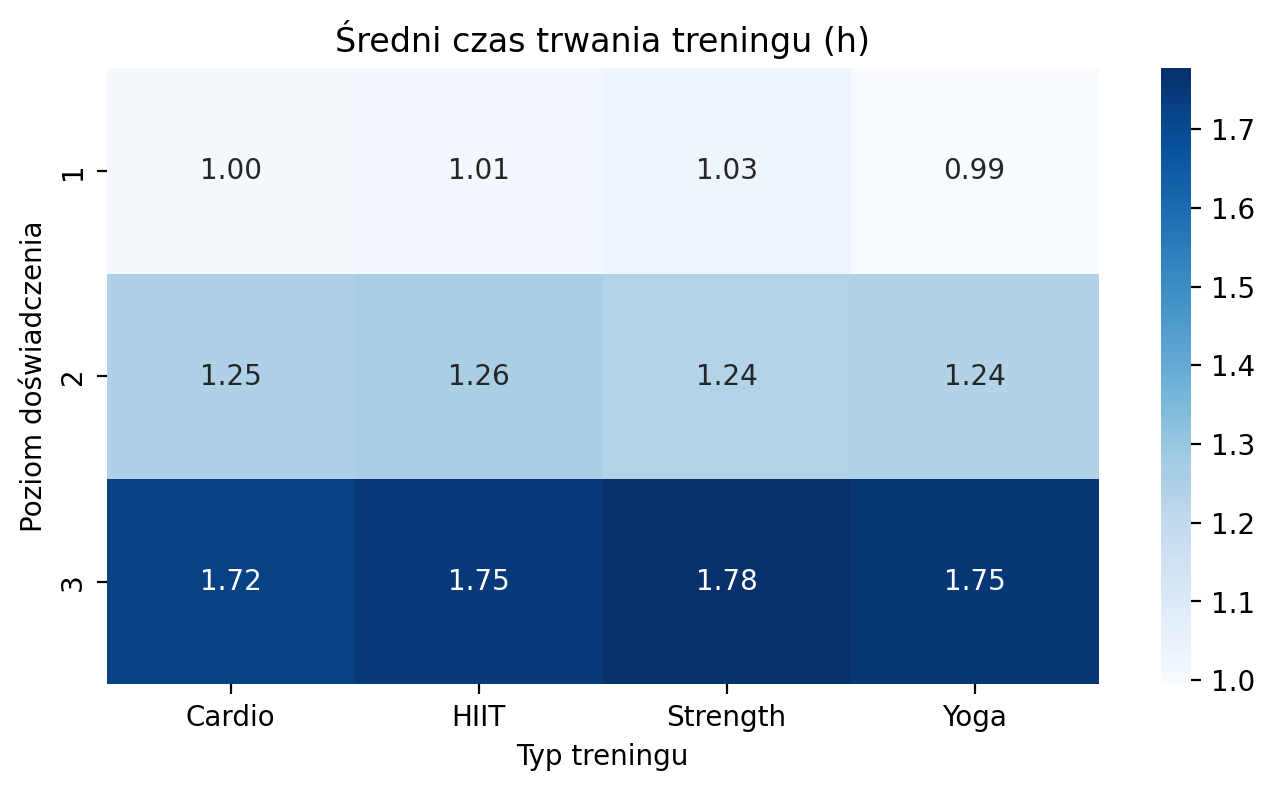

In [296]:
# # Spalane kalorie na godzine
df['Calories_per_hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']

# Grupowanie - srednia liczba spalonych kalorii na godzinę dla każdego typu treningu i poziomu doświadczenia
grouped = (
    df
    .groupby(['Experience_Level', 'Workout_Type'])['Calories_per_hour']
    .mean()
    .reset_index()
)

# # Pivot table: Srednia liczba spalonych kalorii na godzinę
# pivot_cal = grouped.pivot(index='Experience_Level', columns='Workout_Type', values='Calories_per_hour')
# print("Średnia liczba spalonych kalorii na godzinę dla każdego typu treningu i poziomu doświadczenia:")
# print(pivot_cal.round(1))

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_cal, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Średnia liczba spalonych kalorii na godzinę")
plt.ylabel("Poziom doświadczenia")
plt.xlabel("Typ treningu")
plt.show()

#grupowanie -sredni czas trwania treningu dla każdego typu treningu i poziomu doświadczenia
duration_grouped = (
    df
    .groupby(['Experience_Level', 'Workout_Type'])['Session_Duration (hours)']
    .mean()
    .reset_index()
)
# Pivot table: Sredni czas trwania treningu
# pivot_dur = duration_grouped.pivot(index='Experience_Level', columns='Workout_Type', values='Session_Duration (hours)')
# print("\nŚredni czas trwania treningu (h) dla każdego typu treningu i poziomu doświadczenia:")
# print(pivot_dur.round(2))

# Heatmap 
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_dur, annot=True, fmt=".2f", cmap="Blues")
plt.title("Średni czas trwania treningu (h)")
plt.ylabel("Poziom doświadczenia")
plt.xlabel("Typ treningu")
plt.show()


Interpretacja: Bardziej zaawansowani użytkownicy spalają więcej kalorii podczas treningu. Zauwazyć trzeba, że wieksza liczba spalonych kalorii w tej grupie wynika z dlugości treningu a nie z efektywnosci treningu (ilości spalanych kalorii na godzine). Najefektywnie spalają kalorie osoby ze średnim doświadczeniem podczas trenignu cardio. Wraz ze wzrostem doswiadczenia długość treningu wzrasta.


### 6.5 Częstotliwość treningów a spożycie wody podczas treningu

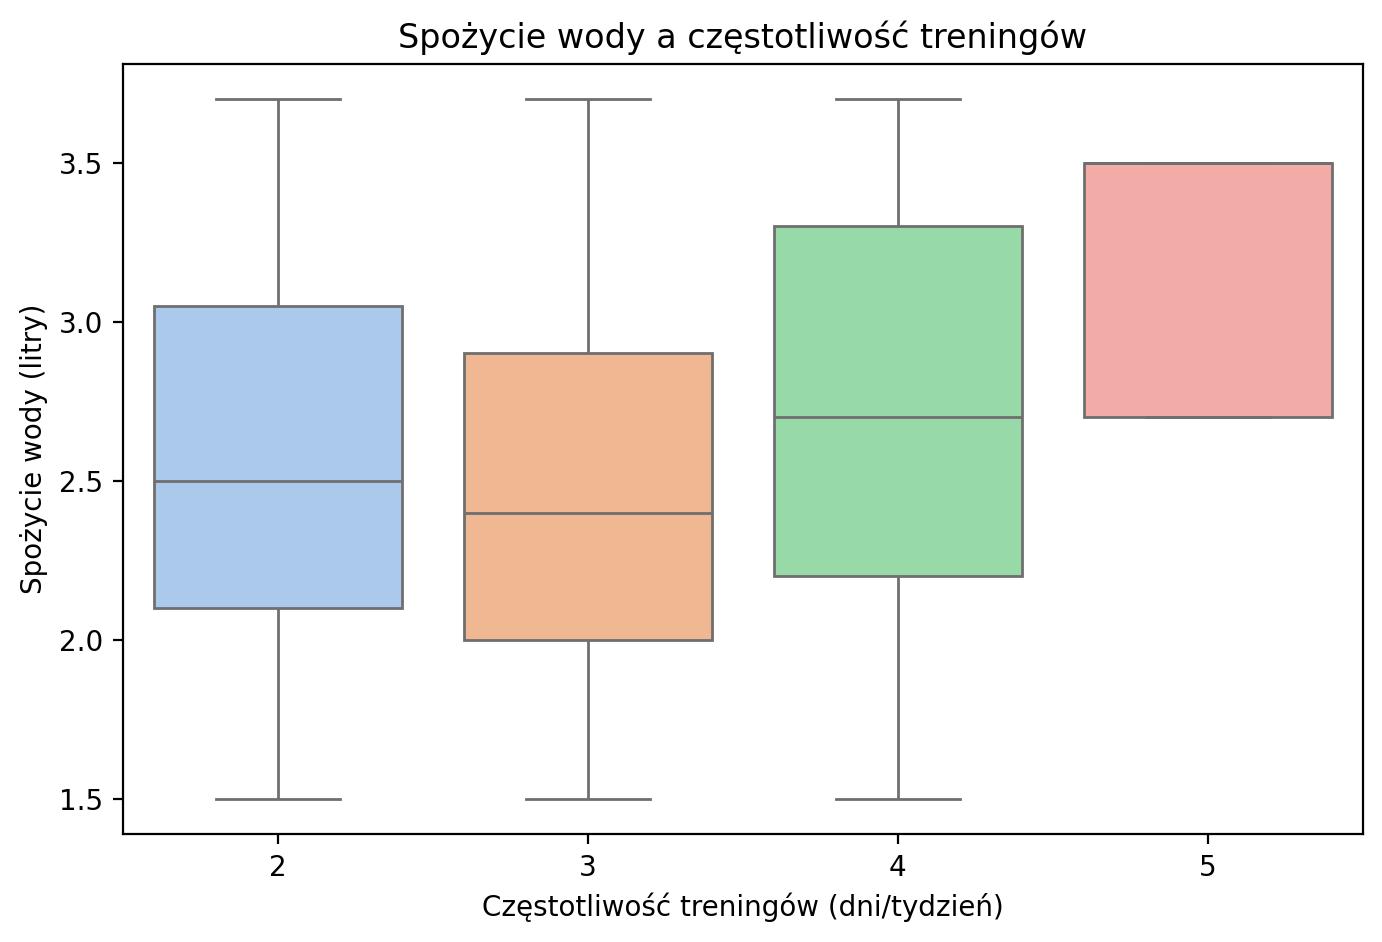

In [297]:
# Zależność między częstotliwością treningów a spożyciem wody podczas treningów

plt.figure(figsize=(8, 5))
sns.boxplot(data=clean_data, x='Workout_Frequency (days/week)', y='Water_Intake (liters)', hue ='Workout_Frequency (days/week)',  palette='pastel', legend=False)
plt.title('Spożycie wody a częstotliwość treningów')
plt.xlabel('Częstotliwość treningów (dni/tydzień)')
plt.ylabel('Spożycie wody (litry)')
plt.show()

Interpretacja: Dla osob trenujacych 4 i 5 dni w tygodniu zauwazalne jest wieksze srednie spozycie wody podczas treningu. 


### 6.6 Czy bardziej doświadczeni użytkownicy mają niższe tętno spoczynkowe?

Standardowe odchylenie dla wszystkich wartości Resting_BPM 7.366140450382088
----------------------------------------------------------
                  median Resting_BPM
Experience_Level                    
1                               63.0
2                               62.0
3                               62.0


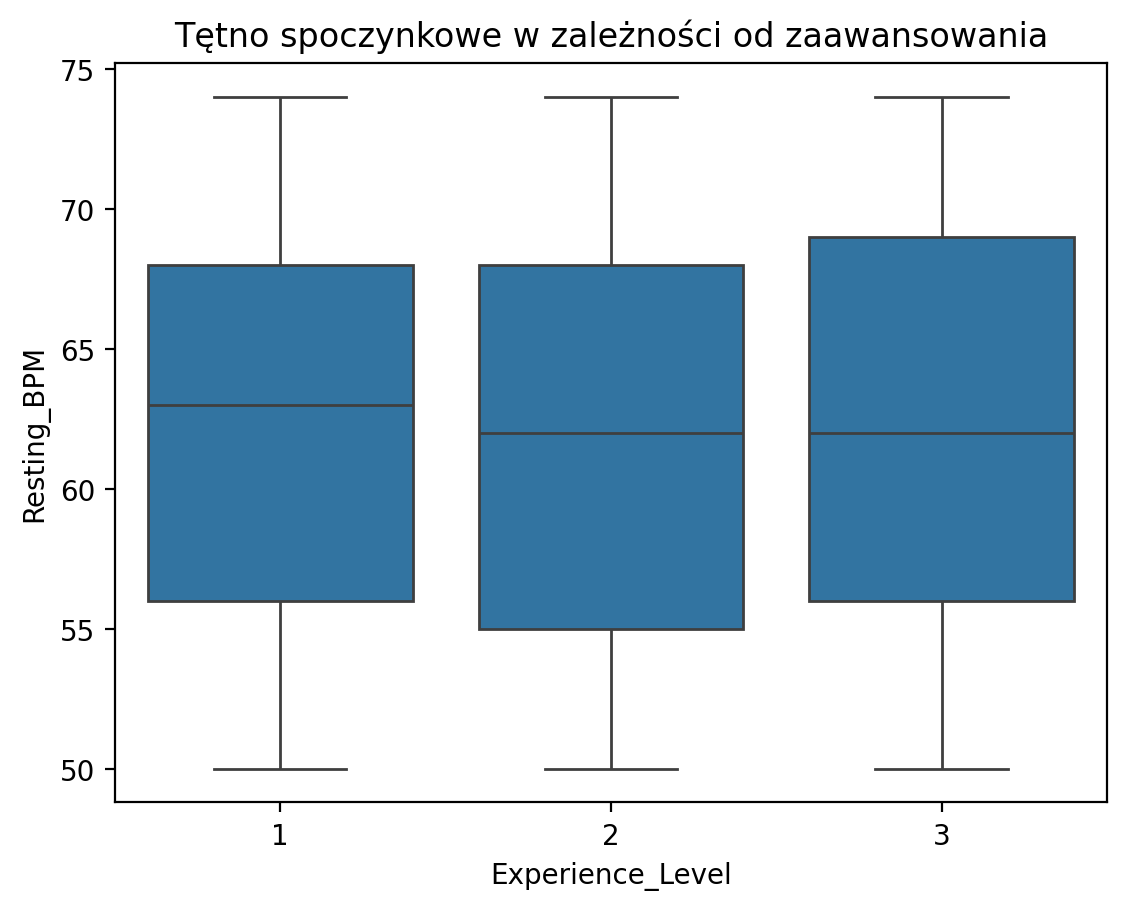

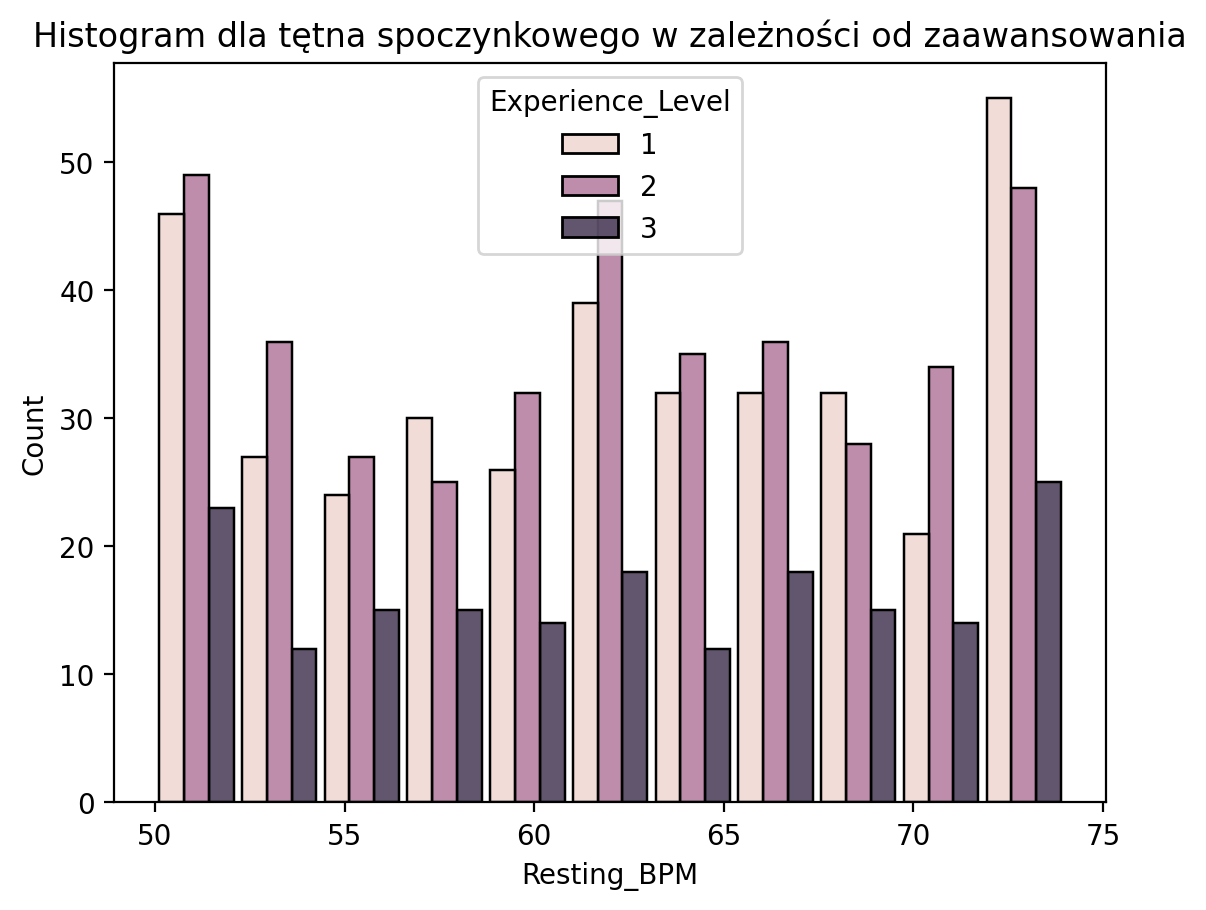

----------------------------------------------------------
                         median Resting_BPM
Experience_Level Gender                    
1                Female                62.0
                 Male                  63.0
2                Female                63.0
                 Male                  62.0
3                Female                61.0
                 Male                  65.0


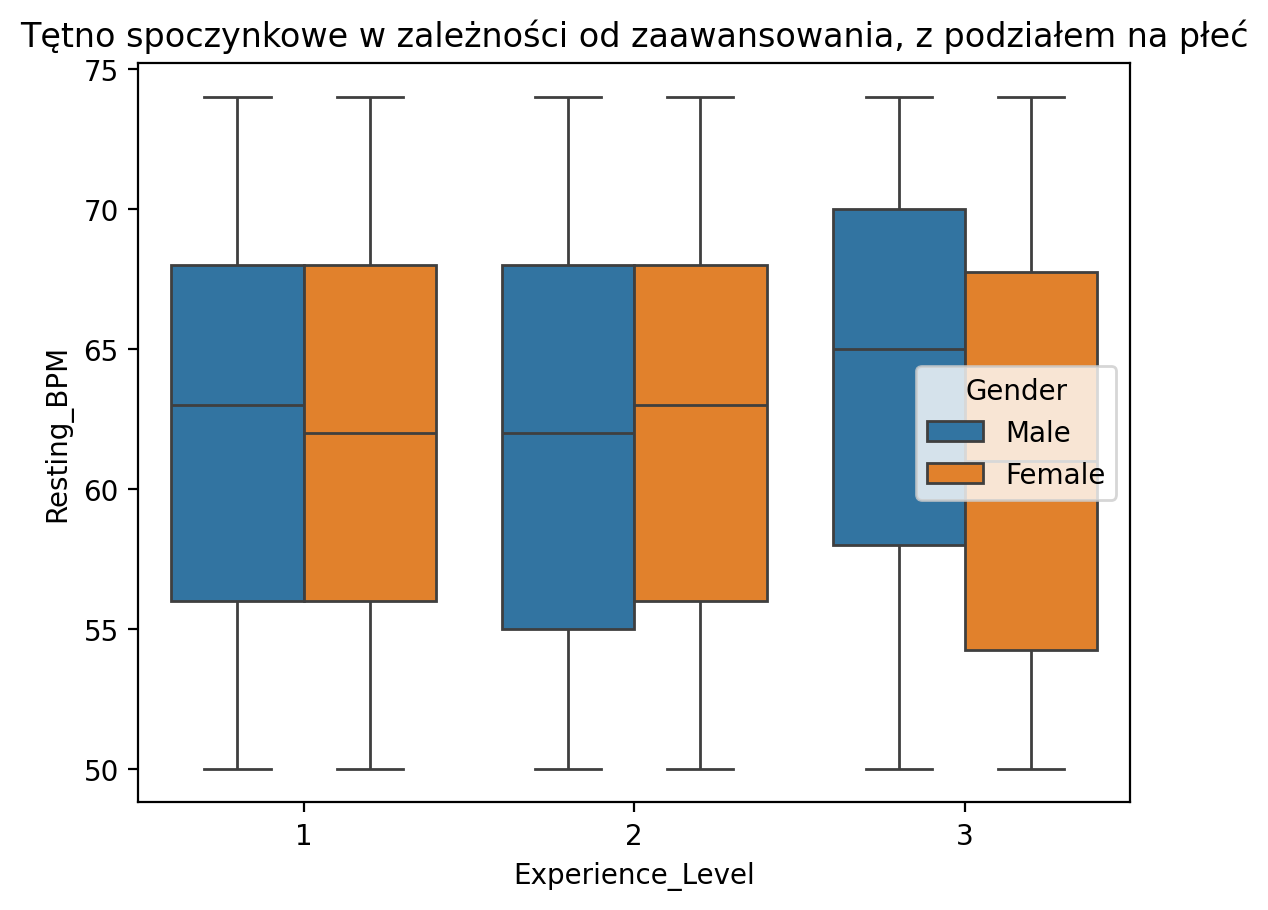

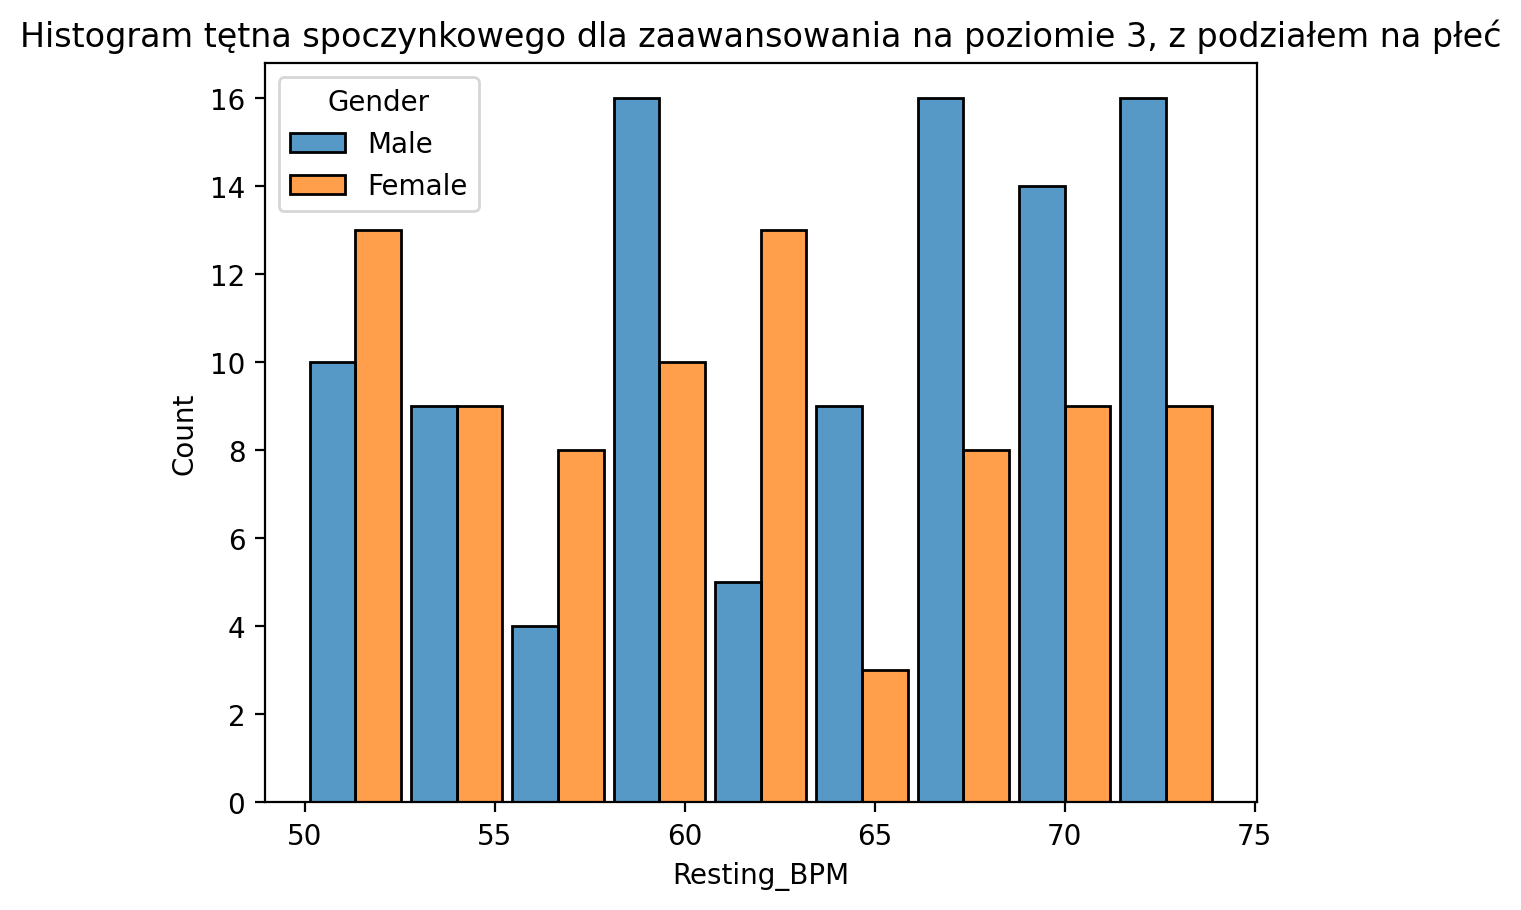

----------------------------------------------------------
                               median Resting_BPM
Experience_Level Workout_Type                    
1                Cardio                      63.0
                 HIIT                        63.0
                 Strength                    63.0
                 Yoga                        63.0
2                Cardio                      60.0
                 HIIT                        64.0
                 Strength                    64.0
                 Yoga                        62.0
3                Cardio                      62.5
                 HIIT                        63.0
                 Strength                    62.0
                 Yoga                        61.5


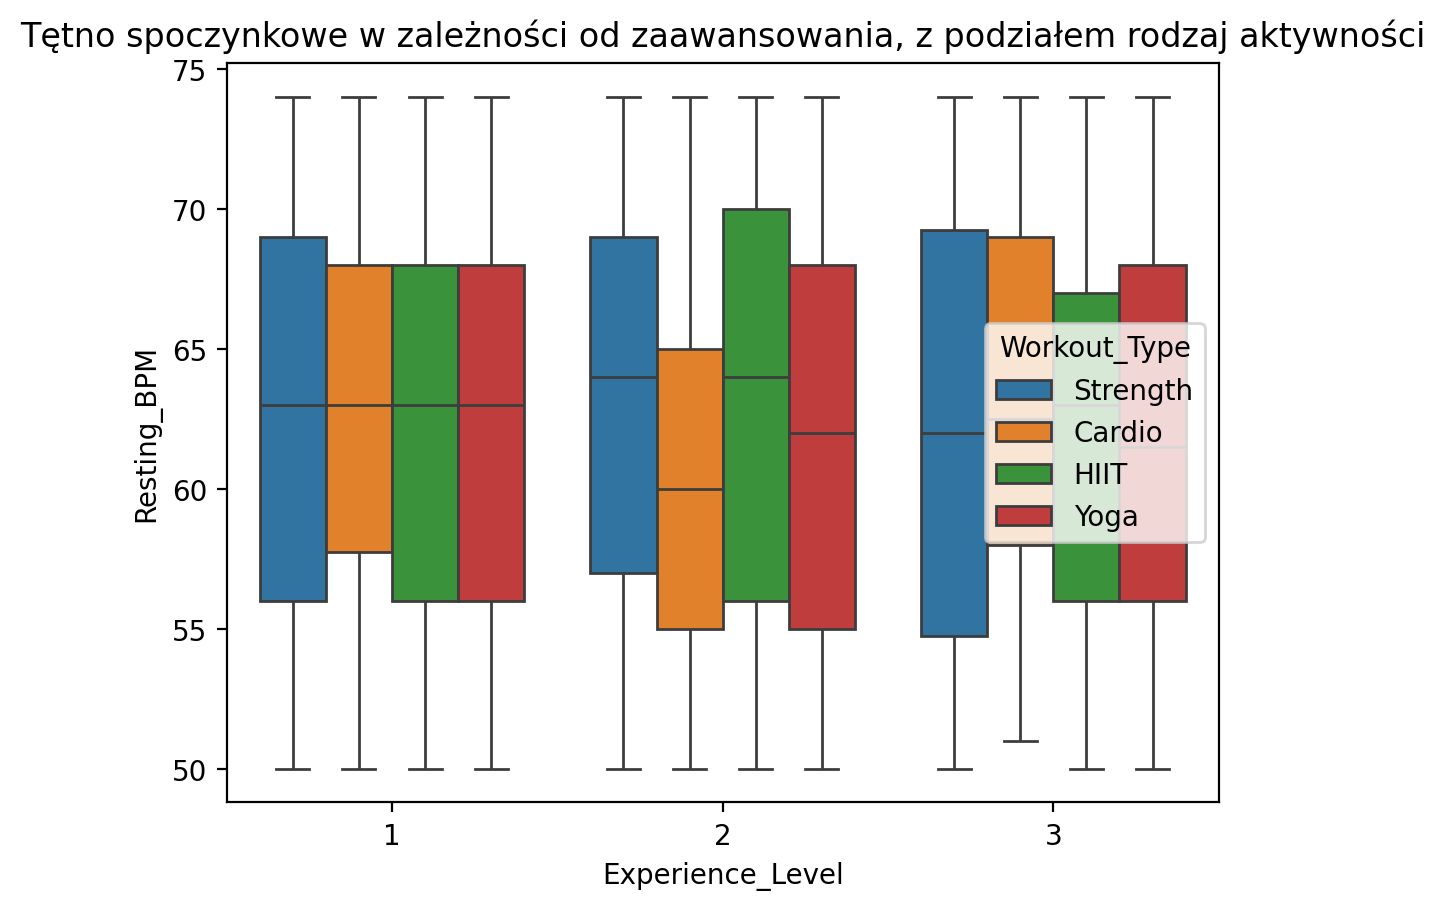

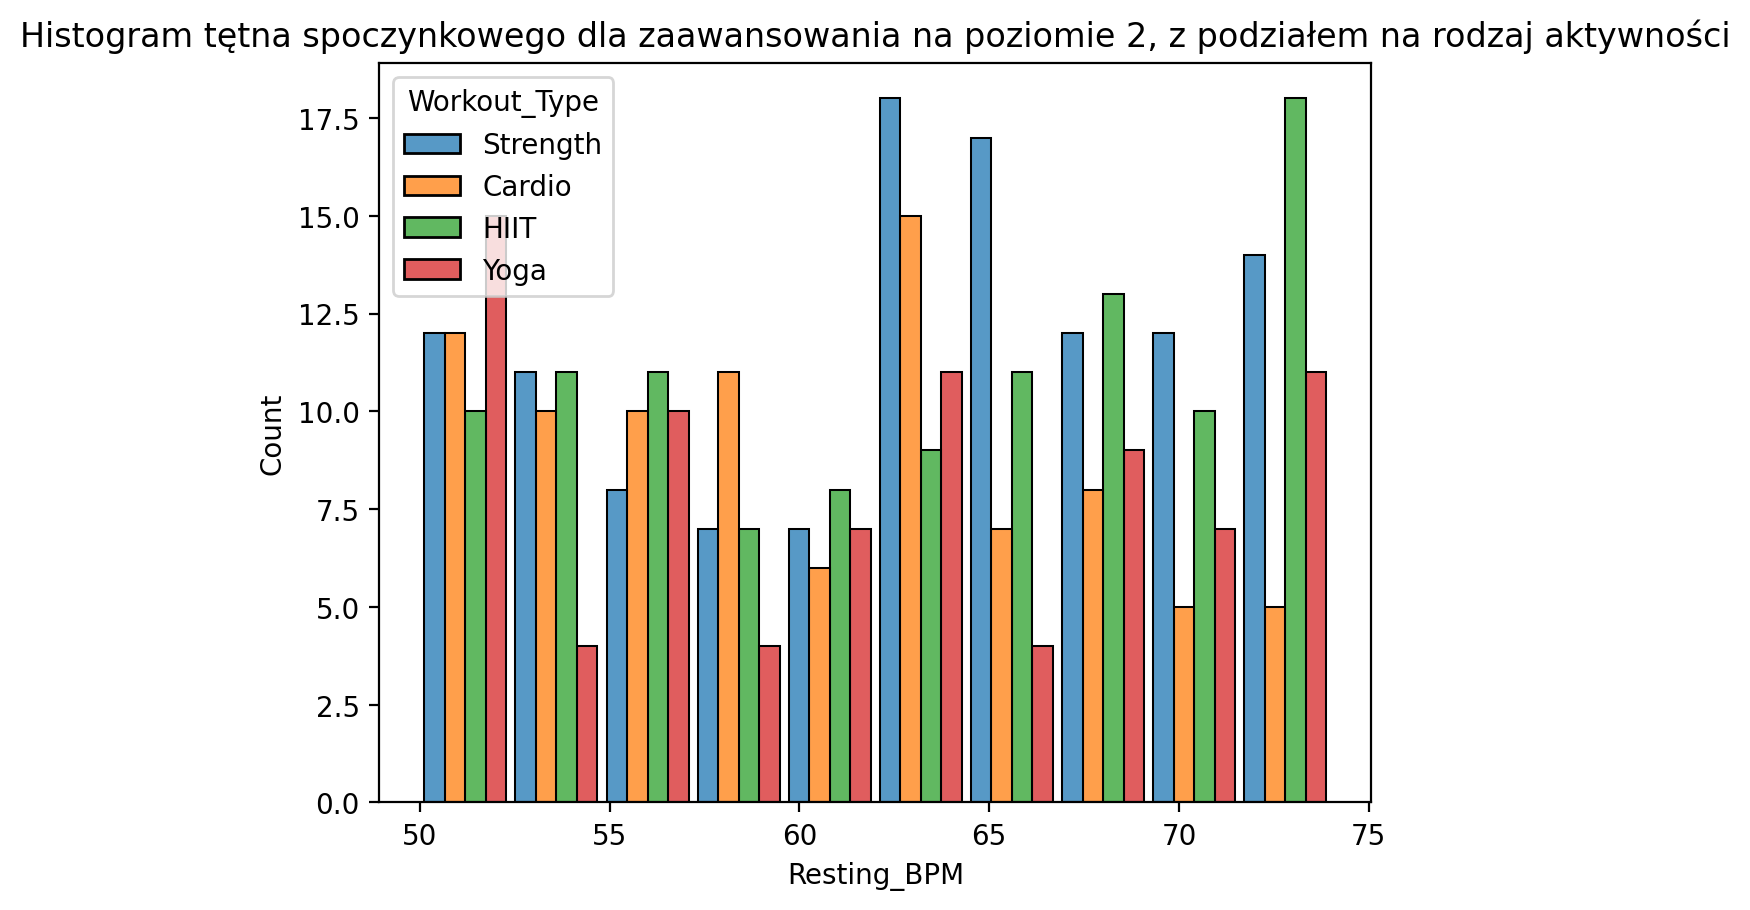

In [298]:
print('Standardowe odchylenie dla wszystkich wartości Resting_BPM', clean_data['Resting_BPM'].std())
print('----------------------------------------------------------')
print(clean_data.groupby('Experience_Level')[['Resting_BPM']].median().rename(columns={'Resting_BPM':'median Resting_BPM'}) )
sns.boxplot(data=clean_data, x='Experience_Level', y='Resting_BPM').set(title='Tętno spoczynkowe w zależności od zaawansowania')
plt.show()
#sns.histplot(data=clean_data, x='Resting_BPM', hue='Experience_Level', multiple='dodge', shrink=0.9)
sns.histplot(data=clean_data, x='Resting_BPM', hue='Experience_Level', multiple='dodge', shrink=0.9).set(title='Histogram dla tętna spoczynkowego w zależności od zaawansowania')
plt.show()
print('----------------------------------------------------------')
print(clean_data.groupby(['Experience_Level', 'Gender'])[['Resting_BPM']].median().rename(columns={'Resting_BPM':'median Resting_BPM'}) )
sns.boxplot(data=clean_data, x='Experience_Level', y='Resting_BPM', hue='Gender').set(title='Tętno spoczynkowe w zależności od zaawansowania, z podziałem na płeć')
plt.show()
sns.histplot(data=clean_data[clean_data['Experience_Level']==3], x='Resting_BPM', hue='Gender', multiple='dodge', shrink=0.9).set(title='Histogram tętna spoczynkowego dla zaawansowania na poziomie 3, z podziałem na płeć')
plt.show()
print('----------------------------------------------------------')
print(clean_data.groupby(['Experience_Level', 'Workout_Type'])[['Resting_BPM']].median().rename(columns={'Resting_BPM':'median Resting_BPM'}) )
sns.boxplot(data=clean_data, x='Experience_Level', y='Resting_BPM', hue='Workout_Type').set(title='Tętno spoczynkowe w zależności od zaawansowania, z podziałem rodzaj aktywności')
plt.show()
sns.histplot(data=clean_data[clean_data['Experience_Level']==2], x='Resting_BPM', hue='Workout_Type', multiple='dodge', shrink=0.9).set(title='Histogram tętna spoczynkowego dla zaawansowania na poziomie 2, z podziałem na rodzaj aktywności')
plt.show()

Na wartość mediany tempa spoczynkowego niewielki wpływ ma stopień zaawansowania, jednak zmiany są pomijalnie małe.
Uwzględniając dodatkowo podział ze względu na płeć uwidacznia się niewielka różnica dla najbardziej zaawansowanych.
Podział ze względu na rodzaj aktywności uwidacznia niewiele większe różnice.
Odchylenie standardowe dla wszystkich danych wynosi 7.36, więc można powiedzieć, że wartości medianowe dla różnych stopni zaawansowania są bardzo do siebie zbliżone. Uważamm, że można powiedzieć, że są słabo rozróżnialne.
Zamieszczone histogramy obrazują rozkład daleki od normalnego. Kształt rozkładów nawiązuje do rozkładu jednostajnego, prawdopodobnie dane zostały uzyskane syntetycznie.

Z danych wynika, że bardziej zaawansowani uczestnicy nie mają niższego tętna spoczynkowego.


### 6.7 Co najbardziej wpływa na liczbę spalanych kalorii?



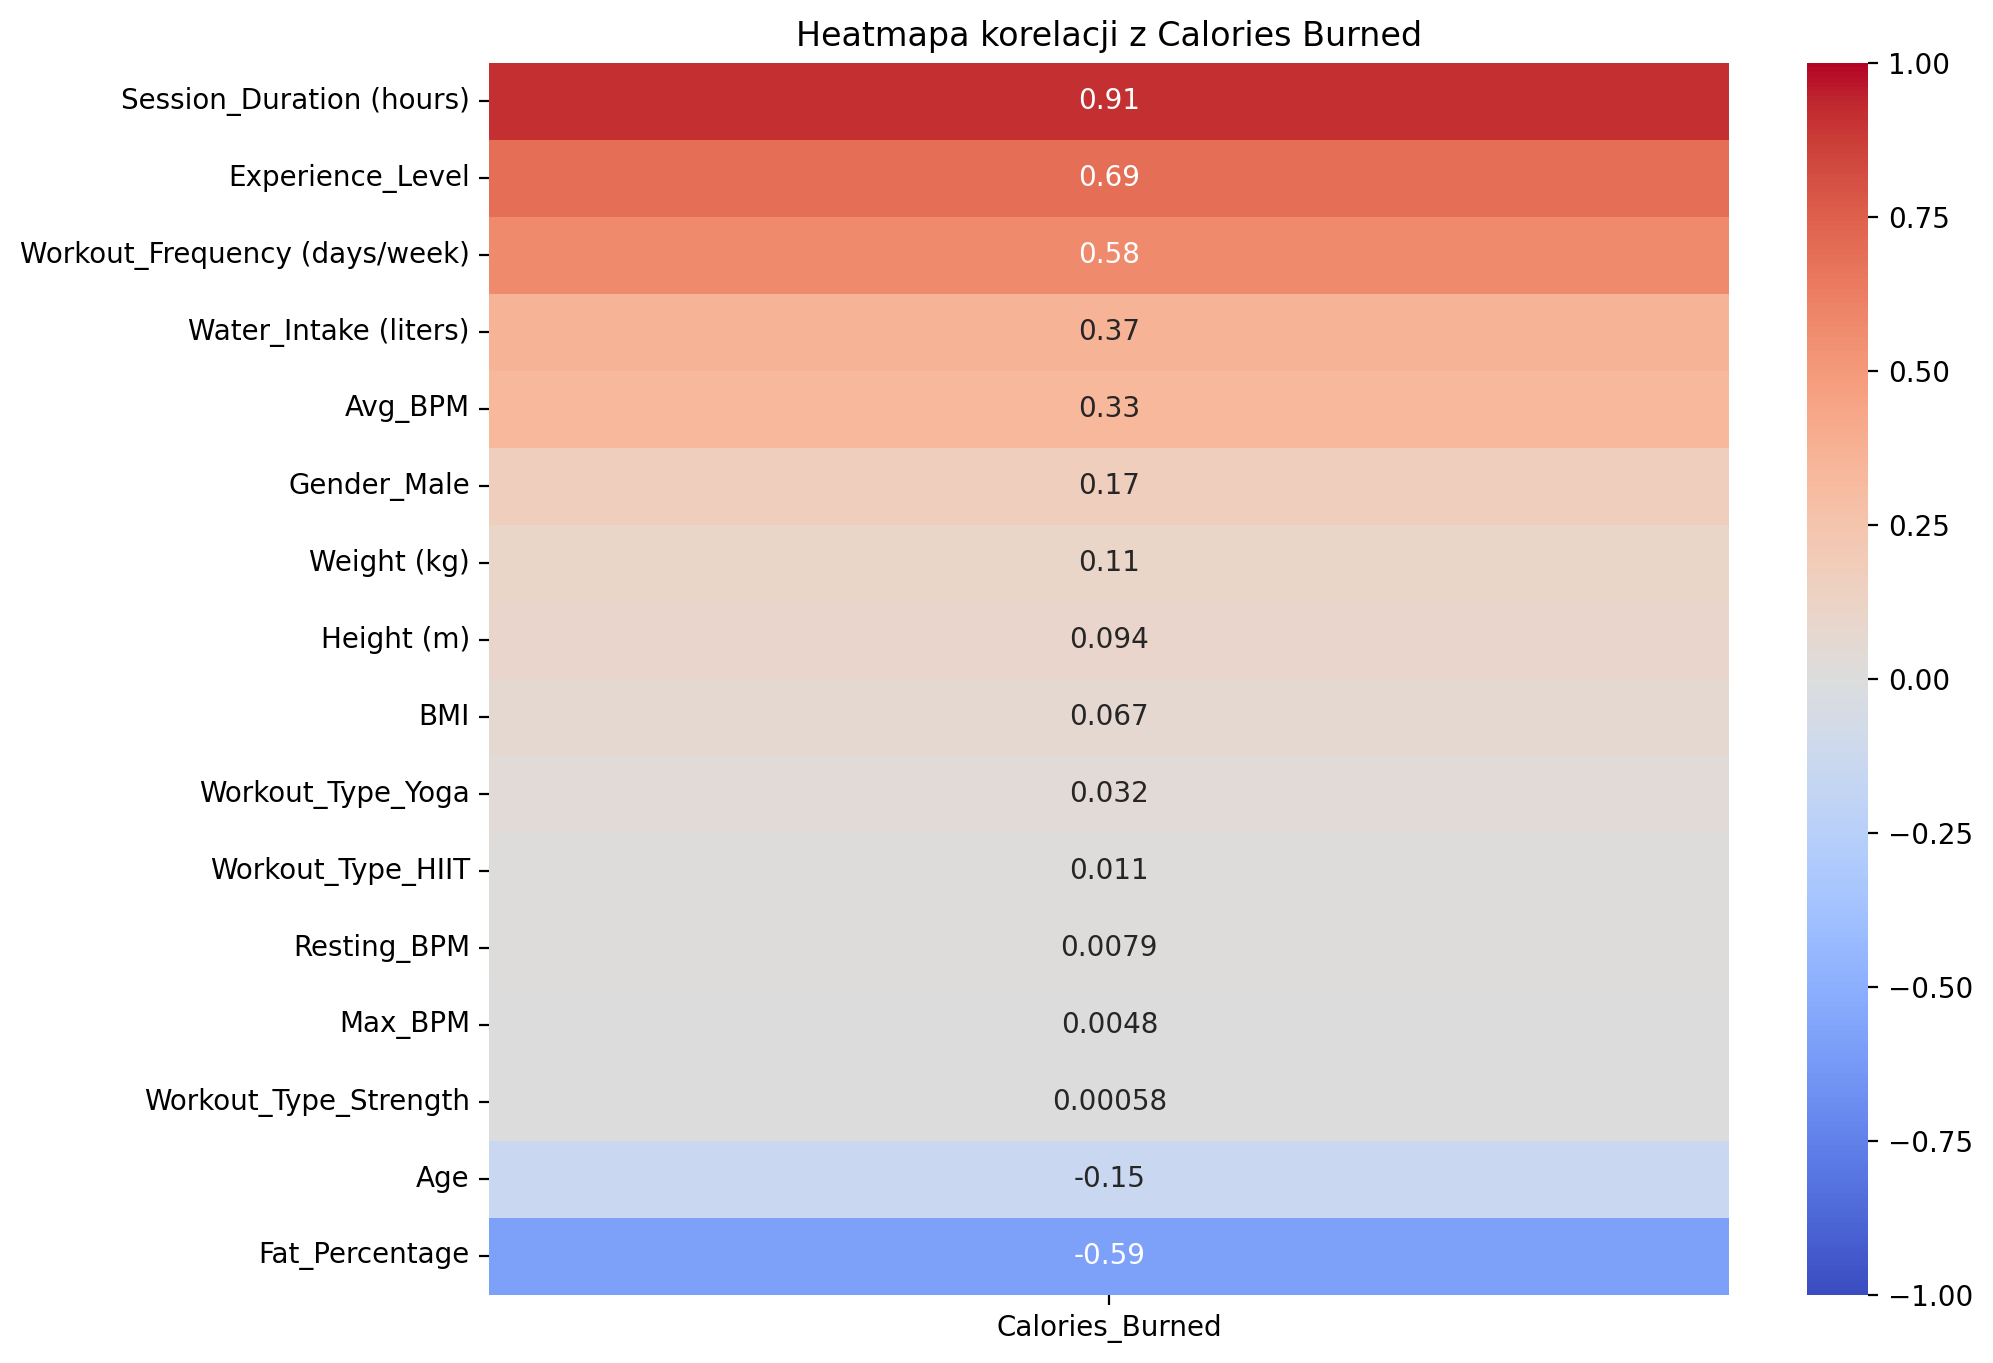

In [299]:
# Zwizualizację za pomoca heatmapy korelacji

# Korelacje wszystkich zmiennych liczbowych (przekształconych na dummy values)
clean_data_dummy = pd.get_dummies(clean_data, drop_first=True)
corr_matrix = clean_data_dummy.corr()
# Usuwamy Calories_Burned z indeksu (wierszy), aby uniknąć duplikacji
corr_no_target = corr_matrix.drop(index='Calories_Burned', errors='ignore')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_no_target[['Calories_Burned']].sort_values('Calories_Burned', ascending=False),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title('Heatmapa korelacji z Calories Burned')
plt.show()

Największy wpływ na ilość spalanych kalorii ma długość sesji treningowej.

### 6.8 Czy dłuższy trening oznacza większe spożycie wody? 

                          Water_Intake (liters)  Session_Duration (hours)
Water_Intake (liters)                  1.000000                  0.286843
Session_Duration (hours)               0.286843                  1.000000


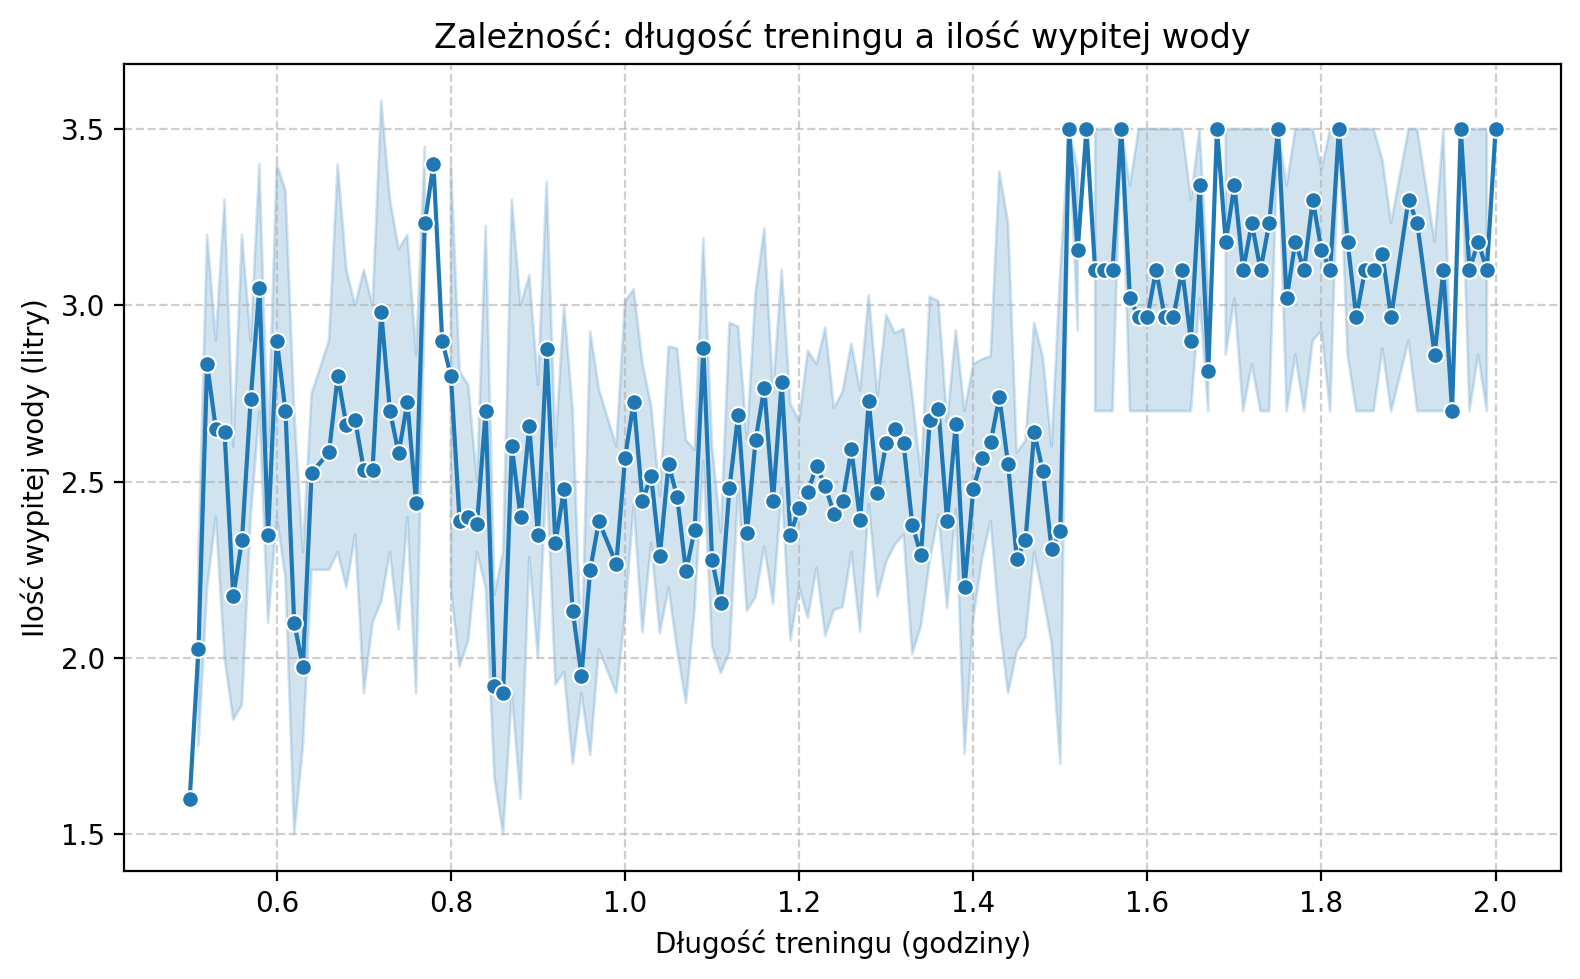

In [300]:
# sprawdzam korelację pomiędzy Water_Intake (liters) i Session_Duration (hours)
print( clean_data[['Water_Intake (liters)', 'Session_Duration (hours)']].corr())

# Wizualizacja korelacji pomiędzy Water_Intake (liters) i Session_Duration (hours)
# Wykres liniowy: długość treningu vs ilość wypitej wody
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=clean_data.sort_values('Session_Duration (hours)'),
    x='Session_Duration (hours)',
    y='Water_Intake (liters)',
    marker='o'
)
plt.title('Zależność: długość treningu a ilość wypitej wody')
plt.xlabel('Długość treningu (godziny)')
plt.ylabel('Ilość wypitej wody (litry)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Występuje dodatnia korelacja pomiędzy długością treningu i ilością wypitej wody.
Podczas dluższego treningu spożywane jest wiecej wody.

### 6.9 Jakie są typowe profile użytkowników siłowni – i czym się różnią?

Typowy profil użytkownika określam jako średnią z danych liczbowych. Dane kategoryczne przekształcone są na dane liczbowe, należy je rozumieć jako % wartości. 

In [301]:
# na początek podejście czysto liczbowe bez podziałów
print('Profil typowego użytkownika siłowni:')
print(clean_data_dummy.mean().round(2))

Profil typowego użytkownika siłowni:
Age                               38.61
Weight (kg)                       73.96
Height (m)                         1.72
Max_BPM                          180.30
Avg_BPM                          143.05
Resting_BPM                       62.21
Session_Duration (hours)           1.25
Calories_Burned                  898.95
Fat_Percentage                    25.03
Water_Intake (liters)              2.63
Workout_Frequency (days/week)      3.32
Experience_Level                   1.81
BMI                               24.92
Gender_Male                        0.53
Workout_Type_HIIT                  0.27
Workout_Type_Strength              0.29
Workout_Type_Yoga                  0.21
dtype: float64


Typowym profilem użytkownika, w sensie średniej, jest wiek: 38.68 lat, waga: 73.96 kg, wzrost: 1.72 m ..... w 47%-ach jest płci męskiej, w 53%-ach jest płci żeńskiej. Czasem mogą wyjść zabawne wyniki :) Człowiek i pies średnio mają 3 nogi.

In [302]:
# profil dla płci żeńskiej
print('Profil typowego użytkownika siłowni płci żeńskiej:')
print(clean_data_dummy[clean_data_dummy['Gender_Female']==1].mean().round(2))

Profil typowego użytkownika siłowni płci żeńskiej:


KeyError: 'Gender_Female'

Pozwolę sobie zauważyć, że wsród typowych użytkowników płci żeńskiej występuje 100% kobiecości i 0% męskości.

In [ ]:
# profile dla danych kategorycznych zapisane w DataFrame: profile_df
profile_df = pd.DataFrame(clean_data_dummy.mean().round(2), columns=['ogólny'] )
for col in clean_data_dummy.columns[12:] :
    profile_df[col] = clean_data_dummy[ clean_data_dummy[col]==1 ].mean().round(2)
print(profile_df)

                               ogólny  Gender_Female  Gender_Male  \
Age                             38.68          38.47        38.87   
Weight (kg)                     73.96          61.00        85.56   
Height (m)                       1.72           1.64         1.79   
Max_BPM                        180.30         180.20       180.40   
Avg_BPM                        143.05         142.81       143.27   
Resting_BPM                     62.21          62.06        62.35   
Session_Duration (hours)         1.25           1.25         1.25   
Calories_Burned                898.95         851.10       941.78   
Fat_Percentage                  25.03          27.82        22.54   
Water_Intake (liters)            2.63           2.20         3.01   
Workout_Frequency (days/week)    3.32           3.33         3.31   
BMI                             24.92          22.75        26.86   
Gender_Female                    0.47           1.00         0.00   
Gender_Male                      0

Typowe profile użytkowników zostały zapisane w postaci DataFrame. Profile zostały wygenerowane dla danych kategorycznych obecnych w bazie danych. Profil ogólny zawiera brak podziałów. Inne profile powstały ze względu na podział na płeć, rodzaj aktywności i stopień zaawansowania.

Profile można wykorzystać do lepszego dostosowania siłowni do potrzeb użytkowników. Oczywiście należy mieć na uwadze, że osoby odstające od typowego profilu także ćwiczą na siłowni :)

Interpretacja: Mężczyźni w tym zbiorze mają nieco wyższy poziom doświadczenia treningowego niż kobiety.

### 6.10 Czy osoby z wysokim Fat_Percentage mają niższą aktywność?

In [304]:
# Czy osoby z wysokim Fat_Percentage mają niższą aktywność?
df = clean_data.copy()

df['High_Fat'] = df['Fat_Percentage'] > df['Fat_Percentage'].median()
print(df.groupby('High_Fat')['Workout_Frequency (days/week)'].mean())

# Test t-Studenta dla dwóch niezależnych grup
from scipy.stats import ttest_ind

high_fat = df[df['High_Fat']]['Workout_Frequency (days/week)']
low_fat = df[~df['High_Fat']]['Workout_Frequency (days/week)']

t_stat, p_value = ttest_ind(high_fat, low_fat, equal_var=False)
print(f"\nt-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Różnica jest statystycznie istotna (p < 0.05).")
else:
    print("Brak istotnej statystycznie różnicy (p >= 0.05).")


High_Fat
False    3.628931
True     3.006452
Name: Workout_Frequency (days/week), dtype: float64

t-statistic: -11.153, p-value: 0.0000
Różnica jest statystycznie istotna (p < 0.05).


Interpretacja: Osoby z wyższym poziomem tłuszczu trenują rzadziej.

# 7. Wnioski (wnioskowanie statystyczne*)
*Odnoszące się do pytań badawczych testy statystyczne (w tabeli lub na wizualizacjach) odpowiednie do załozeń, danych.*

# 7. Wnioski
*Wyciągnięcie wniosków na temat zbioru danych i postawionych pytań.*